In [76]:
import sys
print (sys.version)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.basemap import Basemap
from itertools import chain
import math
from datetime import datetime
from geopy.distance import distance
%matplotlib inline

3.8.3 (default, Jul  2 2020, 17:30:36) [MSC v.1916 64 bit (AMD64)]


# Project WP1-2
### code 6: data cleaning for the hourly ais dataset
<span style='font-family:"Times New Roman"'> <span styel=''> 
    
This code is based on dataset "TORMVesselsHourly_20200924.csv" and "ports_update1.csv". 
    
The raw ais hourly dataset is not clean, with missing data and nan data. Information such as the start, end terminals/region of a journey and the journey distance are missing, which limites the furhter use of this dataset. 

this code is use to fixed all this problems, and obtain a clean dataset with comprehensive information for further applicaiton.
    
### Basic steps: 
    a) Load and check data;
    b) Compute voyage distances(credits from Gustav);
    c) Add journey id, start terminals, regions to dataset;
    d) Fix the unknowns terminals manually;
    e)  Save datasets

#  a) Load data 

In [77]:
df_aisH = pd.read_csv("C:/posDoc-SDU-Denmark/SDU_research/shippingLabwp1/dataOrig/TORMVesselsHourly_20200924.csv", delimiter = ";")
df_ports=pd.read_csv("C:/posDoc-SDU-Denmark/SDU_research/shippingLabwp1/cleanedData/ports_update1.csv")

C:\Users\jiec\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (7,11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [78]:
print ("the lenght of ais hourly dataset:",len(df_aisH))
print ("---------------------------------------------------------------------------------------------------------------------")
print ("the columns of ais hourly dataset:\n",df_aisH.columns.values)
print ("---------------------------------------------------------------------------------------------------------------------")
df_aisH.head()

the lenght of ais hourly dataset: 776740
---------------------------------------------------------------------------------------------------------------------
the columns of ais hourly dataset:
 ['LR_IMO_Ship_No' 'MMSI' 'Latitude' 'Longitude' 'Movement_Date_Time'
 'MoveStatus' 'Speed' 'Heading' 'Destination' 'DestinationTidied' 'ETA'
 'AdditionalInfo' 'Beam' 'CallSign' 'Draught' 'Length' 'ShipType'
 'ShipName' 'MovementID' 'FromFile' 'FileTimeStamp']
---------------------------------------------------------------------------------------------------------------------


LR_IMO_Ship_No       MMSI   Latitude  Longitude       Movement_Date_Time  \
0         9392482  219014000  35.505833 -13.874500  2018-12-31 22:38:25.000   
1         9392482  219014000  35.631500 -13.837333  2018-12-31 23:15:54.000   
2         9392482  219014000  35.972167 -13.742667  2019-01-01 00:58:26.000   
3         9392482  219014000  36.114833 -13.700167  2019-01-01 01:41:56.000   
4         9392482  219014000  36.225667 -13.665500  2019-01-01 02:15:45.000   

               MoveStatus  Speed Heading Destination DestinationTidied  ...  \
0  Under way using engine   12.3      13   AMSTERDAM         Amsterdam  ...   
1  Under way using engine   12.3      13   AMSTERDAM         Amsterdam  ...   
2  Under way using engine   12.3      15   AMSTERDAM         Amsterdam  ...   
3  Under way using engine   12.2      15   AMSTERDAM         Amsterdam  ...   
4  Under way using engine   12.0      16   AMSTERDAM         Amsterdam  ...   

  AdditionalInfo Beam  CallSign Draught  Length  ShipType     ShipName  \
0            NaN   32     OWEG2     8.5     183    Tanker  TORM LOUISE   
1            NaN   32     OWEG2     8.5     183    Tanker  TORM LOUISE   
2            NaN   32     OWEG2     8.5     183    Tanker  TORM LOUISE   
3            NaN   32     OWEG2     8.5     183    Tanker  TORM LOUISE   
4            NaN   32     OWEG2     8.5     183    Tanker  TORM LOUISE   

         MovementID                                           FromFile  \
0  4939248053437802  \\DKSRV103\BIImportFiles\IHS\201812312331_Comb...   
1  4939248053438402  \\DKSRV103\BIImportFiles\IHS\201901010031_Comb...   
2  4939248053439002  \\DKSRV103\BIImportFiles\IHS\201901010132_Comb...   
3  4939248053439602  \\DKSRV103\BIImportFiles\IHS\201901010231_Comb...   
4  4939248053440202  \\DKSRV103\BIImportFiles\IHS\201901010331_Comb...   

  FileTimeStamp  
0  201812312331  
1  201901010031  
2  201901010132  
3  201901010231  
4  201901010331  

[5 rows x 21 columns]

In [79]:
print ("---------------------------------------------------------------------------------------------------------------------")
print ("the length of df_ports:",len(df_ports))
print ("---------------------------------------------------------------------------------------------------------------------")

# new ports_dataframe for the sake of dataframe merging. 

# new ports_dataframe for the sake of dataframe merging. 
df_ports_start=df_ports[["Region","Terminal","Lat","Lon","num of call all","Port Group"]]
df_ports_end=df_ports[["Region","Terminal","Lat","Lon","num of call all","Port Group"]]

#change columns name
df_ports_start.columns=["start_region","start_terminal","start_lat","start_lon","start_calls","start_group"]
df_ports_end.columns=["end_region","end_terminal","end_lat","end_lon","end_calls","end_group"]


# # merge dataframes, adding new start/end information into the ais journey. 
# df_merge=pd.merge(df_longJ,df_ports_start,on='journey_start_location_name',how='left')
# df_merge=pd.merge(df_merge,df_ports_end,on="journey_end_location_name",how="left")

df_ports.head()

---------------------------------------------------------------------------------------------------------------------
the length of df_ports: 3288
---------------------------------------------------------------------------------------------------------------------


Region                   Country      Terminal       Lat        Lon  \
0    SE Asia                 Singapore     Singapore   1.20470  103.67232   
1     Baltic                    Russia  PTP Terminal  60.32058   28.72898   
2  Black sea                    Russia  Novorossiysk  44.72680   37.78154   
3    NE Asia               South Korea         Yeosu  34.71473  127.81125   
4       Gulf  United States of America       Houston  29.23550  -94.62350   

   num of call all    Port Group  
0            14768     Singapore  
1             7566  PTP Terminal  
2             7524  Novorossiysk  
3             7078         Yeosu  
4             6746       Houston

# b) Calculate voyage distance in hourly based dataset (credits from gustav)

In [80]:
# credits from gustav
# compute geodistance of each voyages based on AIS data.

def uniqueID(shipID, dataframe, positionDF_key):
    """
    calculate all the voyages distances for the ship with shipID
    shipID: num
    dataframe: df
    positionDF_key:str, the name of column containing all "shipID"
    return : an updated dataframe with journey distance.
    
    note that operation is conducted directly on input dataframe (in place).
    """
    print("Current ship id:",shipID)
    shipIDs = dataframe.loc[dataframe[positionDF_key] == shipID]
    #print(shipIDs["MovementID"].value_counts() )
    
    changedPort = False
    lat, lon, preLat, preLon, dist, preDist, prePortName= reset_values()
    
    indexList = []
#     journey_id=1
    
    for index, row in shipIDs.iterrows():
        
        portName = row["Destination"]
        portName = str(portName)
        changedPort = change_dest(portName, prePortName)
        prePortName = portName
        
        # when the destination changes, it means a distance of voyage has been found. 
        # then restart to compute another voyage.
        if changedPort == True:
            dataframe = insert_total_dist(dataframe, dist, indexList)
#             dataframe=insert_journey_id(dataframe,journey_id,indexList)
            lat, lon, preLat, preLon, dist, preDist, prePortName = reset_values()
            indexList.clear()
#             journey_id=journey_id+1
        
        # under the same destination
        lat = row["Latitude"]
        lon = row["Longitude"]
        indexList.append(index)
        
        if isinstance(preLon, float) == True and isinstance(preLat, float) == True:
            try:
                dist = calculate_dist(lat, lon, preLat, preLon, dist)
            except:
                lat = preLat
                lon = preLon
        
        # reserve current locations as pre locations for next loop
        preLat = lat
        preLon = lon
    
    return dataframe


def change_dest(destination, preDest):
    """
    Judge if the current timeseries destination is the same as the previous timeseries. 
    destination: string
    preDest:string
    return: True: not the same destination, Flase: the same destination
    """
    assert isinstance(destination, str) == True, "it is not string, the value {} is type {}".format(destination,type(destination))
    assert isinstance(preDest, str) == True, f"is not string, the value is {destination} of type {type(destination)}"
    
    if destination != preDest and preDest != "nan":
        print("====================================================================")
        print("new destination", destination, "previous destination", preDest)
        return True
    else: return False
    
def calculate_dist(lat, lon, destPortLat, destPortLong ,preDist):
    """
    compute the overall distance of a voyage: preDist+currentDist
    return: distance in nautical miles
    """
    assert isinstance(lat, float) == True, f"is not float / not a coordinate. value is {lat}"
    assert isinstance(lon, float) == True, f"is not float / not a coordinate. value is {lon}"
    #assert isinstance(preDist, float) == True, f"preDist is not a digit value, value is  {preDist}"
    distan = distance((lat, lon), (destPortLat, destPortLong)).miles * 0.868976242
    dist = distan + preDist

    return dist

def reset_values():
    lat = 0.00
    lon = 0.00
    
    preLat = "no coord"
    preLon = "no coord"
    
    dist = 0
    preDist = 0
    
    prePortName = "nan"
    
    return lat, lon, preLat, preLon, dist, preDist, prePortName

def insert_total_dist(dataframe, distance, indexList):
    """
    add an extra distance column in dataframe for the points of each voyages.
    """
    for intIndex in indexList:
        dataframe.at[intIndex, "Total Distance of Journey"] = distance
    return dataframe
    
    

def insert_start_terminal(df,terminal,indexList):
    for ix in indexList:
        df.at[ix,"start_terminal"]=terminal
    return df

def insert_end_terminal(df,terminal,indexList):
    for ix in indexList:
        df.at[ix,"end_terminal"]=terminal
    return df


def set_distance_interval(dataframe, dataframe_distance_key, minDistance = 0, maxDistance = 0):
    if minDistance == 0 and maxDistance != 0:
        return dataframe.loc[dataframe[dataframe_distance_key] <= maxDistance]
    elif minDistance != 0 and maxDistance == 0:
        return dataframe.loc[dataframe[dataframe_distance_key] >= minDistance]
    elif minDistance != 0 and maxDistance != 0:
        return dataframe.loc[( (dataframe[dataframe_distance_key] >= minDistance) & (dataframe[dataframe_distance_key] <= maxDistance))]
    else:
        return print("insert minimum or maximum distance")

In [81]:
def draw_map(m, scale=0.5):
    """
    plot backgroud map
    m: Basemap object
    scale: plot scale
    return: plot a backgroud map
    """
    # draw a shaded-relief image
    m.shadedrelief(scale=scale)
    #m.bluemarble(scale=scale)  #Project NASA's blue marble image onto the map
    #m.drawcoastlines()
    
    # lats and longs are returned as a dictionary
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))

    # keys contain the plt.Line2D instances
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    
    # cycle through these lines and set the desired style
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')

def plotPorts(df,directory="C:/posDoc-SDU-Denmark/SDU_research/shippingLabwp1/savedFile/",file_name="longVoyage_3000.png"):
    """
    Plot ports on geomap
    df: dataframe with location coordinates
    """
    #bbox=(df.ais_position_latitude.min(),df.ais_position_latitude.max(),df.ais_position_longitude.min(),df.ais_position_longitude.max())                                                        
    bbox=(-30,60,100,330)
    #print ("The respective minimum and maximum latitude and longitude coordiates of ports are:",bbox)

    
    fig,ax=plt.subplots(figsize=(22,14))
    m = Basemap(ax=ax,projection='cyl',resolution='l',
                llcrnrlat=bbox[0], urcrnrlat=bbox[1],
                llcrnrlon=bbox[2], urcrnrlon=bbox[3])

    # df.ais_position_longitude    
    ax.scatter(df.ais_lon_new,df.ais_position_latitude,c=df.journey_distance_nm,s=40) 
    draw_map(m)
    m.drawmeridians(np.arange(0,360,30),labels=[True,False,False,True],linewidth=0.5,fontsize=12)
    m.drawparallels(np.arange(-45,61,15),labels=[1,0,1,1], linewidth=0.5, fontsize=12)

    ax.set_xlim(bbox[2],bbox[3]);
    ax.set_ylim(bbox[0],bbox[1]);
    ax.set_xlabel("Longitude",fontsize=18)
    ax.set_ylabel("Latitude",fontsize=18)
    ax.xaxis.set_label_coords(0.55, -0.06)
    ax.yaxis.set_label_coords(-0.06,0.45)
    #ax.legend(loc='best',fontsize=10,frameon=False)
    #fig.savefig(directory+file_name,dpi=400)
    
def plotPorts_1(df,directory="C:/posDoc-SDU-Denmark/SDU_research/shippingLabwp1/savedFile/",file_name="longVoyage_3000.png"):
    """
    Plot ports on geomap
    df: dataframe with location coordinates
    """
    #bbox=(df.ais_position_latitude.min(),df.ais_position_latitude.max(),df.ais_position_longitude.min(),df.ais_position_longitude.max())                                                        
    bbox=(-90,90,-180,180)
    #print ("The respective minimum and maximum latitude and longitude coordiates of ports are:",bbox)

    
    fig,ax=plt.subplots(figsize=(22,14))
    m = Basemap(ax=ax,projection='cyl',resolution='l',
                llcrnrlat=bbox[0], urcrnrlat=bbox[1],
                llcrnrlon=bbox[2], urcrnrlon=bbox[3])

    # df.ais_position_longitude    
    ax.scatter(df.Longitude,df.Latitude,s=40) 
    draw_map(m)
    m.drawmeridians(np.arange(0,360,30),labels=[True,False,False,True],linewidth=0.5,fontsize=12)
    m.drawparallels(np.arange(-45,61,15),labels=[1,0,1,1], linewidth=0.5, fontsize=12)

    ax.set_xlim(bbox[2],bbox[3]);
    ax.set_ylim(bbox[0],bbox[1]);
    ax.set_xlabel("Longitude",fontsize=18)
    ax.set_ylabel("Latitude",fontsize=18)
    ax.xaxis.set_label_coords(0.55, -0.06)
    ax.yaxis.set_label_coords(-0.06,0.45)
    #ax.legend(loc='best',fontsize=10,frameon=False)
    #fig.savefig(directory+file_name,dpi=400)
    
def check_missData(df):
    """
    check the missing data of dataFrame.
    return: a dataFrame describing missing data percentage
    sum(): count the number of missing data in each column
    isnull(): return a dataFrame with True and False   
    """
    miss_tot=df.isnull().sum().sort_values(ascending=False)
    counts_all=df.isnull().count() # count all the elements, including the missed elements
    miss_per=((df.isnull().sum())*100/counts_all).sort_values(ascending=False)
    miss_all=pd.concat([miss_tot,miss_per],axis=1,keys=['TotalNum','TotalPerc(\%)'])
    return miss_all


def findmainPorts(df,regionName="Gulf"):
    """
    find all the ports within a region
    return: list with all ports in a region
    """
    ports_region=[]
    for i, row in df[df.Region==regionName].iterrows():
        port=row["Port Group"]
        ports_region.append(port)
    ports_region=list(set(ports_region))
    
    return ports_region
    

def trans_coods(df):
    """
    transform the coordinates of longituds from format (-180,180) to format (0,360)
    return: a new dataframe with an extra column "ais_lon_new"
    """
    df_copy=df.copy()
    for ix,row in df_copy.iterrows():

        lon=row["ais_position_longitude"]

        if lon<=0:
            df_copy.at[ix,"ais_lon_new"]=lon+360
        else:
            df_copy.at[ix,"ais_lon_new"]=lon
    return df_copy

        
def readFiles(mypath="C:/posDoc-SDU-Denmark/SDU_research/shippingLabwp1/savedFile/ais_routeRegions/"):
    """
    return a list contaning all the file names in given directory
    """
    # epair path to files by join(path,file)
    # isfile:check if it is a standard file
    files = [f for f in listdir(mypath) if isfile(join(mypath, f))]
    return files



def findmainPorts(df,regionName="Gulf"):
    """
    find all the ports within a region
    return: list with all ports in a region
    """
    ports_region=[]
    for i, row in df[df.Region==regionName].iterrows():
        port=row["Port Group"]
        ports_region.append(port)
    ports_region=list(set(ports_region))
    
    return ports_region
    


#df_ports[df_ports.Region=="NE Asia"]


# route 2 across North Atlantic

def trans_coods(df):
    """
    transform the coordinates of longituds from format (-180,180) to format (0,360)
    return: a new dataframe with an extra column "ais_lon_new"
    """
    df_copy=df.copy()
    for ix,row in df_copy.iterrows():

        lon=row["ais_position_longitude"]

        if lon<=0:
            df_copy.at[ix,"ais_lon_new"]=lon+360
        else:
            df_copy.at[ix,"ais_lon_new"]=lon
    return df_copy


def extractVoyages(df, start_region="Gulf",end_region="NE Asia"):
    """
    Filter voyages clusters between start region and end region. 
    return: dataframe with only ais data between start region and end region
    """
    
    ports_start=findmainPorts(df_ports,regionName=start_region)
    ports_end=findmainPorts(df_ports,regionName=end_region)
    
    masks=[]
    for port_s in ports_start:
        #print (" current start port is:",port_s)
        flag_s=(df.start_group==port_s)
        
        for port_e in ports_end:
            flag_e=(df.end_group==port_e)
            mask_temp=flag_s & flag_e
            masks.append(mask_temp)      
        
    temp=masks[0]
    for elem in masks[1:]:
        mask_all=temp|elem
        temp=mask_all
        
    df_start2end=df[mask_all]
    
    return df_start2end

def extractRegions(df,regions,flag_save=True):
    """
    filter data among any two regions, and save them into csv file
    return:None 
    regions: a list contain all regions
    flag_save: to save file or not
    """
    assert isinstance(regions, list) == True, "{} is not a list".format(regions)
    
    leng=len(regions)
    dirs="C:/posDoc-SDU-Denmark/SDU_research/shippingLabwp1/savedFile/"
    
    for i in range(leng):
        print ("--------------------------------------------------")
        start=regions[i]
        print ("Start region is:",start)
        f_s=start.replace(" ","_")
        for j in range(i+1,leng):
            end=regions[j]
            print ("------End region is:",end)
            df_start2end=extractVoyages(df, start_region=start,end_region=end)
            df_end2start=extractVoyages(df, start_region=end,end_region=start)
            f_e=end.replace(" ","_")
            
            if flag_save:
                df_start2end.to_csv(dirs+"ais_"+f_s+"2"+f_e+".csv",index=False)
                df_end2start.to_csv(dirs+"ais_"+f_e+"2"+f_s+".csv",index=False)
        print ("-------save file completed in this loop------")

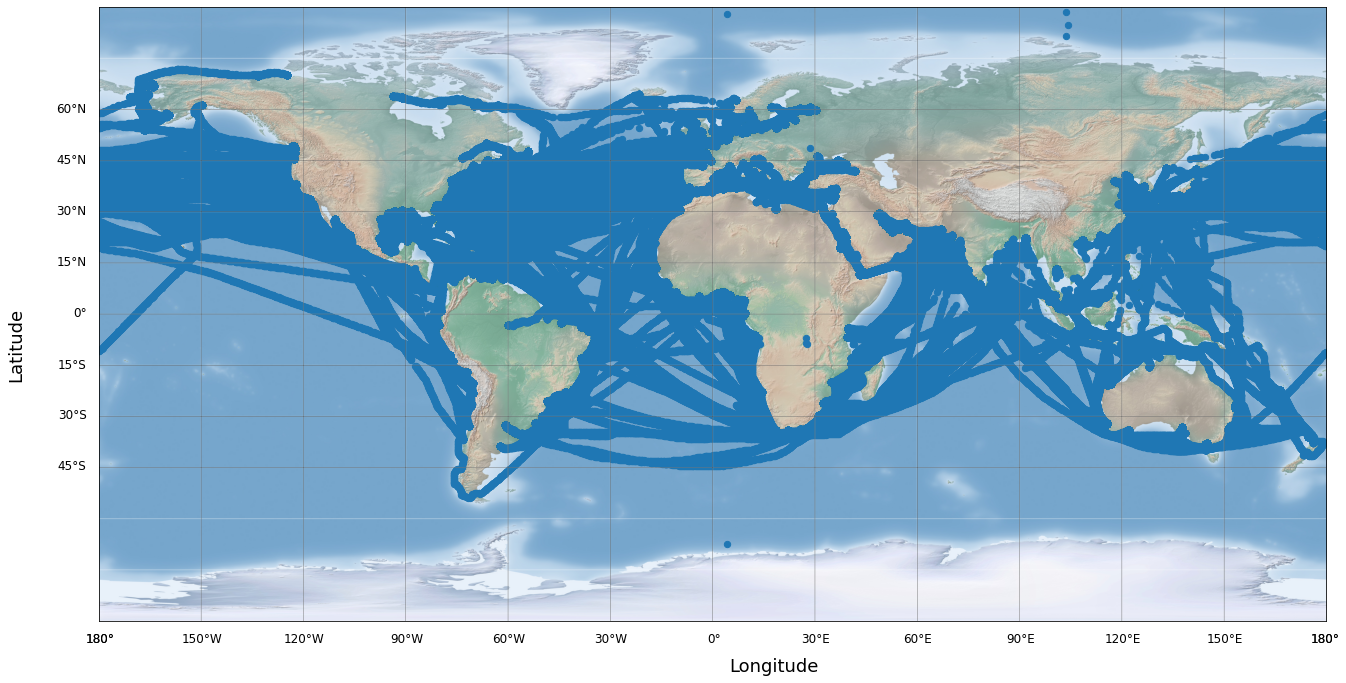

In [82]:
# plot data before  distance calculation and filtering!
plotPorts_1(df_aisH)

In [83]:
#  lists all the ship_imos
ship_imos=df_aisH["LR_IMO_Ship_No"].unique()
print ("All ship imos in ais dataset:\n",ship_imos)

for shipid in ship_imos:
    df_temp=uniqueID(shipid, df_aisH, "LR_IMO_Ship_No")
    df_aisH.update(df_temp)

All ship imos in ais dataset:
 [9392482 9307798 9319698 9836036 9836048 9836050 9712321 9443152 9443140
 9434230 9443164 9836062 9849992 9854789 9850006 9854791 9854806 9712319
 9277723 9277797 9262091 9263693 9263708 9277785 9215103 9282986 9318333
 9302126 9254070 9247778 9290658 9290660 9254240 9290646 9283710 9288930
 9230854 9295323 9358400 9375616 9390769 9358412 9392470 9392468 9425502
 9169512 9199127 9246798 9290579 9251028 9797735 9797723 9797981 9797993
 9798002 9798014 9290957 9465966 9465978 9465980 9295086 9304588 9712292
 9726487 9466025 9273260 9510682 9301914 9466013 9466001 9712307 9304590
 9465992 9243318 9172193 9240885 9243320 9288021 9726475 9143532 9250490
 9240897 9250488 9246803 9543548 9543550 9433509 9344007]
Current ship id: 9392482
new destination PORVOO previous destination AMSTERDAM
new destination ELBE PILOT previous destination PORVOO
new destination PORVOO previous destination ELBE PILOT
new destination FI SKV_ _SE GOT previous destination PORVOO
new d

new destination NLAMS previous destination FI PRV
new destination FAYARD DENMARK previous destination NLAMS
new destination GOTHENBURG previous destination FAYARD DENMARK
new destination PORVOO previous destination GOTHENBURG
new destination NEW YORK previous destination PORVOO
new destination NEW JERSEY previous destination NEW YORK
new destination HOUSTON previous destination NEW JERSEY
new destination MANZALLINO MEXICO previous destination HOUSTON
new destination PANAMA CRISTOBAL previous destination MANZALLINO MEXICO
new destination MANZANILLO MAXICO previous destination PANAMA CRISTOBAL
new destination MAZATLAN previous destination MANZANILLO MAXICO
new destination GUAYMAS previous destination MAZATLAN
new destination LA PAZ previous destination GUAYMAS
new destination ANACORTES previous destination LA PAZ
new destination PORT ANGELES PS previous destination ANACORTES
new destination VICTORIA PS previous destination PORT ANGELES PS
new destination SHELLBURN previous destination VI

C:\Users\jiec\Anaconda3\lib\site-packages\geopy\point.py:471: UserWarning: Latitude normalization has been prohibited in the newer versions of geopy, because the normalized value happened to be on a different pole, which is probably not what was meant. If you pass coordinates as positional args, please make sure that the order is (latitude, longitude) or (y, x) in Cartesian terms.
  return cls(*args)


new destination JUBAIL previous destination FUJAIRAH
new destination ARMED GUARDS ONBOARD previous destination JUBAIL
new destination SUEZ previous destination ARMED GUARDS ONBOARD
new destination SUEZ CANAL previous destination SUEZ
new destination ALGECIRAS previous destination SUEZ CANAL
new destination ST.CROIX previous destination ALGECIRAS
new destination US PEF previous destination ST.CROIX
new destination US HOU previous destination US PEF
new destination MIAMI_BIMINI_MIAMI previous destination US HOU
new destination MIZUSHIMA previous destination US HOU
new destination JPMIZ previous destination MIZUSHIMA
new destination MIZUSHIMA previous destination JPMIZ
new destination JPMIZ previous destination MIZUSHIMA
new destination JPWAK previous destination JPMIZ
new destination JPSDJ previous destination JPWAK
new destination JPSEN previous destination JPSDJ
new destination JPMIZ previous destination JPSEN
new destination JPWAK previous destination JPMIZ
new destination JPWAK _4JP 

new destination LAGOS_AFRICA previous destination NLAMS
new destination FOR ORDERS previous destination LAGOS_AFRICA
new destination ARMED GAURDS ONBOARD previous destination FOR ORDERS
new destination ESCRAVOS previous destination ARMED GAURDS ONBOARD
new destination LUANDA_ANGOLA previous destination ESCRAVOS
new destination SINGAPORE previous destination LUANDA_ANGOLA
new destination SINGAPORE AEPA POB previous destination SINGAPORE
new destination INCHON previous destination SINGAPORE AEPA POB
new destination TWMLI previous destination INCHON
new destination INCHON previous destination TWMLI
new destination SINGAPORE AEPA POB previous destination INCHON
new destination YANGPU previous destination SINGAPORE AEPA POB
new destination SINGAPORE previous destination YANGPU
new destination SINGAPORE_PEBGC previous destination SINGAPORE
new destination SINGAPORE_HORIZONT T previous destination SINGAPORE_PEBGC
new destination AEPA previous destination SINGAPORE_HORIZONT T
new destination A

new destination CANAKKALE previous destination FOR ORDER
new destination BOSPHORUS previous destination CANAKKALE
new destination NOVOROSSIYSK previous destination BOSPHORUS
new destination BOSPHORUS previous destination NOVOROSSIYSK
new destination CANAKKALE previous destination BOSPHORUS
new destination GENOA previous destination CANAKKALE
new destination FOR ORDERS previous destination GENOA
new destination ARZEW previous destination FOR ORDERS
new destination FOS previous destination ARZEW
new destination FOR ORDER previous destination FOS
new destination GIBRALTAR previous destination FOR ORDER
new destination HUELVA previous destination GIBRALTAR
new destination HOUSTON previous destination HUELVA
new destination COVENAS previous destination HOUSTON
new destination LAKE CHARLES previous destination COVENAS
new destination HOUSTON previous destination LAKE CHARLES
new destination FOR ORDER previous destination LAKE CHARLES
new destination BEAUMONT previous destination FOR ORDER
ne

Current ship id: 9836036
new destination B ANCH _ CNTAO previous destination AN
new destination AN previous destination AI
new destination nan previous destination AN
new destination BIAL previous destination AN
new destination nan previous destination C __ CN NGB
new destination nan previous destination C
new destination nan previous destination BCNSHA
new destination nan previous destination B
new destination _ KRKAN previous destination CU
new destination nan previous destination AN
new destination nan previous destination C
new destination AN previous destination C
new destination ENG_BBBBBBBB previous destination CNG
new destination nan previous destination B
new destination nan previous destination C
new destination nan previous destination C
new destination AI previous destination _ CNTXG
new destination nan previous destination C
new destination BHOU previous destination AI
new destination A VN previous destination BHOU
new destination ANGDIQXD_TOA_F previous destination A VN
n

new destination NLRTM previous destination ROTTERDAM
new destination ROTTERDAM  _       4 previous destination ROTTERDAM
new destination ROTTERDAM previous destination ROTTERDAM  _       4
new destination HELSINGBORG SWEDEN previous destination ROTTERDAM
new destination ROTTERDAM previous destination HELSINGBORG SWEDEN
new destination SILLAMAE previous destination ROTTERDAM
new destination HELSINGBORG previous destination SILLAMAE
new destination SILLAMAE previous destination HELSINGBORG
new destination WILMINGTON previous destination SILLAMAE
new destination NORFOLK previous destination WILMINGTON
new destination USMSY previous destination USORF
new destination AWAUA previous destination USMSY
new destination USHOU previous destination AWAUA
new destination USCRP previous destination USHOU
new destination USCRP previous destination USHOU
new destination PACTB previous destination USCRP
new destination GTSNJ previous destination PACTB
new destination PABLB previous destination GTSNJ
ne

new destination PABLB FOR ORDERS previous destination US LGB
new destination CHERRY POINT_WA previous destination PABLB FOR ORDERS
Current ship id: 9836048
new destination nan previous destination ANJIN
new destination AN previous destination _ CNZOS
new destination nan previous destination AN
new destination nan previous destination ANGHAI
new destination nan previous destination ANGDE_T1QHEC8B1
new destination nan previous destination AI
new destination GUI SH_ CNZOS previous destination GUI SJDER
new destination GUI SH previous destination GUI SHAN_CHINA
new destination GUI SH previous destination GUI SH_ CNYAN
new destination GUI SHANG ANCHORAGE previous destination GUI SH_ CNYAN
new destination GUI SKCNZOS previous destination GUI SH_ CNYAN
new destination GUI SH previous destination GUI SI
new destination GUI SHANG ANCHORAGE previous destination GUI SH
new destination GUI SK CHINA previous destination GUI SJ_CNTAO
new destination GUI SJ_CNTAO previous destination GUI SJDERS
new d

new destination BRISB_AI previous destination ZHOUSH
new destination BRISB_AI previous destination BRISBB
new destination BRISBANE previous destination BRISB
new destination BOTANY BAY previous destination BRISBANE
new destination BRISBANE previous destination BOTANY BAY
new destination QUANZHOU F.O previous destination BRISBANE
new destination XIAMEN previous destination QUANZHOU F.O
new destination XIAMEL previous destination XIAMEN
new destination XIAMEL previous destination XIAMEMUNG
new destination XIAMEN previous destination XIAMEMUNG
new destination QUANZHOU previous destination XIAMEN
new destination BRISB previous destination QUANZHOU
new destination BRISBCRK previous destination BRISB
new destination QUANZHOU previous destination BRISB
new destination BRISB previous destination QUANZHOU
new destination BRISBC_CHINA previous destination BRISB
new destination BRISBANE D___6_YF _. previous destination BRISB
new destination QUANZHOU previous destination BRISBANE D___6_YF _.
new d

new destination SAN JOSE previous destination RICHMOND
new destination ACAJUTLA previous destination SAN JOSE
new destination BALBOA previous destination ACAJUTLA
new destination HOUSTON previous destination BALBOA
new destination HOUSTL previous destination HOUSTON
new destination HOUSTMR _ GALVESTON previous destination HOUSTON
new destination HOUSTON_ TX. previous destination HOUSTON
new destination TUXPAN     OWF previous destination TUXPAN
new destination TUXPAN previous destination TUXPAN     OWF
Current ship id: 9836050
new destination nan previous destination B
new destination nan previous destination A _4DT_
new destination nan previous destination B_CN NGB
new destination A previous destination AN CHINA
new destination AN previous destination AI
new destination BHOU previous destination B
new destination nan previous destination A VI
new destination C previous destination BJIND_D8_BBBB
new destination nan previous destination BDER
new destination nan previous destination CNG


new destination nan previous destination ID TRH _ ZA PLZ
new destination ZA PLZ_BR ARB previous destination ID TRH _ ZA PLZ
new destination BR ARB_US SAV previous destination ZA PLZ_BR ARB
new destination US SAV _ US HOU previous destination BR ARB_US SAV
new destination US SAV _ GOLA previous destination US SAV _ US HOU
new destination USSAV_USLCH previous destination US SAV _ GOLA
new destination USSAV_BQEUX previous destination USSAV_USLCH
new destination BQEUX_TTPTP previous destination USSAV_BQEUX
new destination TTPTP previous destination BQEUX_TTPTP
new destination TTPTP_VILIB previous destination TTPTP
new destination US_ST.CROIX previous destination TTPTP_VILIB
new destination VILIB_HTPAP previous destination US_ST.CROIX
new destination HTPAP_JMKIN previous destination VILIB_HTPAP
new destination JMKIN_USHOU previous destination HTPAP_JMKIN
new destination OUTER ANCHORAGE previous destination JMKIN_USHOU
new destination TEXAS INT_TRMNL previous destination OUTER ANCHORAGE
new 

new destination NO MON previous destination US NYC
new destination NYC USA previous destination NO MON
new destination BE ANR previous destination NO MON
new destination DJ JIB previous destination BE ANR
new destination SD PZU previous destination DJ JIB
new destination EG SUZ previous destination SD PZU
new destination KR ONS previous destination EG SUZ
new destination ARMED GUARDS ONBOARD previous destination KR ONS
new destination SGSIN  PWBGA previous destination ARMED GUARDS ONBOARD
new destination ULSAN previous destination SGSIN  PWBGA
new destination KRUSN previous destination ULSAN
new destination KRUSN_ previous destination KRUSN
new destination KRONS previous destination KRUSN_
new destination KRYOS previous destination KRONS
new destination PHBTG previous destination KRYOS
new destination KRYOS previous destination PHBTG
new destination KRTSN previous destination KRYOS
new destination AUBTB previous destination KRTSN
new destination CNZOS previous destination AUBTB
new des

new destination HAMBURG previous destination BE ANR
new destination VENTSPILS previous destination HAMBURG
new destination GOTHENBURG previous destination VENTSPILS
new destination HELSINGBORG previous destination GOTHENBURG
new destination VENTSPILLS previous destination HELSINGBORG
new destination SKAW previous destination VENTSPILLS
new destination SUDAN previous destination SKAW
new destination PORT SUDAN previous destination SUDAN
new destination PORT SUDAL previous destination PORT SUDAN
new destination PORT SUDAN previous destination PORT SUDAL
new destination FUJAIRAH FOR ORDER previous destination PORT SUDAN
new destination FUJAIRAH previous destination FUJAIRAH FOR ORDER
new destination RASLAFFAN previous destination FUJAIRAH
new destination JUBAYL previous destination RASLAFFAN
new destination SULTAN_QUBOOS previous destination JUBAYL
new destination KHOR FAKKAN previous destination SULTAN_QUBOOS
new destination PORT SULTAN KABOOS previous destination KHOR FAKKAN
new destina

new destination LOS ANGELES previous destination GUAYMAS
new destination VANCOUVER previous destination LOS ANGELES
new destination DUTCH HARBOR previous destination VANCOUVER
new destination ZHOUSHAN previous destination DUTCH HARBOR
new destination GAOQIAO previous destination ZHOUSHAN
new destination HONGKONG previous destination GAOQIAO
new destination PENGERANG previous destination HONGKONG
new destination HONGKONG previous destination PENGERANG
new destination PEBGC SINGAPORE previous destination HONGKONG
new destination EAST OPL previous destination PEBGC SINGAPORE
new destination JOHOR previous destination EAST OPL
new destination PENGERANG previous destination JOHOR
new destination SIKKA previous destination PENGERANG
new destination DAMPIER previous destination SIKKA
new destination SINGAPORE previous destination DAMPIER
new destination TANJUNG LANGSAT previous destination SINGAPORE
new destination SG SIN PEBGC previous destination TANJUNG LANGSAT
new destination VOPAK BANYA 

new destination YEOSU previous destination KRYOS
new destination ZHUHAI previous destination KRYOS
new destination HONGKONG previous destination ZHUHAI
new destination SEATRIAL previous destination HONGKONG
new destination HONGKONG SLDGA previous destination SEATRIAL
new destination KAOHSIUNG previous destination HONGKONG SLDGA
new destination ULSAN previous destination KAOHSIUNG
new destination YOSU previous destination ULSAN
new destination HONOLULU_CAKI previous destination YOSU
new destination HONOLULU_B previous destination HONOLULU
new destination YOKKAIHCHI previous destination HONOLULU
new destination JP YKK previous destination YOKKAIHCHI
new destination SINGAPORE previous destination JP YKK
new destination ULSAN previous destination SINGAPORE
new destination ULSAN previous destination ULSAN____B
new destination ULSAN____B previous destination ULSAN
new destination SINGAPORE previous destination ULSAN
new destination ULSAN previous destination SINGAPORE
new destination SINGAPO

new destination KRYOS previous destination CNZOS
new destination KRYOS ANCHORAGE previous destination KRYOS
new destination CALTEX BERTH 5 previous destination KRYOS ANCHORAGE
new destination AU BTB previous destination CALTEX BERTH 5
new destination CN ZOS previous destination AU BTB
new destination XIAZHIMEN ANC previous destination CN ZOS
new destination SINGAPORE previous destination XIAZHIMEN ANC
new destination LK GAL previous destination SINGAPORE
new destination IN HZR previous destination LK GAL
new destination XXXX previous destination IN HZR
new destination UNDEFINED previous destination XXXX
new destination FUJAIRAH previous destination UNDEFINED
new destination RAS TANURA previous destination FUJAIRAH
new destination FUJAIRAH previous destination RAS TANURA
new destination FUJAIRAH U.A.E previous destination RAS TANURA
new destination JUBAIL SAUDI ARABIA previous destination FUJAIRAH U.A.E
new destination SINGAPORE previous destination JUBAIL SAUDI ARABIA
new destination B

new destination CHIBA previous destination LONG BEACH
new destination ZHOUSHAN CHINA previous destination CHIBA
new destination CHIBA  JAPAN previous destination ZHOUSHAN CHINA
new destination SINGAPOREA previous destination SINGAPORE
new destination SINGAPORE PEBGB previous destination SINGAPORE
new destination SINGAPORE AWPB previous destination SINGAPORE PEBGB
new destination SIKKA previous destination SINGAPORE AWPB
new destination MUMBAI previous destination SIKKA
new destination MUMBAI previous destination SIKKA
new destination SIKKA previous destination MUMBAI
new destination MUMBAI previous destination SIKKA
new destination CAOJING previous destination MUMBAI
new destination ZHOUSHAN previous destination CAOJING
new destination HONGKONG previous destination ZHOUSHAN
new destination MAILIAO previous destination HONGKONG
new destination TANJUNG LANGSAT previous destination MAILIAO
new destination EAST OPL previous destination TANJUNG LANGSAT
new destination SINGAPORE PEBGC previo

new destination SGSIN previous destination PORT ROXAS
new destination IDBIT previous destination SGSIN
new destination SGSIN previous destination IDBIT
new destination SGSIN     _G8_FKZ___ previous destination SGSIN
new destination PELINTUNG previous destination SGSIN
new destination NEW ORLEANS previous destination PELINTUNG
new destination NEW YORK previous destination NEW ORLEANS
new destination QUINCY previous destination NEW YORK
new destination QUINCY ANCHORAGE previous destination QUINCY
new destination BOSTON previous destination QUINCY ANCHORAGE
new destination OUTSIDE ECA DRIFTING previous destination BOSTON
new destination SKAW previous destination OUTSIDE ECA DRIFTING
new destination ANTWERP previous destination SKAW
new destination FLUSHING ROAD previous destination ANTWERP
new destination WESTHINDER previous destination FLUSHING ROAD
new destination ANTWERP previous destination WESTHINDER
new destination TEMA previous destination ANTWERP
new destination BANANA previous de

new destination DAESAM OPL previous destination DAESAL
new destination DAESALAN previous destination DAESANCNNPO
new destination DAESANK previous destination DAESAL
new destination DAESAL previous destination DAESALIA______
new destination DAESAN previous destination DAESAL
new destination DAESAN previous destination DAESAL
new destination DAESAN previous destination DAESAL
new destination DAESAN previous destination DAESAL
new destination DAESAN previous destination DAESAMDIAN
new destination DAESAN previous destination DAESAM
new destination DAESAN previous destination DAESALANG
new destination DAESAL previous destination DAESAM
new destination DAESAN previous destination DAESAL
new destination DAESAL previous destination DAESAN
new destination DAESAN previous destination DAESAORK
new destination DAESAL previous destination DAESAN
new destination DAESAL previous destination DAESAN
new destination DAESAL previous destination DAESAN
new destination DAESAL previous destination DAESAN
ne

new destination LOS ANGELES previous destination BALBOA
new destination LONG BEACH previous destination LOS ANGELES
new destination SAN FRANCISCO previous destination LONG BEACH
new destination YOSU previous destination SAN FRANCISCO
new destination CHENSHAN previous destination YOSU
new destination YOSU previous destination CHENSHAN
new destination BALBOA previous destination CHENSHAN
new destination CHENSHAN previous destination BALBOA
new destination QINGDAO previous destination CHENSHAN
new destination TANZANIA previous destination QINGDAO
new destination EPBGC previous destination TANZANIA
new destination DAR ES SALAM previous destination EPBGC
new destination FUJAIRAH previous destination DAR ES SALAM
new destination nan previous destination FUJAIRAH
new destination TANZANIA previous destination MINA AL AHMADII
new destination TOKUYAMA previous destination MINA AL AHMADII
new destination SINGAPORE previous destination TOKUYAMA
new destination FUJAIRAH previous destination SINGAPO

new destination IDDUM_SGSIN previous destination IDBLW_IDDUM
new destination SGSIN_ZAPLZ previous destination IDDUM_SGSIN
new destination ZAPLZ_USMSY previous destination SGSIN_ZAPLZ
new destination USMSY_USSAV previous destination ZAPLZ_USMSY
new destination FOR ORDERS previous destination USMSY_USSAV
new destination USSAV _ CACBC previous destination FOR ORDERS
new destination CACBC_USRHD previous destination USSAV _ CACBC
new destination USRHD_USJAX previous destination CACBC_USRHD
new destination USJAX_USHOU previous destination USRHD_USJAX
new destination USHOU previous destination USJAX_USHOU
new destination USHOU_BRSUA previous destination USHOU
new destination USHOU_BRSLZ previous destination USHOU_BRSUA
new destination BRSLZ _ BRSUA previous destination USHOU_BRSLZ
new destination BRSUA _ BRRIO previous destination BRSLZ _ BRSUA
new destination BRRIO_NLAMS previous destination BRSUA _ BRRIO
new destination BRRIO_USNYC previous destination BRRIO_NLAMS
new destination USNYC prev

new destination FUJAIRAH U.A.E previous destination HASTINGS AUSTRALIA
new destination SINGAPORE previous destination FUJAIRAH U.A.E
new destination KERTIH MALAYSIA previous destination SINGAPORE
new destination SINGAPORE PEBGC previous destination KERTIH MALAYSIA
new destination SINGAPORE PDD_1R_PB previous destination SINGAPORE PEBGC
new destination SINGAPORE OIL TANK previous destination SINGAPORE PEBGC
new destination KERTIH MALAYSIA previous destination SINGAPORE OIL TANK
new destination SINGAPORE previous destination KERTIH MALAYSIA
new destination PEBGC SINGAPORE previous destination SINGAPORE
new destination PJSB SINGAPORE previous destination PEBGC SINGAPORE
new destination NEW MANGALORE previous destination PJSB SINGAPORE
new destination SUEZ ARMED ONBOARD previous destination NEW MANGALORE
new destination SUEZ CANAL previous destination SUEZ ARMED ONBOARD
new destination ROTTERDAM previous destination SUEZ CANAL
new destination MALTA OPL previous destination ROTTERDAM
new de

new destination VIETNAM previous destination ULSAN
new destination DIEM DIEN_VIETNAM previous destination VIETNAM
new destination AT SEA previous destination DIEM DIEN_VIETNAM
new destination DIEM DIEN_VIETNAM previous destination AT SEA
new destination AT SEA previous destination DIEM DIEN_VIETNAM
new destination ZHOUSHAN FOR ORDERS previous destination DIEM DIEN_VIETNAM
new destination ZHOUSHAN previous destination ZHOUSHAN FOR ORDERS
new destination JINZHOU previous destination ZHOUSHAN
new destination MUARA previous destination JINZHOU
new destination SINGAPORE previous destination MUARA
new destination TANJUNG BIN previous destination SINGAPORE
new destination MUARA previous destination TANJUNG BIN
new destination QINZHOU previous destination TANJUNG BIN
new destination HUIZHOU previous destination QINZHOU
new destination SINGAPORE previous destination HUIZHOU
new destination HAZIRA INDIA previous destination SINGAPORE
new destination FUJAIRAH  U.A.E. previous destination HAZIRA I

new destination SINGAPORE previous destination PASIR GUDANG
new destination SGP EOPL previous destination SINGAPORE PEBGC
new destination DUMAI previous destination SGP EOPL
new destination DUMAI    _ previous destination DUMAI
new destination DUMAI previous destination DUMAI    _
new destination LUBUK GAUMKAUHENI previous destination DUMAI
new destination ARMY STATION previous destination LUBUK GAUMKAUHENI
new destination SUEZ previous destination ARMY STATION
new destination ARM GUARD ON BOARD previous destination SUEZ
new destination ARMED GUARDS ONBOARD previous destination ARM GUARD ON BOARD
new destination SUEZ previous destination ARMED GUARDS ONBOARD
new destination EVYAP previous destination SUEZ
new destination PATRAS previous destination EVYAP
new destination PATRAS previous destination ISTANBUL
new destination REVENNA previous destination PATRAS
new destination CHORNOMORSK previous destination REVENNA
new destination STRAIT OF CANAKKALE previous destination CHORNOMORSK
new 

new destination TUTICORIN previous destination KHOR AL ZUBAIR
new destination JNPT previous destination TUTICORIN
new destination FUJAIRAH previous destination JNPT
new destination YEOSU_SK previous destination FUJAIRAH
new destination KHOR AL ZUBAIR previous destination YEOSU_SK
new destination YEOSU_SK previous destination KHOR AL ZUBAIR
new destination ULSAN_SK previous destination YEOSU_SK
new destination ZHOUSAN_CHINA previous destination ULSAN_SK
new destination ULSAN_SK previous destination ZHOUSAN_CHINA
new destination YEOSU_SK previous destination ZHOUSAN_CHINA
new destination ZHOUSAN_CH previous destination ZHOUSAN_CHINA
new destination ZHOUSAN_CH previous destination ZHOUSAN_CHINA
new destination YEOSU previous destination ZHOUSAN_CHINA
new destination HONOLULU previous destination YEOSU
new destination LOS ANGELES previous destination HONOLULU
new destination LONG BEACH previous destination LOS ANGELES
new destination RICHMOND previous destination LONG BEACH
new destination

Current ship id: 9277723
new destination SHANGHOUSHAN previous destination SHANGHAI
new destination SHANGICNYAT previous destination SHANGHAI
new destination SHANGH previous destination SHANGHAI
new destination SHANGHAI previous destination SHANGH
new destination SHANGH previous destination SHANGHAI
new destination SHANGKNG OPL ANCH previous destination SHANGHAI
new destination SHANGH previous destination SHANGHAI
new destination SHANGH previous destination SHANGHAI
new destination SHANGH previous destination SHANGHAI
new destination SHANGH previous destination SHANGHAI
new destination SHANGH previous destination SHANGHAI
new destination SHANGH previous destination SHANGHAI
new destination SHANGH previous destination SHANGHAI
new destination SHANGH__ CNHSK previous destination SHANGHAI
new destination SHANGH previous destination SHANGHAI
new destination SHANGHAI previous destination SHANGH
new destination SHANGH previous destination SHANGHAI
new destination SHANGHAI previous destinatio

new destination KASHIMA_JAPAN previous destination SGSIN_PBG_B
new destination JP KSM previous destination KASHIMA_JAPAN
new destination JP KSM ANCHORAGE previous destination JP KSM
new destination SGSIN previous destination JP KSM ANCHORAGE
new destination FUJAIRAH previous destination SGSIN
new destination RAS TANURAH previous destination FUJAIRAH
new destination SINGAPORE previous destination RAS TANURAH
new destination SINGAPORE PBGB previous destination SINGAPORE
new destination SINGAPORE PEBGB previous destination SINGAPORE PBGB
new destination SINGAPORE previous destination SINGAPORE PEBGB
new destination SINGAPORE PEBGC previous destination SINGAPORE PEBGB
new destination MAP TAPHUT_TH previous destination SINGAPORE PEBGB
new destination SINGAPORE previous destination MAP TAPHUT_TH
new destination OM MCT previous destination SINGAPORE
new destination BAHRAIN previous destination OM MCT
new destination SUEZ previous destination BH SIT
new destination SA JED previous destination 

new destination AEFJR previous destination JUBAIL
new destination AEFJR ANCH B previous destination AEFJR
new destination DJJIB previous destination AEFJR ANCH B
new destination SIKKA previous destination DJJIB
new destination SGSIN previous destination SIKKA
new destination SGSIN PWBGA previous destination SGSIN
new destination KARIMUN previous destination SGSIN PWBGA
new destination SGSIN PWBGA previous destination KARIMUN
new destination E_SIN PWBGA previous destination SGSIN PWBGA
new destination SGSIN AWPB previous destination SGSIN PWBGA
new destination INSIK previous destination SGSIN AWPB
new destination TANJUNG PELEPAS previous destination INSIK
new destination SINGAPORE previous destination TANJUNG PELEPAS
new destination SOHAR previous destination SINGAPORE PEBGB
new destination FUJAIRAH previous destination SOHAR
new destination SARTA previous destination FUJAIRAH
new destination FUJIARAH previous destination SARTA
new destination ONSAN previous destination SARTA
new destin

new destination AE FJR_BH previous destination AE FJR_BH SIT
new destination AE FJR_BH SIT previous destination AE FJR_BH
new destination BH SIT_SG SIN previous destination AE FJR_BH SIT
new destination BH SIT_TW MLI previous destination BH SIT_SG SIN
new destination BH SIW__CN  IWN previous destination BH SIT_TW MLI
new destination BH SIT_TW MLI previous destination BH SIT
new destination BH SIT previous destination BH SIW
new destination BH SIUI previous destination BH SIT
new destination BH SITAN previous destination BH SIT
new destination BH SIT_TW MLI previous destination BH SIT
new destination BH SIW previous destination BH SIT_TW MLI
new destination BH SIUUNG previous destination BH SIV
new destination BH SIW previous destination BH SIT
new destination BH SIWSHIPYARD previous destination BH SIW
new destination BH SIV_PBGB_ previous destination BH SIT
new destination BH SIV KHH previous destination BH SIT
new destination BH SIUUNG previous destination BH SIT
new destination BH SI

new destination SHANGICNDAI previous destination SHANGH
new destination SHANGH previous destination SHANGHAI
new destination SHANGKRAH IRAQ previous destination SHANGHAI
new destination SHANGH previous destination SHANGHAI
new destination SHANGH previous destination SHANGHAI
new destination SHANGH previous destination SHANGHAI
new destination SHANGI PSTN previous destination SHANGHAI
new destination SHANGH _ CN HSK previous destination SHANGHAI
new destination SHANGH previous destination SHANGHAI
new destination SHANGJIAL previous destination SHANGHAI
new destination SHANGHAI previous destination SHANGH
new destination SHANGH previous destination SHANGHAI
new destination SHANGH previous destination SHANGHAI
new destination SHANGHAI previous destination SHANGH
new destination SHANGIAGUAN SHIPYARD previous destination SHANGHAI
new destination SHANGHAI previous destination SHANGKRK
new destination SHANGHAI previous destination SHANGJMACHONG
new destination SHANGHAI previous destination SH

new destination EGPSD previous destination NL AMS
new destination SA JED previous destination EGPSD
new destination FOR ORDERS previous destination SA JED
new destination YANBU previous destination FOR ORDERS
new destination ANYER previous destination YANBU
new destination SINGAPORE previous destination ANYER
new destination GALLE previous destination SINGAPORE
new destination VADINAR_INDIA previous destination GALLE
new destination LOME previous destination VADINAR_INDIA
new destination ALGOA BAY previous destination LOME
new destination KIZOMBA previous destination ALGOA BAY
new destination LOME previous destination KIZOMBA
new destination LAS PALMAS previous destination LOME
new destination ALGECRAS previous destination LAS PALMAS
new destination HUELVA previous destination ALGECIRAS
new destination PORT SAID previous destination HUELVA
new destination JAPAN FOR ORDERS previous destination PORT SAID
new destination ARMED GUARD ONBOARD previous destination JAPAN FOR ORDERS
new destin

new destination SAGIZ previous destination SAYBI
new destination SAJED previous destination SAGIZ
new destination SADHU previous destination SAJED
new destination SA JED previous destination SADHU
new destination AE FJR previous destination SA JED
new destination KW MIB previous destination AE FJR
new destination SARAB previous destination KW MIB
new destination nan previous destination KW MIB
new destination KW MIB previous destination OPL MINA SAQ
new destination DJJIB previous destination KW MIB
new destination QAMES previous destination DJJIB
new destination AE FJR previous destination QAMES
new destination QA UMS previous destination AE FJR
new destination OM SOH previous destination QA UMS
new destination INVTZ previous destination OM SOH
new destination SINGAPORE previous destination INVTZ
new destination SPORE previous destination SINGAPORE
new destination MALAYSIA previous destination SPORE
new destination COLOMBO previous destination MALAYSIA
new destination SOHAR previous de

new destination JPMIZ previous destination JPOIT
new destination PABLB_JPMIZ previous destination JPMIZ
new destination JPKIK previous destination PABLB_JPMIZ
new destination JPMIZ_JPOIT previous destination PABLB_JPMIZ
new destination JPOIT previous destination JPMIZ_JPOIT
new destination JPKIK previous destination JPOIT
new destination JPKIK    _F previous destination JPKIK
new destination JPTKY previous destination JPKIK
Current ship id: 9263693
new destination LOME previous destination LOME FOR ORDERS
new destination ABIDJAN previous destination LOME
new destination GIBRALTAR previous destination ABIDJAN
new destination LOME previous destination GIBRALTAR
new destination COTONOU previous destination LOME
new destination CONAKRY_GUINEA previous destination COTONOU
new destination MONROVIA previous destination CONAKRY_GUINEA
new destination CONAKRY FOR ORDERS previous destination MONROVIA
new destination CONAKRY previous destination CONAKRY FOR ORDERS
new destination GIBRALTAR previo

new destination CHIBA previous destination PISCO
new destination CHIBA OFF T1 previous destination CHIBA
new destination CHIBA previous destination CHIBA OFF T1
new destination CHIBA OFF T6 previous destination CHIBA
new destination CHIBA SUMITOMO_O previous destination CHIBA OFF T6
new destination CHIBA T_6 previous destination CHIBA SUMITOMO_O
new destination YOK XXNGI previous destination CHIBA T_6
new destination ZHOUSHAN previous destination YOK XXNGI
new destination ZHOUSHAN _FF previous destination ZHOUSHAN
new destination CNZOS previous destination ZHOUSHAN
new destination CNZOS_CHSHK previous destination CNZOS
new destination CNZOS_ _ CN CFD previous destination CNZOS
new destination CNZOS__CN NGB previous destination CNZOS
new destination CNZOS_ _ CN CFD previous destination CNZOS
new destination CNZOS previous destination CNZOS AN
new destination CNZOS_BERTH1 previous destination CNZOS
new destination CNZOS_EAN ZHOUSHAN previous destination CNZOS
new destination CNZOS_ previ

new destination BALBOA _PANAMA previous destination SAN VICENTE_CHILE
new destination BALBOA FOR ORDERS previous destination BALBOA _PANAMA
new destination BALBOA previous destination BALBOA FOR ORDERS
new destination LAKE CHARLES previous destination BALBOA
new destination OPL ANCHORAGE previous destination LAKE CHARLES
new destination FOR ORDERS previous destination OPL ANCHORAGE
new destination GALVESTON OFFSHORE previous destination FOR ORDERS
new destination GALVESTON previous destination GALVESTON OFFSHORE
new destination GOLA previous destination GALVESTON
new destination BOLIVAR ROADS previous destination GOLA
new destination GALVESTON ANCHORAGE previous destination BOLIVAR ROADS
new destination SW PASS previous destination GALVESTON ANCHORAGE
new destination P66 ALLIANCE previous destination SW PASS
new destination SAINT LUCIA previous destination P66 ALLIANCE
new destination CURCAO previous destination SAINT LUCIA
new destination CURACAO previous destination CURCAO
new destin

new destination FOR OPAPCHIBA JAPAN previous destination FOR ORDER
new destination SHIMOTSU previous destination FOR ORDER
new destination BALBOA previous destination SHIMOTSU
new destination NEW YORK previous destination BALBOA
new destination NEW YORK IMTT BAYONE previous destination NEW YORK
new destination AMBROSE  ANCHORAGE previous destination NEW YORK IMTT BAYONE
new destination KMI PERTH AMBOY previous destination AMBROSE  ANCHORAGE
new destination HOUSTON FOR ORDERS previous destination KMI PERTH AMBOY
new destination HOUSTON FOR ORDERQ previous destination HOUSTON FOR ORDERS
new destination BEAUMONT previous destination HOUSTON FOR ORDERS
new destination SOHAR OMAN previous destination BEAUMONT
new destination SOHAR _OMAN previous destination SOHAR OMAN
new destination SOHAR .OMAN previous destination SOHAR _OMAN
new destination ARM GUARDS ON BOARD previous destination SOHAR .OMAN
new destination SOHAR .OMAN previous destination ARM GUARDS ON BOARD
new destination SOHAR WITH 

new destination JEDDAH previous destination AMSTERDAM
new destination SUEZ previous destination JEDDAH
new destination FUJAIRAH previous destination SUEZ
new destination FUJAIRAH ALPHA ANCH previous destination FUJAIRAH
new destination RUWAIS previous destination FUJAIRAH ALPHA ANCH
new destination FUJAIRAH previous destination RUWAIS
new destination KHORFAKKAN previous destination FUJAIRAH
new destination VIZAG_INDIA previous destination KHORFAKKAN
new destination SINGAPORE previous destination VIZAG_INDIA
new destination TANJUNG BIN previous destination SINGAPORE
new destination NANSHA previous destination TANJUNG BIN
new destination NANSHAN XINGANG previous destination NANSHA
new destination NANSH_AI previous destination NANSHAO_CHINA
new destination NANSH previous destination NANSH_AI
new destination NANSH previous destination NANSH_AI
new destination NANSHAAN previous destination NANSH
new destination NANSHC previous destination NANSHC_CN SGH
new destination NANSH previous destina

new destination SHANGH previous destination SHANGKUAN
new destination SHANGH previous destination SHANGHAI
new destination SHANGH previous destination SHANGHAI
new destination SHANGH previous destination SHANGHAI
new destination SHANGH previous destination SHANGHAI
new destination SHANGK previous destination SHANGHAI
new destination SHANGH previous destination SHANGHAI
new destination SHANGH previous destination SHANGHAI
new destination SHANGJ previous destination SHANGHAI
new destination SHANGHAI previous destination SHANGJ_CNTST
new destination SHANGH previous destination SHANGHAI
new destination SHANGH previous destination SHANGHAI
new destination SHANGHORE previous destination SHANGH
new destination SHANGH previous destination SHANGHAI
new destination SHANGH previous destination SHANGHAI
new destination SHANGI_CH ZAP previous destination SHANGHAI
new destination SHANGH previous destination SHANGHAI
new destination SHANGHAI previous destination SHANGHAI_CHINA
new destination SHANGHA

new destination GALLE previous destination GORE BAY
new destination SIKKA previous destination GALLE
new destination SUEZ previous destination SIKKA
new destination GIBRALTAR previous destination SUEZ
new destination POINT TUPPER previous destination GIBRALTAR
new destination BUCKEYE PORT READING previous destination POINT TUPPER
new destination STAPELTON ANCHORAGE previous destination BUCKEYE PORT READING
new destination GARRYVILLE previous destination STAPELTON ANCHORAGE
new destination GIBRALTAR FO previous destination GARRYVILLE
new destination GARRYVILLE previous destination GIBRALTAR FO
new destination GIBRALTAR FO previous destination GARRYVILLE
new destination SUEZ FO previous destination GIBRALTAR FO
new destination FO previous destination SUEZ FO
new destination TERNEUZEN previous destination FO
new destination TUAPSE previous destination TERNEUZEN
new destination WANDELAAR ANCHORAGE previous destination TUAPSE
new destination TUAPSE previous destination WANDELAAR ANCHORAGE
n

new destination CANCHORAGE DUBAI previous destination DUBAI
new destination C ANCHORAGE DUBAI previous destination CANCHORAGE DUBAI
new destination DUBAI DRY DOCK previous destination C ANCHORAGE DUBAI
Current ship id: 9282986
new destination THAMES previous destination AMSTERDAM
new destination GOTHENBURG previous destination THAMES
new destination PRIMORSK RUSSIA previous destination GOTHENBURG
new destination SKAW previous destination PRIMORSK RUSSIA
new destination SOUND PILOT previous destination SKAW
new destination BORDEAUX previous destination PRIMORSK
new destination BORDEAUX__A previous destination BORDEAUX
new destination GEDSAR previous destination BORDEAUX
new destination BOQDEAUX previous destination GEDSAR
new destination KLAIPEDA previous destination BOQDEAUX
new destination SKAW OPL previous destination KLAIPEDA
new destination KLAIPEDA previous destination SKAW OPL
new destination SOUND PILOT previous destination KLAIPEDA
new destination KLAIPEDA previous destination 

new destination DEBRE previous destination FISKV
new destination SEBRO previous destination DEBRE
new destination BEANR previous destination SEBRO
new destination SNDKR previous destination BEANR
new destination TGLFW previous destination SNDKR
new destination CMLIT previous destination TGLFW
new destination CIABJ previous destination CMLIT
new destination CMLIT previous destination CIABJ
new destination TGLFW previous destination CMLIT
new destination NGLOS previous destination TGLFW
new destination TGLFW previous destination NGLOS
new destination GHTEM previous destination TGLFW
new destination BJCOO previous destination GHTEM
new destination GIGIB previous destination BJCOO
new destination ESLPA previous destination GIGIB
new destination GIGIB previous destination ESLPA
new destination ESALG previous destination GIGIB
new destination ITMLZ previous destination ESALG
new destination ESALG previous destination ITMLZ
new destination ITMLZ previous destination ESALG
new destination FOR 

new destination LA_USA previous destination PANAMA
new destination PORTLAND_OREGON_USA previous destination LA_USA
new destination ANACORTIS previous destination PORTLAND_OREGON_USA
new destination VANCOUVER previous destination ANACORTIS
new destination ANACORTES previous destination VANCOUVER
new destination MOLLENDO previous destination ANACORTES
new destination PISCO previous destination MOLLENDO
new destination BALBAO PANAMA previous destination PISCO
new destination BALBOA previous destination BALBAO PANAMA
new destination SW PASS previous destination BALBOA
new destination GARYVILLE previous destination SW PASS
new destination HOUSTON previous destination GARYVILLE
new destination GALVESTON previous destination HOUSTON
new destination CORPUS CHRISTI previous destination GALVESTON
new destination HOUSTON previous destination CORPUS CHRISTI
new destination PAJARITOS MX previous destination HOUSTON
new destination KMI HOUSTON previous destination PAJARITOS MX
new destination CRISTO

new destination VYSOTSK_RUSSIA previous destination LORIENT_FRANCE
new destination GOTHENBURG_SWEDEN previous destination VYSOTSK_RUSSIA
new destination SOUND PILOT STATION previous destination GOTHENBURG_SWEDEN
new destination VYSOTSK_RUSSIA previous destination SOUND PILOT STATION
new destination GDYNIA_POLAND previous destination VYSOTSK_RUSSIA
new destination VYSOTSK previous destination GDYNIA_POLAND
new destination AMSTERDAM FOR ORDERS previous destination VYSOTSK
new destination AMSTERDAM FOR ORDERP previous destination AMSTERDAM FOR ORDERS
new destination AMSTERDAM FOR ORDERS previous destination AMSTERDAM FOR ORDERP
new destination GEDSER previous destination AMSTERDAM FOR ORDERS
new destination SKAW previous destination GEDSER
new destination LORIENT previous destination SKAW
new destination AMSTERDAM FOR ORDERS previous destination LORIENT
new destination FAWLEY previous destination AMSTERDAM FOR ORDERS
new destination LAS PALMAS previous destination FAWLEY
new destination L

new destination TARRAGONA previous destination BOURGAS
new destination GIBRALTAR previous destination TARRAGONA
new destination HOUSTON previous destination GIBRALTAR
new destination USHOU previous destination HOUSTON
new destination FAIRWAY ANCHORAGE previous destination USHOU
new destination USCRP previous destination FAIRWAY ANCHORAGE
new destination CAMTR previous destination USCRP
new destination ESCOUMINS previous destination CAMTR
new destination MONTREAL previous destination ESCOUMINS
new destination EUROPE FORORDERS previous destination MONTREAL
new destination FALMOUTH previous destination EUROPE FORORDERS
new destination EUROPE FORORDERS previous destination FALMOUTH
new destination VYSOTSK previous destination FALMOUTH
new destination GOTHENBURG previous destination PRIMORSK
new destination M1BUOY previous destination GOTHENBURG
new destination PRIMORSK previous destination M1BUOY
new destination LA HAVRE previous destination PRIMORSK
new destination GEDSER previous destina

Current ship id: 9254070
new destination SALVADOR previous destination SUAPE
new destination BELEM previous destination SALVADOR
new destination BELEM_ previous destination BELEM
new destination SAO LUIS previous destination BELEM
new destination FORTALEZA previous destination SAO LUIS
new destination CABEDELO previous destination FORTALEZA
new destination PORT OF SPAIN previous destination CABEDELO
new destination CABEDELO previous destination PORT OF SPAIN
new destination GOLA previous destination PORT OF SPAIN
new destination PORT OF SPAIN previous destination GOLA
new destination HOUSTON previous destination GOLA
new destination HOUSTON previous destination GOLA
new destination GOLA previous destination HOUSTON
new destination GOLA previous destination HOUSTON
new destination GOLA previous destination HOUSTON
new destination GOLA previous destination HOUSTON
new destination HOUSTON previous destination GOLA
new destination FREEPORT previous destination HOUSTON
new destination SUAPE

new destination RIO DE JANEIRO previous destination SALVADOR
new destination SAO SEBASTIAO previous destination RIO DE JANEIRO
new destination SAO SFUSNYC previous destination SAO SEBASTIAO
new destination FUJAIRAH previous destination SAO SEBASTIAO
new destination KHAWR FAKKAN previous destination FUJAIRAH
new destination KHAWR FAKH previous destination KHAWR FAKKAN
new destination SITRA_BAHRAIN previous destination KHAWR FAKKAN
new destination HAMRIYAH previous destination SITRA_BAHRAIN
new destination RAS LAFFAN previous destination HAMRIYAH
new destination FUJAIRAH previous destination RAS LAFFAN
new destination DJIBOUTI previous destination FUJAIRAH
new destination WITH ARMED GUARDS previous destination DJIBOUTI
new destination FUJAIRAH previous destination WITH ARMED GUARDS
new destination MINA AL AMHADI previous destination FUJAIRAH
new destination DJIBOUTI previous destination MINA AL AMHADI
new destination WITH ARMED GUARDS previous destination DJIBOUTI
new destination DJIBOUT

new destination _JPYOK previous destination USLAX_KRUSN
new destination _JPYOKOFF previous destination _JPYOK
new destination _JPYOK_JPNAM previous destination _JPYOKOFF
new destination JPYOK_JPNIT previous destination _JPYOK_JPNAM
new destination JPNIT_JPKIK previous destination JPYOK_JPNIT
new destination JPKIK_AUBNE previous destination JPNIT_JPKIK
new destination AUBNE _CNZOS previous destination JPKIK_AUBNE
new destination KRTSN_ _ VN HPH previous destination AUBNE _CNZOS
new destination AUBNE_ previous destination KRTSN___ CNSGH
new destination AUBNE__CN NGB previous destination AUBNE ORE PEBGC
new destination AUBNE previous destination AUBNE__CN NGB
new destination AUBNE_ previous destination AUBNE
new destination AUBNE previous destination AUBNE_
new destination AUBNE_ previous destination AUBNE_NG
new destination AUBNE__CN SHA previous destination AUBNE
new destination AUBNE AN previous destination AUBNE
new destination AUBNE NEW PORT previous destination AUBNE
new destination

new destination AUADL previous destination AUBTB
new destination SGSIN previous destination AUADL
new destination AUKWI previous destination SGSIN
new destination AUBTB previous destination AUKWI
new destination AUNTL previous destination AUBTB
new destination SGSIN previous destination AUNTL
new destination CNDLC previous destination SGSIN
new destination SGSIN previous destination CNDLC
new destination CNDLC previous destination SGSIN
new destination KRONS previous destination CNDLC
new destination KRYOS previous destination KRONS
new destination KRONS previous destination KRYOS
new destination USLAX previous destination KRONS
new destination CAVAN previous destination USLAX
new destination USLAX previous destination CAVAN
new destination USLGB previous destination USLAX
new destination PABLB previous destination USLGB
new destination USPEF previous destination PABLB
new destination nan previous destination USPEF
new destination USTPA previous destination USPEF
new destination USGLS 

new destination TANJUNG LANGSAT_MY previous destination ONSAN
new destination SGPEBGB previous destination TANJUNG LANGSAT_MY
new destination SGPEBGC previous destination SGPEBGB
new destination VIZAG_INDIA previous destination SGPEBGC
new destination SINGAPORE previous destination VIZAG_INDIA
new destination SG PWBGA previous destination SINGAPORE
new destination SG ASSPU previous destination SG PWBGA
new destination PASIRGUDANG previous destination SG ASSPU
new destination PRAI_MALAYSIA previous destination PASIRGUDANG
new destination MELAKA previous destination PRAI_MALAYSIA
new destination HO CHI MINH_VIETNAM previous destination MELAKA
new destination RAYONG previous destination HO CHI MINH_VIETNAM
new destination MIZUSHIMA previous destination RAYONG
new destination DAESAN_SOUTH KOREA previous destination MIZUSHIMA
new destination MOUNT MAUNGANUI previous destination DAESAN_SOUTH KOREA
new destination MOUNT MAUNGANUI    T previous destination MOUNT MAUNGANUI
new destination NELSO

Current ship id: 9254240
new destination FUJAIRAH previous destination BEIRA
new destination BEIRA previous destination FUJAIRAH
new destination MINA_AL_AHMADI previous destination FUJAIRAH
new destination AL FUJAYRAH previous destination MINA_AL_AHMADI
new destination JEBEL ALI previous destination MINA_AL_AHMADI
new destination DUBAI B ANCHORAGE previous destination JEBEL ALI
new destination YANBU previous destination DUBAI B ANCHORAGE
new destination ARMED GUARDS O_B previous destination YANBU
new destination YANBU previous destination ARMED GUARDS O_B
new destination ARMED GUARDS O_B previous destination YANBU
new destination DJIBOUTI previous destination YANBU
new destination PORT SUDAN previous destination DJIBOUTI
new destination FOR ORDERS previous destination PORT SUDAN
new destination ARMS GUARDS ONBOARD previous destination FOR ORDERS
new destination FUJAIRAH previous destination ARMS GUARDS ONBOARD
new destination SOHAR previous destination FUJAIRAH
new destination DURBAN p

new destination HOUSTON previous destination PARANAGUA
new destination GIBRALTAR previous destination HOUSTON
new destination ALGECIRAS previous destination GIBRALTAR
new destination GIBRALTAR previous destination ALGECIRAS
new destination AMSTERDAM previous destination GIBRALTAR
new destination TUXPAN_ MEXICO previous destination AMSTERDAM
new destination HOUSTON FOR ORDERS previous destination TUXPAN_ MEXICO
new destination ARTHUR FOR ORDER previous destination HOUSTON FOR ORDERS
new destination SOUTH WEST PASS previous destination ARTHUR FOR ORDER
new destination 9 MILE ANCHORAGE previous destination SOUTH WEST PASS
new destination 12 MILE ANCHORAGE previous destination 9 MILE ANCHORAGE
new destination GARYVILLE previous destination 12 MILE ANCHORAGE
new destination TUXPAN previous destination GARYVILLE
new destination TUXPAN   _ previous destination TUXPAN
new destination BARCELONA previous destination TUXPAN
new destination ALGECIRAS previous destination BARCELONA
new destination 

new destination CHITTAGONG previous destination KUWAIT
new destination FUJAIRAH F O previous destination CHITTAGONG
new destination KUWAIT previous destination FUJAIRAH F O
new destination FUJAIRAH previous destination KUWAIT
new destination FUJAIR__CNQIN previous destination FUJAIRAH
new destination FUJAIRIAGANG previous destination FUJAIP_ CNHSK
new destination FUJAIRAH previous destination FUJAIRKRYOS
new destination CHITTAGONG previous destination FUJAIRAH
new destination VIZAG previous destination CHITTAGONG
new destination SG PWBGA previous destination VIZAG
new destination PENGERANG DW TERMINA previous destination SG PWBGA
new destination SG EAST OPL previous destination PENGERANG DW TERMINA
new destination MALACCA previous destination SG EAST OPL
new destination SINGPORE previous destination MALACCA
new destination SG PWBGA previous destination SINGPORE
new destination SG OTS 7 previous destination SG PWBGA
new destination SG AWPB previous destination SG OTS 7
new destination S

new destination GIGIB previous destination ESTAR
new destination GIGIB EASTERN ANCHOR previous destination GIGIB
new destination GIGIB EASTERN ANCHOP previous destination GIGIB EASTERN ANCHOR
new destination GIGIB EASTERN ANCHOP previous destination GIGIB EASTERN ANCHOR
new destination GIGIB EASTERN ANCHOP previous destination GIGIB EASTERN ANCHOR
new destination GIGIB EASTERN ANCHOR previous destination GIGIB EASTERN ANCHOP
new destination FAWLEY_U.K previous destination GIGIB EASTERN ANCHOR
new destination FAWLEY ANCHORAGE_ previous destination FAWLEY_U.K
new destination AMSTERDAM previous destination FAWLEY ANCHORAGE_
new destination AMSTERDAM_ANCHORAGE previous destination AMSTERDAM
new destination TUXPAN_MEXICO previous destination AMSTERDAM_ANCHORAGE
new destination TUXPAN_MEY previous destination TUXPAN_MEXICO
new destination TUXPAN_MEXICO previous destination TUXPAN_MEY
new destination USHOU previous destination TUXPAN_MEXICO
new destination CORPUS CHRISTY previous destination 

new destination CN ZOS previous destination CN ZOP
new destination CN ZOP previous destination CN ZOPAN
new destination CN ZOP previous destination CN ZOSHAN ANCHORAGE
new destination CN ZOP previous destination CN ZOS_CN TAO
new destination CN ZOS previous destination CN ZOP
new destination CN ZOP_ CNNGB previous destination CN ZOPAN
new destination CN ZOPAI previous destination CN ZOS
new destination CN ZOP previous destination CN ZOPAI
new destination CN ZOPORE previous destination CN ZOQSPA _ CNYIU DD
new destination CN ZOS previous destination CN ZOP
new destination CN ZOS previous destination CN ZOP
new destination CN ZOP previous destination CN ZOQO_CHINA
new destination CN ZOS previous destination CN ZOPAI
new destination CN ZOP previous destination CN ZORHOU
new destination CN ZOPCNSGH previous destination CN ZOP
new destination CN ZOQAN DOCKYARDS previous destination CN ZOS
new destination CN ZOP previous destination CN ZORCNSGH
new destination CN ZOS previous destination CN 

new destination CN ZORCNNPO previous destination CN ZOP
new destination CN ZOQN previous destination CN ZORIN
new destination CN ZOP_ CNDAL previous destination CN ZOP
new destination CN ZOP previous destination CN ZOR_HKHKG
new destination CN ZOP previous destination CN ZOQHAI SHIPYARD
new destination CN ZOP previous destination CN ZOS
new destination CN ZOSR previous destination CN ZOP
new destination CN ZOP previous destination CN ZOSR
new destination CN ZOQ__SG SIN PEBGA previous destination CN ZOP
new destination CN ZOS previous destination CN ZOP
new destination CN ZOP HAI previous destination CN ZOQN
new destination CN ZOP previous destination CN ZOPAI
new destination CN ZOSRK previous destination CN ZOS
new destination CN ZOR previous destination CN ZORG
new destination CN ZOS previous destination CN ZOP
new destination CN ZOQUNG previous destination CN ZOPAI
new destination CN ZOP previous destination CN ZOQANG
new destination CN ZOPAI _YANGSHAN_ previous destination CN ZOS
ne

new destination PORT ELIZABETH previous destination KOCHI
new destination LOME previous destination PORT ELIZABETH
new destination ZA PLZ previous destination LOME
new destination TG LFW previous destination ZA PLZ
new destination GIGIB previous destination TG LFW
new destination PT SIE previous destination GIGIB
new destination ES LPA previous destination PT SIE
new destination PT SIE previous destination ES LPA
new destination FR BOD previous destination PT SIE
new destination BE ANR previous destination FR BOD
new destination NL VLI previous destination BE ANR
new destination BE ANR previous destination NL VLI
new destination NG LOS previous destination BE ANR
new destination BEANR_NGLOS previous destination NG LOS
new destination NGLOS previous destination BEANR_NGLOS
new destination ESLPA previous destination NGLOS
new destination TGLFW previous destination ESLPA
new destination ESLPA previous destination TGLFW
new destination GIGIB previous destination ESLPA
new destination ESALG

new destination BAKAR previous destination SANTA PANAGIA BAY
new destination SOLIN_SPLIT previous destination BAKAR
new destination SKIKDA previous destination SOLIN_SPLIT
new destination TERNEUZEN previous destination SKIKDA
new destination SCHEVENINGEN previous destination TERNEUZEN
new destination ROTTERDAM previous destination SCHEVENINGEN
new destination GIBRALTOR F.O previous destination ROTTERDAM
new destination GIBRALTAR FOR ORDERS previous destination GIBRALTOR F.O
new destination NAPLES_ITALY previous destination GIBRALTAR FOR ORDERS
new destination AUGUSTA_ITALY previous destination NAPLES_ITALY
new destination DRIFTING OPL AUGUSTA previous destination AUGUSTA_ITALY
new destination FOR ORDERS previous destination DRIFTING OPL AUGUSTA
new destination DORTYOL_TT previous destination FOR ORDERS
new destination DORTYOL_TURKEY previous destination DORTYOL_TTANCH
new destination ELEUSIS previous destination DORTYOL_TURKEY
new destination ELEUSIS  _ANK OWF previous destination ELEU

new destination NOVOROSSIYSK_RUSSIA previous destination MERSIN TURKEY
new destination EREGLISI TURKEY previous destination NOVOROSSIYSK_RUSSIA
new destination NOVOROSSIYSK_RUSSIA previous destination EREGLISI TURKEY
new destination MARMARA EREGLISI previous destination NOVOROSSIYSK_RUSSIA
new destination NOVOROSSIYSK previous destination MARMARA EREGLISI
new destination MERSIN previous destination NOVOROSSIYSK
new destination NOVOROSSIYSK previous destination MERSIN
new destination MARMARA EREGLISI previous destination NOVOROSSIYSK
new destination BHOSPORUS previous destination NOVOROSSIYSK
new destination MARMARA previous destination BHOSPORUS
new destination NOVOROSSIYSK previous destination MARMARA
new destination MARSAXXLOK MALTA previous destination NOVOROSSIYSK
new destination KOPER previous destination MARSAXXLOK MALTA
new destination FOR ORDERS previous destination KOPER
new destination MALTA  FOR ORDERS previous destination FOR ORDERS
new destination MALTA previous destinatio

new destination KAOHSKNG previous destination CHIBA
new destination KAOHSHE previous destination KAOHSI
new destination KAOHSJG previous destination KAOHSH
new destination KAOHSKEA previous destination KAOHSJ
new destination KAOHSH previous destination KAOHSIUNG
new destination KAOHSH previous destination KAOHSK
new destination KAOHSI previous destination KAOHSIUNG
new destination KAOHSIING previous destination KAOHSH
new destination KAOHSING previous destination KAOHSH
new destination KAOHSIUNG previous destination KAOHSI
new destination KAOHSJG ORDER previous destination KAOHSH
new destination KAOHSH previous destination KAOHSIUNG
new destination KAOHSK O previous destination KAOHSH
new destination KAOHSI previous destination KAOHSI TW
new destination KAOHSH previous destination KAOHSIUNG
new destination MAILI previous destination KAOHSH
new destination MAILI previous destination MAILIBG OPL
new destination SINGAQNG previous destination MAILIAO
new destination SINGAPORE F.O. previous

new destination NLAMS_NGLOS previous destination AMSTERDAM
new destination ESLPA OPL previous destination NLAMS_NGLOS
new destination NLAMS_NGLOS previous destination ESLPA OPL
new destination NGLOS_TGLFW previous destination NLAMS_NGLOS
new destination LOME previous destination NGLOS_TGLFW
new destination GIBRALTAR previous destination LOME
new destination TGLFW_GIGIB previous destination GIBRALTAR
new destination CONAKRY previous destination TGLFW_GIGIB
new destination GNCKY_GIGIB previous destination CONAKRY
new destination ALGECIRAS previous destination GNCKY_GIGIB
new destination BANCO DEL HOYO previous destination ALGECIRAS
new destination ALGECIRAS previous destination BANCO DEL HOYO
new destination BANCO DEL HOYO previous destination ALGECIRAS
new destination ALGECIRAS previous destination BANCO DEL HOYO
new destination PORT SAID previous destination ALGECIRAS
new destination YANBU previous destination PORT SAID
new destination SINGAPORE previous destination YANBU
new destinati

new destination RUULU            __K previous destination RUULU
new destination LTKLJ previous destination RUULU
new destination PRPYR previous destination LTKLJ
new destination SEGOT previous destination PRPYR
new destination PRYAB previous destination SEGOT
new destination YABUCOA previous destination PRYAB
new destination COMAM previous destination YABUCOA
new destination POZOS COLORADOS previous destination COMAM
new destination USLCH previous destination POZOS COLORADOS
new destination PACTB previous destination USLCH
new destination ECLLD previous destination PACTB
new destination PABLB previous destination ECLLD
new destination USHOU previous destination PABLB
new destination USGLS previous destination USHOU
new destination USTXT previous destination USGLS
new destination BRPNG previous destination USTXT
new destination BRSSZ previous destination BRPNG
new destination ARSLO previous destination BRSSZ
new destination RECALADA PS previous destination ARSLO
new destination ARSLO pr

new destination _AT_K  9P_   7_ 0 previous destination CATUK
new destination CATUK previous destination _AT_K  9P_   7_ 0
new destination WISE BAY previous destination CATUK
new destination USOME previous destination WISE BAY
new destination US SFO previous destination USOME
new destination CAVAN previous destination US SFO
Current ship id: 9390769
new destination ROT.NL previous destination NL AMS
new destination NL RTM previous destination ROT.NL
new destination RU ULU VIA NOK previous destination NL RTM
new destination RU ULU VIA SOUND previous destination RU ULU VIA NOK
new destination RU ULU previous destination RU ULU VIA SOUND
new destination RU ULU           __ previous destination RU ULU
new destination RU ULU           __2 previous destination RU ULU
new destination NL RTM FO previous destination RU ULU
new destination RU PRI previous destination NL RTM FO
new destination GB TRA previous destination RU PRI
new destination SE GOT previous destination GB TRA
new destination RU 

new destination US JAX previous destination US BOS
new destination US HOU previous destination US JAX
new destination SW PASS. previous destination US HOU
new destination BR PNG previous destination SW PASS.
new destination AR SLO previous destination BR PNG
new destination RECALADA previous destination AR SLO
new destination AR SLO previous destination RECALADA
new destination BR PNG previous destination AR SLO
new destination ZA PLZ previous destination BR PNG
new destination IN NSA previous destination ZA PLZ
new destination MUMBAI previous destination IN NSA
new destination KANDLA previous destination MUMBAI
new destination JUBAIL previous destination KANDLA
new destination JEBEL ALI FOR ORDERS previous destination JUBAIL
new destination JEBEL ALI FOR ORDERS previous destination COLOMBO
new destination FUJAIRAH previous destination JEBEL ALI FOR ORDERS
new destination ARM GUARDS previous destination FUJAIRAH
new destination SUEZ previous destination ARM GUARDS
new destination ALEXA

new destination MIRI previous destination DAESAN
new destination LABUAN previous destination MIRI
new destination AEPA _ S PORE previous destination LABUAN
new destination SG_PEBGC previous destination AEPA _ S PORE
new destination PARDIP previous destination SG_PEBGC
new destination PARADIP previous destination PARDIP
new destination FOR ORDERS previous destination PARADIP
new destination CAPETOWN OPL previous destination FOR ORDERS
new destination FOR ORDERS previous destination CAPETOWN OPL
new destination MASSANGO previous destination FOR ORDERS
new destination MASSONGO previous destination MASSANGO
new destination SARROCH_ITALY previous destination MASSONGO
new destination FOR ORDERS previous destination SARROCH_ITALY
new destination CEYHAN previous destination FOR ORDERS
new destination TRIESTE previous destination CEYHAN
new destination TRIESTE previous destination TRIESTE  _ANY
new destination MALTA previous destination TRIESTE
new destination FOR ORDERS previous destination MA

new destination ABIDJAN ANCHORAGE previous destination ABIDJAN CBM BOUY
new destination ABIDJAN CDM previous destination ABIDJAN ANCHORAGE
new destination ABIDJAN previous destination ABIDJAN CDM
new destination ABIDJAN PS previous destination ABIDJAN
new destination ABIDJAN CBM BOUY previous destination ABIDJAN PS
new destination LOME previous destination ABIDJAN CBM BOUY
new destination GIBRALTAR F.O previous destination LOME
new destination GHENT previous destination GIBRALTAR F.O
new destination CRISTOBAL previous destination GHENT
new destination BALBOA ANCHORAGE previous destination CRISTOBAL
new destination PORTLAND OR previous destination BALBOA ANCHORAGE
new destination SAN FRANCISCO previous destination PORTLAND OR
new destination PORTLAND OR previous destination SAN FRANCISCO
new destination SAN FRANCISCO previous destination PORTLAND OR
new destination ZHOUSHAN previous destination SAN FRANCISCO
new destination COLOMB__CNQIN previous destination ZHOUSHAN
new destination COL

new destination NASCO SHIPYARD previous destination NASCO
new destination NASCO SHIP previous destination NASCO SHIPYARD
new destination NASCO__CN SGH previous destination NASCO_CNTST
new destination NASCO_CNSGH previous destination NASCO SHIPYARD
new destination NASCO SHIPYARD previous destination NASCO
new destination NASCO_CNTST previous destination NASCO SHIPYARD
new destination NASCO SHIPYARD previous destination NASCO
new destination NASCO SHIPYARD previous destination NASCO
new destination NASCO AI previous destination NASCO SHIPYARD
new destination NASCO_ _ CN DALIAN previous destination NASCO SHIPYARD
new destination NASCO SHIP previous destination NASCO SHIPYARD
new destination NASCO SHIP previous destination NASCO SHIPYARD
new destination NASCO N _ CN CJK previous destination NASCO SHIPYARD
new destination NASCO_ previous destination NASCO SHIPYARD
new destination NASCO SHIP previous destination NASCO SHIPYARD
new destination NASCO G _ CN NGB previous destination NASCO SHIPY

new destination RICHMOND previous destination LOS ANGELES
new destination BALBOA previous destination RICHMOND
new destination LA LIBERTAD previous destination BALBOA
new destination BALBOA previous destination LA LIBERTAD
new destination PORT ESQUIVEL previous destination BALBOA
new destination ST EUSTATIUS previous destination PORT ESQUIVEL
new destination PORT ARTHUR previous destination ST EUSTATIUS
new destination SW PASS previous destination PORT ARTHUR
new destination PLAQUEMINE ANCHORAGE previous destination SW PASS
new destination PLAQUEMINE ANCHORAGD previous destination PLAQUEMINE ANCHORAGE
new destination PLAQUEMINE ANCHORAGE previous destination PLAQUEMINE ANCHORAGD
new destination PLAQUEMINE ANCHORAGE previous destination PLAQUEMINE ANCHORAGD
new destination PLAQUEMINE ANCHORAGE previous destination PLAQUEMINE ANCHORAGD
new destination QUEBEC previous destination PLAQUEMINE ANCHORAGD
new destination LES ESCOUMINS previous destination QUEBEC
new destination MONTREAL previo

new destination NLAMS previous destination NLRTM
new destination FIPRV previous destination NLAMS
new destination MATNG previous destination FIPRV
new destination TANGIER MED previous destination MATNG
new destination MAJFL previous destination TANGIER MED
new destination GIGIB previous destination MAJFL
new destination ESCAR previous destination GIGIB
new destination NEW YORK FOR ORDERS previous destination ESCAR
new destination FOR ORDERS previous destination NEW YORK FOR ORDERS
new destination NEW YORK previous destination FOR ORDERS
new destination NY STAPLETON ANCHOR previous destination NEW YORK
new destination POINT TUPPER previous destination NY STAPLETON ANCHOR
new destination FOR ORDERS previous destination POINT TUPPER
new destination CHRISTOBAL previous destination FOR ORDERS
new destination CRISTOBAL previous destination CHRISTOBAL
new destination CHRISTOBAL previous destination CRISTOBAL
new destination CRISTOBAL previous destination CHRISTOBAL
new destination CRISTOBAL P

new destination UST LUGA previous destination TALLINN
new destination UST LUGA         ___ previous destination UST LUGA
new destination GAVLE previous destination UST LUGA
new destination UST LUGA previous destination GAVLE
new destination AMSTERDAM previous destination UST LUGA
new destination ANTWERP previous destination AMSTERDAM
new destination IMMINGHAM previous destination ANTWERP
new destination AMSTERDAM previous destination IMMINGHAM
new destination PORVOO previous destination AMSTERDAM
new destination AMSTERDAM previous destination PORVOO
new destination AMSTERDAM FO previous destination AMSTERDAM
new destination AMSTERDAM previous destination AMSTERDAM FO
new destination NEW YORK previous destination AMSTERDAM
new destination GIBRALTOR previous destination NEW YORK
new destination HOUSTAN FOR ORDERS previous destination GIBRALTOR
new destination HOUSTON previous destination HOUSTAN FOR ORDERS
new destination HOUSTAN FOR ORDERS previous destination HOUSTON
new destination SU

new destination ROTTERDAM previous destination TERNEUZEN
new destination ROTTERDAM ANCH. previous destination ROTTERDAM
new destination AMUAY BAY previous destination ROTTERDAM ANCH.
new destination PUNTA CARDON previous destination AMUAY BAY
new destination ARUBA FOR ORDER previous destination PUNTA CARDON
new destination GIBRALTAR F.O previous destination ARUBA FOR ORDER
new destination KINGSTON previous destination GIBRALTAR F.O
new destination GARYVILLE previous destination KINGSTON
new destination SW PASS ANCH previous destination GARYVILLE
new destination PAJARITOS previous destination SW PASS ANCH
new destination AWATING ORDERS previous destination PAJARITOS
new destination HOUSTON previous destination AWATING ORDERS
new destination HOUSTON KMI BERTH 3 previous destination HOUSTON
new destination KINGSTON   _ previous destination HOUSTON KMI BERTH 3
new destination KINGSTON F O previous destination KINGSTON   _
new destination KINGSTON previous destination KINGSTON F O
new desti

new destination FOR ORDERS previous destination ANTWERP
new destination SAINT PETERSBURG previous destination FOR ORDERS
new destination TALLINN previous destination SAINT PETERSBURG
new destination FLUSHING previous destination TALLINN
new destination HAMBURG previous destination FLUSHING
new destination VYSOTSK previous destination HAMBURG
new destination VYSOTSK       . previous destination VYSOTSK
new destination TALLINN previous destination VYSOTSK       .
new destination VYSOTSK       . previous destination TALLINN
new destination VYSOTSK previous destination VYSOTSK       .
new destination AMESTERDAMFORORDERS previous destination VYSOTSK       .
new destination DUNKIRK previous destination AMESTERDAMFORORDERS
new destination VYSOTSK       . previous destination DUNKIRK
new destination MUUGA previous destination VYSOTSK       .
new destination VYSOTSK       . previous destination MUUGA
new destination AMESTERDAMFORORDERS previous destination VYSOTSK       .
new destination HAMBUR

new destination TANJUNG BIN previous destination SINGAPORE
new destination PEBG B SINGAPORE previous destination TANJUNG BIN
new destination PEBG B SIMNG previous destination PEBG B SINGAPORE
new destination ZHOUSHAN previous destination PEBG B SINGAPORE
new destination RIO DE JANEIRO previous destination ZHOUSHAN
new destination ZHOUSHAN previous destination RIO DE JANEIRO
new destination ZHOUSJGA previous destination ZHOUSHAN
new destination ZHOUSHAN  ANCHORAGE previous destination ZHOUSHAN
new destination ZHOUSIAN_ CHINA previous destination ZHOUSHAN
new destination ZHOUSK previous destination ZHOUSHAN
new destination ZHOUSH previous destination ZHOUSHAN
new destination ZHOUSH previous destination ZHOUSHAN
new destination WUHUJI_CNTAO previous destination ZHOUSHAN
new destination WUHUJICNNPO previous destination WUHUJJKRKWY
new destination WUHUJICNNPO previous destination WUHUJICNSGHY
new destination WUHUJIAO previous destination WUHUJICNNPO
new destination WUHUJH__ CNHSK previous d

new destination PENARA previous destination EAST_OPL
new destination SUNGA_UDANG previous destination PENARA
new destination KERTEH previous destination SUNGA_UDANG
new destination SUNGAI_UDANG previous destination KERTEH
new destination BINTULU previous destination SUNGAI_UDANG
new destination SUNGAI_UDANG previous destination BINTULU
new destination KIMANIS previous destination SUNGAI_UDANG
new destination BINTULU previous destination KIMANIS
new destination SUNGAI_UDANG previous destination BINTULU
new destination PORT_DICKSON previous destination SUNGAI_UDANG
new destination BINTULU previous destination PORT_DICKSON
new destination KIMANIS previous destination BINTULU
new destination SUNGAI_UDANG previous destination KIMANIS
new destination SINGAPORE_PEBGB previous destination SUNGAI_UDANG
new destination TNJUNG_BRUAS_MALACCA previous destination SINGAPORE_PEBGB
new destination SINGAPORE_PEBGB previous destination TNJUNG_BRUAS_MALACCA
new destination SINGAPORE_PUL.BUKOM previous de

new destination WHANGAREI_N.ZEALAND previous destination WHANGAREI_NEW ZEALAN
new destination SINGAPORE previous destination WHANGAREI_N.ZEALAND
new destination COLOMBO previous destination SINGAPORE
new destination COLOMBO_SRI LANKA previous destination COLOMBO
new destination COLOMBO previous destination COLOMBO_SRI LANKA
new destination COLOMBO_SRI LANKA previous destination COLOMBO
new destination SG EAST OPL previous destination SINGAPORE
new destination OPL previous destination SG EAST OPL
new destination PEBG_C_ previous destination AEPA
new destination SINGAPORE previous destination PEBG_C_
new destination SG_PEBG_C_ previous destination SINGAPORE
Current ship id: 9199127
new destination SINGAPORE previous destination SUNGAI UDANG
new destination BINTULU previous destination SINGAPORE
new destination SUNGAI UDANG previous destination BINTULU
new destination BINTULU previous destination SUNGAI UDANG
new destination SUNGAI UDANG previous destination BINTULU
new destination KIMANI

new destination SUNGAI UDANG_MY previous destination DULANG_ MY
new destination BINTULU_MY previous destination SUNGAI UDANG_MY
new destination SINGAPORE previous destination BINTULU_MY
new destination SUNGAI UDANG_MY previous destination BINTULU_MY
new destination LABUAN_MY previous destination SUNGAI UDANG_MY
new destination SINGAPORE previous destination LABUAN_MY
new destination LABUAN_ MY previous destination SINGAPORE
new destination LABUAN_SABAH previous destination LABUAN_ MY
new destination SUNGAI UDANG_MY previous destination LABUAN_SABAH
new destination LABUAN_MY previous destination SUNGAI UDANG_MY
new destination SINGAPORE previous destination LABUAN_MY
new destination MIRI_MY previous destination LABUAN_ MY
new destination SUNGAI UDANG_MY previous destination MIRI_MY
new destination SUNGAI UD previous destination SUNGAI UDANG_MY
new destination SINGAPORE_ AEBC previous destination SUNGAI UDANG_MY
new destination SINGAPORE_ PEBGB previous destination SINGAPORE_ AEBC
new de

new destination SINGAPORE previous destination SUNGAI UDANG_MY
new destination SUNGAI UDANG_MY previous destination KIMANIS
new destination SINGAPORE previous destination SUNGAI UDANG_MY
new destination BINTULU_MY previous destination LABUAN
new destination SUNGAI UDANG_MY previous destination BINTULU_MY
new destination SINGAPORE previous destination SUNGAI UDANG_MY
new destination SINGAPORE PEBGB previous destination SINGAPORE
new destination DULANG_MY previous destination SINGAPORE PEBGB
new destination LABUAN_MY previous destination DULANG_MY
new destination KIMANIS previous destination LABUAN_MY
new destination LINGGI previous destination KIMANIS
new destination SUNGAI UDANG previous destination LINGGI
new destination SINGAPORE previous destination SUNGAI UDANG
new destination SINGAPORE PJSB previous destination SINGAPORE
new destination SINGAPORE_AEBB previous destination SINGAPORE PJSB
new destination ZHOUZHAN_CH previous destination SINGAPORE_AESPA
new destination ZHOUZHAN_ prev

new destination ALGECIRAS previous destination SARROCH
new destination ALGECIRAS _ POOLE previous destination ALGECIRAS
new destination PUERTO RICO previous destination ALGECIRAS
new destination LOUISIANA previous destination PUERTO RICO
new destination HOUSTON TX previous destination LOUISIANA
new destination LOUISIANA previous destination HOUSTON TX
new destination HOUSTON TX previous destination LOUISIANA
new destination PARAJITOS previous destination HOUSTON TX
new destination HOUSTON previous destination PAJARITOS
new destination LOUISIANA previous destination HOUSTON
new destination BEAUMONT previous destination LOUISIANA
new destination SUN ANCHORAGE previous destination BEAUMONT
new destination SABINE ANCH. previous destination SUN ANCHORAGE
new destination TUXPAN MX previous destination SABINE ANCH.
new destination GARRYVILLD previous destination TUXPAN MX
new destination PAJARITOS previous destination GARRYVILLE
new destination TUXPAN previous destination PAJARITOS
new destin

new destination GALV B28 previous destination HOUSTON
new destination HOUST ANCH previous destination GALV B28
new destination KMI B3 previous destination HOUST ANCH
new destination HOUSTON ANCH previous destination KMI B3
new destination CRISTOBAL previous destination HOUSTON ANCH
new destination MANZANILLO MX previous destination CRISTOBAL
new destination MXMZT previous destination MANZANILLO MX
new destination MXTPB previous destination MXMZT
new destination MX GYN previous destination MXTPB
new destination MX GYM previous destination MX GYN
new destination BALBOA FO previous destination MX GYM
new destination RICHMOND previous destination BALBOA FO
new destination USRCH previous destination RICHMOND
new destination ROSARITO previous destination USRCH
new destination LA PAZ previous destination ROSARITO
new destination BALBOA previous destination LA PAZ
new destination PABLB previous destination BALBOA
new destination SWPASS previous destination PABLB
new destination DEV PT HSTON_SW

new destination NEW YORK previous destination LAVERA
new destination US NYC previous destination NEW YORK
new destination US NYC ANCHORAGE previous destination US NYC
new destination US NYC previous destination US NYC ANCHORAGE
new destination US NYC ANCHORAGE previous destination US NYC
new destination GIBR FOR ORDER previous destination US NYC ANCHORAGE
new destination FOR ORDER previous destination GIBR FOR ORDER
new destination SKAW FOR ORDER previous destination FOR ORDER
new destination SKAW previous destination SKAW FOR ORDER
new destination SKAW DRIFTING previous destination SKAW
new destination SKAW previous destination SKAW DRIFTING
new destination UST LUGA previous destination SKAW
new destination AMSTERDAM previous destination UST LUGA
new destination AMSTERDAM        __C previous destination AMSTERDAM
new destination NLAMS previous destination AMSTERDAM
new destination DZSKI previous destination NLAMS
new destination GIGIB previous destination DZSKI
new destination SKIKDA 

new destination EAST LONDON previous destination ZA DUR
new destination EAST LONDON DRITING previous destination EAST LONDON
new destination WALVIS BAY previous destination EAST LONDON DRITING
new destination RECALADA ARGENTINA previous destination WALVIS BAY
new destination LAS PALMAS previous destination RECALADA ARGENTINA
new destination ESCRAVOS NIGERIA previous destination LAS PALMAS
new destination ESCRAVOS EGTL previous destination ESCRAVOS NIGERIA
new destination AMSTERDAM previous destination ESCRAVOS EGTL
new destination ESCRAVOS EGTL previous destination AMSTERDAM
new destination OILTANKING AMSTERDAM previous destination AMSTERDAM
new destination EUROTANK JETTY 07 previous destination OILTANKING AMSTERDAM
new destination WAFR previous destination EUROTANK JETTY 07
new destination LAGOS WAFR  SAA previous destination LAGOS WAFR
new destination LOME TOGO previous destination LAGOS WAFR  SAA
new destination SANTOS previous destination LOME TOGO
new destination PARANAGUA previou

new destination CORYTON previous destination SUEZ EGYPT
new destination GBCOY previous destination CORYTON
new destination GBCAN previous destination GBCOY
new destination NLAMS previous destination GBCAN
new destination GHTEM previous destination NLAMS
new destination AEFJR previous destination GHTEM
new destination ALFJR previous destination AEFJR
new destination KWMEA previous destination ALFJR
new destination KWMEA_ MISHAB previous destination KWMEA
new destination KWMIB previous destination KWMEA
new destination SUEZ previous destination KWMIB
new destination ARMED GUARDS ONBOARD previous destination SUEZ
new destination SUEZ previous destination ARMED GUARDS ONBOARD
new destination KUWAIT previous destination SUEZ
new destination ARMED GUARDS ONBOARD previous destination KUWAIT
new destination KWMIB previous destination ARMED GUARDS ONBOARD
new destination SUEZ previous destination KWMIB
new destination CORYTON_UK previous destination SUEZ
new destination CORYTON previous destina

new destination US SFO previous destination US LAX
new destination GTSNJ previous destination US SFO
new destination SVAQJ previous destination GTSNJ
new destination GTSNJ previous destination SVAQJ
new destination PABLB previous destination GTSNJ
new destination USHOU previous destination PABLB
new destination USLCH previous destination USHOU
new destination MXRST previous destination USLCH
new destination MX TPB previous destination MXRST
Current ship id: 9797981
new destination KALUNDBURG previous destination ROTTERDAM
new destination NYHAMNA previous destination KALUNDBURG
new destination NYHAMNA _ _C_BJA_Y_Z previous destination NYHAMNA
new destination KRISTIANSUND previous destination NYHAMNA
new destination NYHAMNA previous destination BM _ZP_C9_PGP0H N
new destination NARVIK previous destination NYHAMNA
new destination NYHAMNA previous destination NARVIK
new destination FUJAIRAH previous destination NYHAMNA
new destination PORT SAID previous destination FUJAIRAH
new destination

new destination ZTHE P previous destination ZTHE S
new destination ZTHE R_CNYSA previous destination ZTHE P
new destination ZTHE RDERS previous destination ZTHE SHIPYARD
new destination ZTHE R_CN DLC previous destination ZTHE S
new destination ZTHE P previous destination ZTHE SHAN
new destination ZTHE S previous destination ZTHE P
new destination ZTHE Q previous destination ZTHE PAI OPL
new destination ZTHE SU_CN previous destination ZTHE S
new destination ZTHE PAI previous destination ZTHE P
new destination ZTHE SHAN previous destination ZTHE PAN_ZGB
new destination ZTHE SHAN previous destination ZTHE P
new destination ZTHE Q previous destination ZTHE P
new destination ZTHE PAN previous destination ZTHE R
new destination ZTHE S_CN SHA previous destination ZTHE Q
new destination ZTHE PUA_CHINA previous destination ZTHE QO
new destination ZTHE S previous destination ZTHE SHIPYARD
new destination ZTHE P previous destination ZTHE S
new destination ZTHE S_CN SHA previous destination ZTHE P

new destination ANTWERP previous destination LA PALLICE
new destination CANAKKALE previous destination ANTWERP
new destination KAVKAZ previous destination NOVOROSSIYSK
new destination ISTANBUL previous destination KAVKAZ
new destination PORT SAID EGYPT previous destination ISTANBUL
new destination DAESAN  SOUTH KOREA previous destination PORT SAID EGYPT
new destination ARM GAURDS ONBOARD previous destination DAESAN  SOUTH KOREA
new destination DAESAN previous destination ARM GAURDS ONBOARD
new destination YEOSU previous destination DAESAN
new destination DAESAN previous destination YEOSU
new destination SINGAPORE FOR ORDERS previous destination DAESAN
new destination PEBGB previous destination SINGAPORE FOR ORDERS
new destination JUBAIL previous destination PEBGB
new destination KOCHI OPL previous destination JUBAIL
new destination JUBAIL previous destination KOCHI OPL
new destination FUJAIRAH previous destination JUBAIL
new destination YANBU previous destination FUJAIRAH
new destinati

new destination SINGAPORE previous destination RUWAIS_UAE
new destination RUWAIS_UAE previous destination SINGAPORE
new destination RUWAIS_UAE previous destination SINGAPORE
new destination KAOSHKHSIUNG previous destination KAOSHIUNG
new destination KAOSHIUNG previous destination KAOSHI
new destination KAOSHH OFF previous destination KAOSHH
new destination KAOSHIUNG previous destination KAOSHH
new destination KAOSHH previous destination KAOSHIUNG
new destination KAOSHH previous destination KAOSHIUNG
new destination KAOSHIUNG previous destination KAOSHH
new destination KAOSHH previous destination KAOSHJG_CHINA
new destination KAOSHIUNG previous destination KAOSHH
new destination KAOSHIUNG previous destination KAOSHH
new destination KAOSHIUNG previous destination KAOSHH
new destination KAOSHK previous destination KAOSHIUNG
new destination KAOSHH_HK HKG previous destination KAOSHIN
new destination KAOSHIUNG previous destination KAOSHH
new destination KAOSHIUNG previous destination KAOSHH


new destination RUWAIS previous destination MUSCAT OPL
new destination CHIBA previous destination RUWAIS
new destination DAESEN previous destination CHIBA
new destination DAESAN previous destination DAESEN
new destination DAESAN             B previous destination DAESAN
new destination JPOIT previous destination DAESAN
new destination JPOIT    E_ previous destination JPOIT
new destination JPOIT previous destination JPOIT    E_
new destination JPOIT    E_ previous destination JPOIT
new destination JPOIT    E_ previous destination JPOIT
new destination SINGAPORE previous destination JPOIT
new destination FUJAIRAH previous destination SINGAPORE
new destination OIL TANKING TERMINAL previous destination FUJAIRAH
new destination FUJAIRAH  NESIA previous destination FUJAIRAH
new destination RAS LAFFAN previous destination FUJAIRAH
new destination FOR ORDERS previous destination RAS LAFFAN
new destination RAS LAFFAN BERTH 30 previous destination FOR ORDERS
new destination DAESAN previous desti

Current ship id: 9798002
new destination DAESAN previous destination RAS LAFFAN
new destination DAESAN   G0 previous destination DAESAN
new destination SINGAPORE previous destination DAESAN
new destination DAESALAI previous destination DAESAN
new destination DAESAMAOANCHORAGE previous destination DAESAL
new destination DAESAL previous destination DAESAN
new destination DAESAN ANCHORAGE previous destination DAESAOU CN
new destination DAESAO previous destination DAESAN ANCHORAGE
new destination DAESAOEA previous destination DAESAN ANCHORAGE
new destination DAESAO previous destination DAESAN ANCHORAGE
new destination DAESAMN previous destination DAESAN ANCHORAGE
new destination DAESAL previous destination DAESAN ANCHORAGE
new destination DAESAM previous destination DAESAN ANCHORAGE
new destination DAESAO previous destination DAESAN ANCHORAGE
new destination MAI_LIAO previous destination DAESAN ANCHORAGE
new destination MAI_LIAO E0 previous destination MAI_LIAO
new destination MAI_LIAO pre

new destination KARACHI OPL previous destination KARACHI
new destination P previous destination KARACHI OPL
new destination RAS_LAFFAN previous destination P
new destination SING previous destination RAS_LAFFAN
new destination P previous destination SING
new destination SINGAPORE PEBG_B previous destination P
new destination SENDAI JPN previous destination SINGAPORE PEBG_B
new destination _JP KWS previous destination SENDAI JPN
new destination OPL previous destination _JP KWS
new destination JPN KWS previous destination OPL
new destination JPN IWK previous destination JPN KWS
new destination JPIWK previous destination JPN IWK
new destination JPCHT previous destination JPIWK
new destination JPCTA previous destination JPCHT
new destination JP NGO previous destination JPCTA
new destination KR previous destination JP NGO
new destination KR ONS previous destination KR
new destination KR ONP previous destination KR ONS
new destination SINGAPORE previous destination KR ONS
new destination EGS

new destination ST. EUSTATIUS previous destination JT
new destination GIB previous destination ST. EUSTATIUS
new destination ST. EUSTATIUS previous destination GIB
new destination GIBRALTAR previous destination ST. EUSTATIUS
new destination ALGECIRAS OPL previous destination GIBRALTAR
new destination NOVOROSSYISK previous destination ALGECIRAS OPL
new destination NOVOROSSYH previous destination NOVOROSSYISK
new destination ISTANBUL previous destination NOVOROSSYISK
new destination SUEZ F.O previous destination ISTANBUL
new destination PORT SAID previous destination SUEZ F.O
new destination SPORE FO previous destination PORT SAID
new destination SINGAPORE F.O previous destination SPORE FO
new destination ARMED GUARDS ONBOARD previous destination SINGAPORE F.O
new destination INCHON previous destination ARMED GUARDS ONBOARD
new destination INCHOL previous destination INCHON
new destination INCHON previous destination INCHOL
new destination INCHON             B previous destination INCHON

new destination ALGECIRAS OPL previous destination CEUTA
new destination SOUTHWOLD previous destination ALGECIRAS OPL
new destination AMSTERDAM previous destination SOUTHWOLD
Current ship id: 9290957
new destination USHOU previous destination CAPTU
new destination HOUSTON REFINING previous destination USHOU
new destination USHOU_FAIRWAY ANCHOR previous destination HOUSTON REFINING
new destination USHOU_FAIPFLEET previous destination USHOU_FAIRWAY ANCHOR
new destination USHOU_FAIP previous destination USHOU_FAIRWAY ANCHOR
new destination USHOU_FAIQRK previous destination USHOU_FAIRWAY ANCHOR
new destination USHOU_FAIPI RIVER previous destination USHOU_FAIRWAY ANCHOR
new destination USHOU_FAIQW previous destination USHOU_FAIRWAY ANCHOR
new destination USHOU_FAIP previous destination USHOU_FAIRWAY ANCHOR
new destination USHOU_FAIP previous destination USHOU_FAIRWAY ANCHOR
new destination USHOU_FAIP previous destination USHOU_FAIRWAY ANCHOR
new destination USHOU_FAIPX. previous destination

new destination TUBAN previous destination SINGAPORE
new destination SINGAPORE previous destination TUBAN
new destination TUBAN previous destination SINGAPORE
new destination SIKKA previous destination SINGAPORE
new destination SINGAPORE previous destination SIKKA
new destination SINGAPORE previous destination SIKKA
new destination INCHEON previous destination SINGAPORE
new destination INCHEMNG previous destination INCHEON
new destination INCHEL previous destination INCHEO
new destination INCHEON previous destination INCHEL
new destination SINGAQRAQ previous destination INCHEON
new destination INCHEON previous destination SINGAQRAQ
new destination INCHEON            B previous destination INCHEON
new destination INCHEON  G8 previous destination INCHEON
new destination QINZHOU previous destination INCHEON
new destination QINZHOU            B previous destination QINZHOU
new destination INCHEMDIAN previous destination QINZHOU
new destination INCHELPOINT previous destination QINZHOU
new d

new destination SIKA previous destination GALLE
new destination JEBEL ALI previous destination SIKA
new destination MERAK INDO previous destination JEBEL ALI
new destination MERAK INDL previous destination MERAK INDO
new destination SINGAPORE previous destination MERAK INDO
new destination SINGAPORE_ previous destination SINGAPORE
new destination SINGAPORE_ previous destination SINGAPORE_AGE
new destination SIKA previous destination SINGAPORE
new destination SG PEBGB previous destination SIKA
new destination SG PEBGB _PA previous destination SG PEBGB
new destination BATANGAS_PH previous destination SG PEBGB
new destination BATANGAS_PH     ____ previous destination BATANGAS_PH
new destination MAILIAO previous destination BATANGAS_PH
new destination SINGAPORE previous destination MAILIAO
new destination SINGAS previous destination SINGAPORE
new destination SINGAPORE previous destination SINGAS
new destination ZHOUSHAN previous destination SINGAPORE
new destination SINGAPORE previous dest

new destination SOUTHRCNNGB previous destination SOUTHSHAN
new destination SOUTHQ previous destination SOUTHP
new destination SOUTHSHENG previous destination SOUTHSHAN
new destination SOUTHS  VIA HKHKG previous destination SOUTHSHIPYARD
new destination SOUTHP previous destination SOUTHPAI
new destination SOUTHQ previous destination SOUTHQN CHINA
new destination SOUTHPENG previous destination SOUTHRG
new destination SOUTHS previous destination SOUTHPAI
new destination SOUTHPAN previous destination SOUTHR
new destination SOUTHP previous destination SOUTHQN CHINA
new destination SOUTHS previous destination SOUTHRTWK
new destination SOUTHP previous destination SOUTHSRK
new destination SOUTHP previous destination SOUTHS
new destination SOUTHR previous destination SOUTHS
new destination SOUTHP previous destination SOUTHSHENG
new destination SOUTHSRK previous destination SOUTHP
new destination SOUTHP_ CNSHIPYARD previous destination SOUTHQ
new destination SOUTHP previous destination SOUTHR
ne

new destination SOUTHPENG previous destination SOUTHS
new destination SOUTHR previous destination SOUTHS
new destination SOUTHQ previous destination SOUTHP
new destination SOUTHS previous destination SOUTHS_CHINA
new destination SOUTHQ previous destination SOUTHR
new destination SOUTHP previous destination SOUTHS
new destination SOUTHRTAI previous destination SOUTHSHAN
new destination SOUTHS previous destination SOUTHP
new destination SOUTHPAN previous destination SOUTHPSHIP
new destination SOUTHQDIAN . CHINA previous destination SOUTHP
new destination SOUTHQ previous destination SOUTHP
new destination SOUTHRG_CHINA previous destination SOUTHQ
new destination SOUTHQN previous destination SOUTHP
new destination SOUTHRG TW previous destination SOUTHP
new destination SOUTHS OPL previous destination SOUTHQ
new destination SOUTHS_CHINA previous destination SOUTHRG
new destination SOUTHP previous destination SOUTHS
new destination SOUTHP previous destination SOUTHS_CHINA
new destination SOUT

new destination ROTRDM_ARMGUARDS_OB previous destination SIKKA_IND
new destination ROTTERDAM previous destination ROTRDM_ARMGUARDS_OB
new destination CANVEY ISLAND_ UK previous destination ROTTERDAM
new destination CARTAGENA previous destination CANVEY ISLAND_ UK
new destination AWAITING ORDERS previous destination CARTAGENA
new destination CARTAGENA previous destination AWAITING ORDERS
new destination CARTAGENA       ___1 previous destination CARTAGENA
new destination ALGECIRAS previous destination CARTAGENA
new destination ARATU previous destination ALGECIRAS
new destination ARATU    _ADIM previous destination ARATU
new destination ESCRAVOS previous destination ARATU
new destination LOME previous destination ESCRAVOS
new destination ESCRAVOS previous destination LOME
new destination CAPETOWN previous destination ESCRAVOS
new destination FUJAIRAH previous destination CAPETOWN
new destination PEBG_B previous destination FUJAIRAH
new destination MAILIAO previous destination PEBG_B
new d

new destination TRINCOMALEE previous destination COLOMBO
new destination SINGAPORE previous destination TRINCOMALEE
new destination PEBGB SINGAPORE previous destination SINGAPORE
new destination ONSAN previous destination PEBGB SINGAPORE
new destination DRIFTING ONSAN previous destination ONSAN
new destination ULSAN previous destination DRIFTING ONSAN
new destination TOMAK0MAI previous destination ULSAN
new destination ZHOUSHAN previous destination TOMAK0MAI
new destination ZHOUSHAN _F previous destination ZHOUSHAN
new destination ALMADJ   _BBBBBBBB previous destination ZHOUSHAN
new destination ZHOUSH_ CNXMN previous destination ZHOUSK
new destination ZHOUSIN previous destination ZHOUSJ
new destination ZHOUSI previous destination ZHOUSK
new destination ZHOUSH previous destination ZHOUSK
new destination ZHOUSI previous destination ZHOUSJ__CNIWN VIA HK
new destination ZHOUSH previous destination ZHOUSKHAN
new destination ZHOUSKHAN previous destination ZHOUSINGANG
new destination ZHOUSH  

new destination ZHOUSH previous destination ZHOUSH_CN NKG
new destination ZHOUSKT previous destination ZHOUSJ_CN
new destination ZHOUSJHOU previous destination ZHOUSH
new destination ZHOUSK previous destination ZHOUSH
new destination ZHOUSHAI previous destination ZHOUSJ_CN
new destination ZHOUSH previous destination ZHOUSKN
new destination ZHOUSJHOU previous destination ZHOUSH
new destination ZHOUSHAN previous destination ZHOUSJGBO
new destination ZHOUSH previous destination ZHOUSK
new destination ZHOUSHAI previous destination ZHOUSH
new destination ZHOUSHAI previous destination ZHOUSHTONG
new destination ZHOUSKN previous destination ZHOUSHAI
new destination ZHOUSI_CIC_CX YARD_ previous destination ZHOUSHAN
new destination ZHOUSIAN ZHOUSHAN previous destination ZHOUSH
new destination ZHOUSH previous destination ZHOUSI__KR INC
new destination ZHOUSHAN previous destination ZHOUSJ
new destination ZHOUSH previous destination ZHOUSK
new destination ZHOUSIN previous destination ZHOUSHAN
new 

new destination ESMERALDAS previous destination BALBOA
new destination LA LIBERTAD previous destination ESMERALDAS
new destination ESMERALDAS previous destination LA LIBERTAD
new destination BALBOA PANAMA previous destination ESMERALDAS
new destination HOUSTON USA previous destination BALBOA PANAMA
new destination GALVESTON USA previous destination HOUSTON USA
new destination HOUSTON USA previous destination GALVESTON USA
new destination CRISTOBAL PANAMA previous destination HOUSTON USA
new destination KAOHSIUNG previous destination CRISTOBAL PANAMA
new destination SINGAPORE previous destination KAOHSIUNG
new destination SINGAPORE_ PEBGC previous destination SINGAPORE
new destination SINGAPORE_ OIL TANKG previous destination SINGAPORE_ PEBGC
new destination TANJUNG BIN._ MALAYS previous destination SINGAPORE_ OIL TANKG
new destination PULAU KUKUP_ MALAYSI previous destination TANJUNG BIN._ MALAYS
new destination TANJUNG PELEPAS previous destination PULAU KUKUP_ MALAYSI
new destination 

new destination BATANGAS previous destination YEOSU
new destination ZHOUSHAN previous destination BATANGAS
new destination SINGARG previous destination ZHOUSHAN
new destination ZHOUSJIAGANG previous destination ZHOUSISR_IRAQ
new destination ZHOUSH previous destination ZHOUSI
new destination ZHOUSH previous destination ZHOUSIN
new destination ZHOUSHA previous destination ZHOUSH
new destination ZHOUSH previous destination ZHOUSHAI SEA TRIAL
new destination ZHOUSH previous destination ZHOUSHAI SEA TRIAL
new destination ZHOUSH previous destination ZHOUSHAI SEA TRIAL
new destination ZHOUSHAN previous destination ZHOUSK _ CHINA
new destination ZHOUSHAN PR CHINA previous destination ZHOUSHE
new destination ZHOUSIN_ CHINA previous destination ZHOUSHAN
new destination ZHOUSHAN CHINA previous destination ZHOUSH
new destination ZHOUSH previous destination ZHOUSK
new destination ZHOUSK previous destination ZHOUSI
new destination ZHOUSH previous destination ZHOUSJ
new destination ZHOUSHAN previous 

new destination COLOMBO previous destination SINGAPORE
new destination OMAN previous destination COLOMBO
new destination FUJAIRAH previous destination OMAN
new destination KUWAIT previous destination FUJAIRAH
new destination MINA AL AHMADI previous destination KUWAIT
new destination CHITTAGONG previous destination MINA AL AHMADI
new destination nan previous destination CHITTAGONG
new destination SOHAR previous destination CHITTAGONG
new destination DAR_ES SALAAM previous destination SOHAR
new destination DAR ES SALAAM previous destination DAR_ES SALAAM
new destination FUJAIRAH previous destination DAR ES SALAAM
new destination DAR ES SALAAM previous destination FUJAIRAH
new destination FUJAIRAH previous destination DAR ES SALAAM
new destination XXXXX previous destination FUJAIRAH
new destination ARMED GUARDS ONBOARD previous destination XXXXX
new destination XXXXX previous destination ARMED GUARDS ONBOARD
new destination nan previous destination ARMED GUARDS ONBOARD
new destination ISL

new destination ROTTERDAM previous destination IN NML
new destination ARMED GUARDS ONBOARD previous destination ROTTERDAM
Current ship id: 9465980
new destination TERNEUZEN previous destination AMSTERDAM
new destination PORT SAID EG previous destination TERNEUZEN
new destination SINGAPORE previous destination PORT SAID EG
new destination ARM GUARDS ON BOARD previous destination SINGAPORE
new destination SINGAPORE previous destination ARM GUARDS ON BOARD
new destination SIN  PEBGB previous destination SINGAPORE
new destination DONGGUAN previous destination SIN  PEBGB
new destination YEOSU KOREA previous destination DONGGUAN
new destination DONGGUAN previous destination YEOSU AI
new destination DONGGT previous destination DONGGUAN
new destination DONGGTINA previous destination DONGGUAN
new destination DONGGT previous destination DONGGUAN
new destination DONGGUXING OFF previous destination DONGGUAN
new destination TAICANG previous destination DONGGUAN
new destination TAICAOONG previous de

new destination ZHOUSH previous destination ZHOUSHAN
new destination ZHOUSIDIAN previous destination ZHOUSI
new destination ZHOUSHINA previous destination ZHOUSHAN
new destination ZHOUSHAN previous destination ZHOUSHINA
new destination ZHOUSH previous destination ZHOUSHAN
new destination ZHOUSK previous destination ZHOUSH
new destination ZHOUSHORE PBGWA previous destination ZHOUSHAN
new destination ZHOUSKU CHINA previous destination ZHOUSHAN
new destination ZHOUSH previous destination ZHOUSHAN
new destination ZHOUSHORE previous destination ZHOUSHAN
new destination ZHOUSH previous destination ZHOUSHAN
new destination ZHOUSK previous destination ZHOUSHAN
new destination ZHOUSHAN previous destination ZHOUSH
new destination ZHOUSH previous destination ZHOUSHAN
new destination ZHOUSJG _ CHINA previous destination ZHOUSHAN
new destination ZHOUSH previous destination ZHOUSHAN
new destination ZHOUSI_CN TAS previous destination ZHOUSHAN
new destination ZHOUSH previous destination ZHOUSHAN
new d

new destination LOME previous destination LAGOS
new destination GIBRALTAR previous destination LOME
new destination SKIKDA previous destination GIBRALTAR
new destination TARRAGONA previous destination SKIKDA
new destination SKIKDA previous destination TARRAGONA
new destination GIBRALTAR previous destination SKIKDA
new destination ROTTERDAM previous destination GIBRALTAR
new destination VYSOTSK previous destination ROTTERDAM
new destination INCHON S.K. previous destination VYSOTSK
new destination SINGAPORE previous destination INCHON S.K.
new destination PWBGA previous destination SINGAPORE
new destination S.KOREA previous destination PWBGA
new destination T BIN previous destination S.KOREA
new destination MAILIAO previous destination INCHEON
new destination MANILA previous destination MAILIAO
new destination TJ BIN previous destination MANILA
new destination SINGAPORE previous destination TJ BIN
new destination AWPB previous destination PWBGA
new destination TANJUNG PELEPAS previous de

new destination LAS PALMAS previous destination LAGOS
new destination LAGOS previous destination LAS PALMAS
new destination MUSCAT previous destination LAGOS
new destination YANBU previous destination MUSCAT
new destination ARMGUARD O_B previous destination YANBU
new destination MUSCAT previous destination ARMGUARD O_B
new destination FUJAIRAH previous destination MUSCAT
new destination nan previous destination FUJAIRAH
new destination nan previous destination FUJAIRAH
new destination ONSAN SKOREA previous destination RAS TANNURAH
new destination nan previous destination ONSAN SKOREA
new destination ONSAN_S.KOREA previous destination ONSAN
new destination YOSU previous destination ONSAN_S.KOREA
new destination CHIBA previous destination YOSU
new destination KAWASAKI previous destination CHIBA
new destination JP KWS previous destination KAWASAKI
new destination JP SAK previous destination JP KWS
new destination KERTIH_MY previous destination JP SAK
new destination TANJUNG PELEPAS previo

new destination SHANGHA previous destination SHANGK
new destination SHANGIN P_STN previous destination SHANGHAN_YIU LIAN
new destination SHANGH___ CNSGH Y3 previous destination SHANGH
new destination SHANGH previous destination SHANGJSHA_BBBBBBBB
new destination SHANGJ previous destination SHANGH
new destination SHANGK previous destination SHANGH
new destination SHANGK previous destination SHANGIAO
new destination SHANGHXING previous destination SHANGID
new destination SHANGIAN Z_AS previous destination SHANGJSHA
new destination SHANGK previous destination SHANGJSHA_BBBBBBBB
new destination SHANGHANG_BBBBBBBB previous destination SHANGJIAL
new destination SHANGHAI CHINA previous destination SHANGINGHAI CJK 1
new destination SHANGH previous destination SHANGHAI
new destination SHANGI previous destination SHANGK
new destination SHANGH previous destination SHANGHING
new destination SHANGIN previous destination SHANGK
new destination SHANGKHU previous destination SHANGIN
new destination SH

new destination LOME previous destination LOME FOR ORDERS
new destination NGESC previous destination LOME
new destination ARMEDGUARD OB previous destination NGESC
new destination SINGAPORE previous destination ARMEDGUARD OB
new destination SINGAPORE PEBGB previous destination SINGAPORE
new destination SINGAPORE previous destination SINGAPORE PEBGB
new destination GULEI previous destination SINGAPORE PEBGB
new destination SINGAPORE previous destination GULEI
new destination SIKKA previous destination GULEI
new destination SINGAPORE previous destination SIKKA
new destination SIKKA previous destination SINGAPORE
new destination SINGAPORE previous destination SIKKA
new destination PWBGA SINGAPORE previous destination SIKKA
new destination SINGAPORE ASSPU previous destination PWBGA SINGAPORE
new destination SOHAR previous destination SINGAPORE ASSPU
new destination RABIGH previous destination SOHAR
new destination ARMED GUARD ONBOARD previous destination RABIGH
new destination RABIGH previo

new destination MEIZHOU CHINA previous destination QUANZHOU CHINA
new destination QUANZHOU CHINA previous destination MEIZHOU CHINA
new destination MEIZHL previous destination MEIZHMO
new destination MEIZHOU CHINA previous destination MEIZHL
new destination MEIZHL previous destination MEIZHOU CHINA
new destination MEIZHL previous destination MEIZHL   _QXD_TOA_F
new destination MEIZHL previous destination MEIZHOU CHINA
new destination MEIZHOU CHINA previous destination MEIZHL
new destination ULSAN SOUTH KOREA previous destination MEIZHOU CHINA
new destination ULSAN_HOU previous destination ULSAN SOUTH KOREA
new destination ULSAN_ previous destination ULSAN_HOU
new destination ULSAN previous destination ULSAN_
new destination ULSAN_AGANG previous destination ULSAN
new destination ULSAN SOUTH KOREA previous destination ULSAN
new destination ULSAN previous destination ULSAN SOUTH KOREA
new destination ULSAN_N previous destination ULSAN SOUTH KOREA
new destination ULSAN previous destination

new destination YOSU_P previous destination SHANGHAI_CHINA
new destination YOSU_RIAL previous destination YOSU_S
new destination SHANGHAI_CHINA previous destination YOSU_RIAL
new destination SHANGK previous destination SHANGHAI_CHINA
new destination SHANGKHAN previous destination SHANGK
new destination SHANGINGANG_CN previous destination SHANGJ
new destination SHANGHAI_CHINA previous destination SHANGKHAN
new destination DALIAMN previous destination DALIAL_CNZOS
new destination DALIAN previous destination DALIALAIS7
new destination DALIAL previous destination DALIAN ANCHORAGE NO2
new destination DALIAN_CHINA previous destination DALIANG_CHINA
new destination DALIAMO previous destination DALIAL
new destination DALIAL previous destination DALIAMO
new destination DALIAN_CHINA previous destination DALIAO
new destination DALIAM previous destination DALIAN_CHINA
new destination DALIAMN previous destination DALIAN_CHINA
new destination DALIAMO CN previous destination DALIAL
new destination DA

new destination DEV POINT previous destination CAVAN
new destination CAVAN previous destination DEV POINT
new destination USLAX previous destination CAVAN
new destination USSFO previous destination USLAX
new destination MXRST previous destination USSFO
new destination MXGYM previous destination MXRST
new destination USSFO previous destination MXGYM
new destination USLGB previous destination USSFO
new destination MXTPB previous destination USLGB
new destination MXGYM previous destination MXTPB
new destination MXLZC previous destination MXGYM
new destination BALBOB previous destination MXLZC
new destination BATON ROUGE previous destination BALBOB
new destination AMSTERDAM previous destination BATON ROUGE
new destination MILFORD HAVEN previous destination AMSTERDAM
new destination UST LUGA previous destination MILFORD HAVEN
new destination TERNEUZEN previous destination UST LUGA
new destination IMMINGHAM previous destination TERNEUZEN
new destination TEMA previous destination IMMINGHAM
ne

new destination MINA AL AHMADI previous destination FUJAIRAH
new destination MINA ABD ALLAH previous destination MINA AL AHMADI
new destination THAMES_UK previous destination MINA ABD ALLAH
new destination ARMED GUARDS ON BOAR previous destination THAMES_UK
new destination ARMED GUARDS ON BOAP previous destination ARMED GUARDS ON BOAR
new destination ARMED GUARDS ON BOAR previous destination ARMED GUARDS ON BOAP
new destination ARMED GUARDS ON BOAP previous destination ARMED GUARDS ON BOAR
new destination ARMED GUARDS ON BOAR previous destination ARMED GUARDS ON BOAP
new destination SUEZ previous destination ARMED GUARDS ON BOAP
new destination KILLINGHOLM UK previous destination SUEZ
new destination WILHAMSHAVEN previous destination KILLINGHOLM UK
new destination ANTWERP previous destination WILHAMSHAVEN
new destination LAGOS previous destination ANTWERP
new destination AMSTERDAM F.O previous destination LAGOS
new destination LOME previous destination AMSTERDAM F.O
new destination LAG

new destination LONG BEACH previous destination BALBOA FOR ORDERS
new destination RICHMOND previous destination LONG BEACH
new destination BALBOA previous destination RICHMOND
new destination ANTWERP previous destination BALBOA
new destination LE HAVRE previous destination ANTWERP
new destination ANTWERP previous destination LE HAVRE
new destination HAMBURG previous destination ANTWERP
new destination AWAITING ORDERS previous destination HAMBURG
new destination ANTWERP previous destination AWAITING ORDERS
new destination SANTOS previous destination ANTWERP
new destination PARANAGUA previous destination SANTOS
new destination SANTOS previous destination PARANAGUA
new destination SAN LORENZO previous destination SANTOS
Current ship id: 9726487
new destination GIBRALTAR previous destination LAGOS
new destination SAN LORENZO previous destination GIBRALTAR
new destination DURBAN previous destination SAN LORENZO
new destination KANDLA previous destination DURBAN
new destination FOR ORDERS pr

new destination LAS PALMAS FOR ORDER previous destination LOME ANCHORAGE
new destination DZSKI _ SKIKDA previous destination LAS PALMAS FOR ORDER
new destination DZSKI _SKIKDA_ previous destination DZSKI _ SKIKDA
new destination LAVERA previous destination DZSKI _SKIKDA_
new destination NOVOROSSIYSSK previous destination LAVERA
new destination NOVOROSSIX previous destination NOVOROSSIYSSK
new destination YOSU _ S.KOREA previous destination NOVOROSSIYSSK
new destination SINGAPORE FOR ORDER previous destination YOSU _ S.KOREA
new destination RUNVS _____ KRYOS previous destination SINGAPORE FOR ORDER
new destination KRYOS previous destination RUNVS _____ KRYOS
new destination ONSAN previous destination KRYOS
new destination KRYOS ___ KRONS previous destination ONSAN
new destination KRYONS___JPKWS previous destination KRYOS ___ KRONS
new destination _JP KWS DU previous destination KRYONS___JPKWS
new destination _CNZOS previous destination _JP KWS DU
new destination _ CN ZOS previous destin

new destination TAMPICO previous destination PAJARITOS
new destination HOUSTON previous destination TAMPICO
new destination CRISTOBAL previous destination HOUSTON
new destination OITA previous destination CRISTOBAL
new destination IWAKUNI previous destination OITA
new destination SENDAI previous destination IWAKUNI
new destination IWAKUNI previous destination SENDAI
new destination ULSAN previous destination IWAKUNI
new destination ZHOUSHAN CHINA previous destination ULSAN
new destination YOSU P previous destination ZHOUSHAN CHINA
new destination ZHOUSKNG previous destination ZHOUSH
new destination ZHOUSI_ E MN previous destination ZHOUSH
new destination ZHOUSI previous destination ZHOUSKNG
new destination ZHOUSHANCHORAGE HK previous destination ZHOUSKNG
new destination ZHOUSIUNG previous destination ZHOUSH
new destination ZHOUSJHOU_BBBBBBBB previous destination ZHOUSKHAN
new destination ZHOUSK previous destination ZHOUSHAN CHINA
new destination ZHOUSH previous destination ZHOUSI_KR KA

new destination GAQUIAO previous destination HONGKONG
new destination GAQUIB previous destination GAQUIAO
new destination GAQUIANGANG previous destination GAQUI_AN CHINA
new destination GAQUI_      SHANGHA previous destination GAQUI
new destination GAQUI_AI previous destination GAQUI
new destination GAQUI__ CNTXG previous destination GAQUIA
new destination GAQUIAO previous destination GAQUI__ CNTXG
new destination GAQUICUSHAN previous destination GAQUIAO
new destination GAQUIAO previous destination GAQUIA
new destination GAQUIAN CHINA previous destination GAQUIBIALZHOUSHAN
new destination GAOQIAO previous destination GAQUIAO
new destination GAOQIAAH_TP1 previous destination GAOQI__ HKHKG
new destination GAOQIA CN previous destination GAOQIC
new destination GAOQI_AI SEA TRIAL previous destination GAOQIB_CN YJI
new destination GAOQICA_CN NGB previous destination GAOQI
new destination TANJUMN_CHINA previous destination GAOQICA_CN NGB
new destination TANJUMO previous destination TANJUMN
ne

new destination ZHOUSING previous destination ZHOUSJ
new destination ZHOUSJG_CN previous destination ZHOUSING
new destination ZHOUSJ previous destination ZHOUSHORE
new destination ZHOUSIO previous destination ZHOUSJG
new destination ZHOUSJCNSHA previous destination ZHOUSHUA
new destination ZHOUSHAI previous destination ZHOUSJIANG
new destination ZHOUSIDIAN previous destination ZHOUSI_USTIW
new destination ZHOUSKONG previous destination ZHOUSHAN
new destination ZHOUSH previous destination ZHOUSKONG
new destination ZHOUSJ DOCKYARDS previous destination ZHOUSH
new destination ZHOUSIO previous destination ZHOUSH
new destination ZHOUSK previous destination ZHOUSH
new destination ZHOUSHAI previous destination ZHOUSK
new destination ZHOUSK previous destination ZHOUSKHIPYARD
new destination ZHOUSI previous destination ZHOUSIN_S.KOREA
new destination ZHOUSH previous destination ZHOUSJ DOCKYARDS
new destination ZHOUSHAN previous destination ZHOUSH
new destination ZHOUSK previous destination ZHOU

new destination ZHOUSK previous destination ZHOUSKNG
new destination ZHOUSHAN CHINA previous destination ZHOUSH
new destination ZHOUSK previous destination ZHOUSIO
new destination ZHOUSK previous destination ZHOUSIN
new destination ZHOUSH previous destination ZHOUSK
new destination ZHOUSHAN CHINA previous destination ZHOUSK
new destination ZHOUSHAN previous destination ZHOUSHAN CHINA
new destination ZHOUSHAN CHORAGE previous destination ZHOUSHAN CHINA
new destination ZHOUSHAN previous destination ZHOUSHAN CHINA
new destination ZHOUSHAN previous destination ZHOUSHAN CHINA
new destination ZHOUSHAN previous destination ZHOUSHAN CHINA
new destination ZHOUSHAN previous destination ZHOUSHAN CHINA
new destination ZHOUSHAN previous destination ZHOUSHAN CHINA
new destination ZHOUSHAN previous destination ZHOUSHAN CHINA
new destination ZHOUSHAN previous destination ZHOUSHAN CHINA
new destination ZHOUSHAN previous destination ZHOUSHAN CHINA
new destination ZHOUSHAN previous destination ZHOUSHAN C

new destination FOR ORDERS previous destination MERAK
new destination FOR ORDERP previous destination FOR ORDERS
new destination SIKKA previous destination FOR ORDERS
new destination ARMED GUARD ONBOARD previous destination SIKKA
new destination EG SUZ previous destination ARMED GUARD ONBOARD
new destination NEW YORK previous destination EG SUZ
new destination ALGECIRAS OPL previous destination NEW YORK
new destination NEW YORK previous destination ALGECIRAS OPL
new destination US NYC previous destination NEW YORK
new destination AMSTERDAM previous destination US NYC
new destination ARZEW previous destination AMSTERDAM
new destination TERNEUZN previous destination ARZEW
new destination AMSTERDAM previous destination TERNEUZN
new destination FALMOUTH previous destination AMSTERDAM
new destination PORT SAID previous destination FALMOUTH
new destination EGPSD previous destination PORT SAID
new destination CHIBA previous destination EGPSD
new destination ARMED GUARD ONBOARD previous destin

new destination ULSAN_ previous destination ULSAN
new destination HAWAII previous destination ANCHORAGE
new destination VOSTOCHNYY previous destination RUSSIA
new destination KAWASKI previous destination VOSTOCHNYY
new destination JP KWS OFF previous destination KAWASKI
new destination NEGISHI previous destination JP KWS OFF
new destination UNDERWAY previous destination NEGISHI
new destination YOSU previous destination UNDERWAY
new destination HEKISAKI previous destination YOSU
new destination YOSU previous destination HEKISAKI
new destination ZHOUSHAN previous destination YOSU
new destination YOSU previous destination ZHOUSHAN
new destination ZHOUSHAN previous destination YOSU
new destination ZHOUSHAN previous destination ZHOUSHER
new destination ZHOUSHORE previous destination ZHOUSING AREA
new destination ZHOUSI OUTER ANCHORG previous destination ZHOUSHAN
new destination ZHOUSH previous destination ZHOUSHAN
new destination ZHOUSHAN _ previous destination ZHOUSHAN
new destination ZHOU

new destination RICHMOND previous destination HONOLULU
new destination LOS ANGELES previous destination RICHMOND
new destination LONG BEACH previous destination LOS ANGELES
new destination SAN JOSE previous destination LONG BEACH
new destination ACAJUTLA previous destination SAN JOSE
new destination BALBOA previous destination ACAJUTLA
new destination HOUSTON previous destination BALBOA
new destination LAKE CHARLES previous destination HOUSTON
new destination A4 previous destination LAKE CHARLES
new destination GIBRALTAR previous destination A4
new destination LOME previous destination GIBRALTAR
new destination COTONOU previous destination LOME
new destination LOME previous destination COTONOU
new destination AMSTERDAM previous destination LOME
new destination LAVERA previous destination AMSTERDAM
new destination PORT SAID previous destination LAVERA
new destination JEBEL ALI previous destination PORT SAID
new destination PORT SAID previous destination JEBEL ALI
new destination KARACHI

new destination WISE BAY CANADA previous destination TUKTOYAKTUK  CANADA
new destination CHIBA previous destination WISE BAY CANADA
new destination TUKTOYAKTUK  CANADA previous destination CHIBA
new destination TUKTOYAKTUK  CANADA previous destination CHIBA
new destination TUKTOYAKTUK  CANADA previous destination CHIBA
new destination TUKTOYAKTUK  CANADA previous destination CHIBA
new destination CHIBA previous destination TUKTOYAKTUK  CANADA
new destination YOKKAISHI previous destination CHIBA
new destination JP YKK previous destination YOKKAISHI
new destination JP YKK  OFF previous destination JP YKK
new destination JP YKK previous destination JP YKK  OFF
new destination YOSU SOUTH KOREA previous destination JP YKK
new destination KANMON JAPAN previous destination YOSU SOUTH KOREA
new destination KR YOS previous destination KANMON JAPAN
new destination NEW ORLEANS previous destination KR YOS
new destination OFF ULSAN  DRIFTING previous destination ULSAN
new destination ONSAN previous

new destination PANAMA CANAL TRANSIT previous destination BALBOA PANAMA
new destination PORT CANAVERAL previous destination PANAMA CANAL TRANSIT
new destination PORT EVERGLADES previous destination PORT CANAVERAL
new destination NEW ORLEANS previous destination PORT EVERGLADES
new destination BATON ROUGE previous destination NEW ORLEANS
new destination 9 MILE ANCHOARGE previous destination BATON ROUGE
new destination BATON ROUGE EXXON previous destination 9 MILE ANCHOARGE
new destination AMSTERDAM previous destination BATON ROUGE EXXON
new destination MILFORD HAVEN previous destination AMSTERDAM
new destination BELFAST UK previous destination MILFORD HAVEN
new destination SKAW VSL IN BALLAST previous destination BELFAST UK
new destination UST LUGA  IN BALLAST previous destination SKAW VSL IN BALLAST
new destination UST LUGA  IN BALL previous destination UST LUGA  IN BALLAST
new destination UST LUGA  IN BALL previous destination UST LUGA  IN BALLAST
new destination UST LUGA  H previous 

Current ship id: 9466013
new destination MALTA previous destination GIBRALTAR FOR ORDERS
new destination SUEZ CANAL previous destination MALTA
new destination YANBU previous destination SUEZ CANAL
new destination ARMED GUARD ONBOARD previous destination YANBU
new destination YANBU previous destination ARMED GUARD ONBOARD
new destination ARMED GUARDS ONBOARD previous destination YANBU
new destination SA YNB previous destination ARMED GUARDS ONBOARD
new destination SA DHUBA previous destination SA YNB
new destination SA YNB previous destination SA DHUBA
new destination DJBUOTI previous destination SA YNB
new destination DJIBOUTI previous destination DJBUOTI
new destination ARMED GUARDS ONBOARD previous destination DJIBOUTI
new destination DJBOUTI previous destination ARMED GUARDS ONBOARD
new destination YANBU previous destination DJBOUTI
new destination ARMED GUARDS ONBOARD previous destination YANBU
new destination SA YNB previous destination ARMED GUARDS ONBOARD
new destination DJJIB p

new destination CN ZOS previous destination CN ZOQN
new destination CN ZOP previous destination CN ZOQ
new destination CN ZOQN previous destination CN ZOP
new destination CN ZOPAN__CHINA previous destination CN ZORHOU ANCH
new destination CN ZORSB previous destination CN ZOP
new destination CN ZOP previous destination CN ZOS
new destination CN ZOQN previous destination CN ZOS
new destination CN ZORHOU previous destination CN ZOS
new destination CN ZOP previous destination CN ZORDAO
new destination CN ZORSB previous destination CN ZOSINGAPORE
new destination CN ZOPUA previous destination CN ZOP
new destination CN ZOP previous destination CN ZOQN
new destination CN ZOR previous destination CN ZORCNBEI
new destination CN ZOQ previous destination CN ZOP
new destination CN ZOQ previous destination CN ZOP
new destination CN ZOQ previous destination CN ZOP
new destination CN ZORCNYSA previous destination CN ZOP
new destination CN ZOS previous destination CN ZOP
new destination CN ZOPUASHAN pr

new destination SG EAST OPL previous destination SG PEBG.C
new destination SG PEBG C previous destination SG EAST OPL
new destination P.KLANG previous destination SG PEBG C
new destination PORT KLANG previous destination P.KLANG
new destination OPL PORT KLANG previous destination PORT KLANG
new destination SINGAPORE previous destination OPL PORT KLANG
new destination US SFO previous destination SINGAPORE
new destination US LA previous destination US SFO
new destination US LB previous destination US LA
new destination US RICHMOND previous destination US LB
new destination SAN JOSE previous destination US RICHMOND
new destination ACAJUTLA previous destination SAN JOSE
new destination PA BLB previous destination ACAJUTLA
new destination HOUSTON previous destination PA BLB
new destination CORPUS CHRISTI previous destination HOUSTON
new destination HOUSTON previous destination CORPUS CHRISTI
new destination LE HAVRE previous destination CORPUS CHRISTI
new destination AMSTERDAM previous dest

new destination CHIBA previous destination US HNL
new destination CHIBA previous destination TOKOYAMA
new destination YOKOHAMA previous destination CHIBA
new destination TOKUYAMA previous destination YOKOHAMA
new destination JPTKY previous destination TOKUYAMA
new destination ONSAN previous destination JPTKY
new destination KRONS previous destination ONSAN
new destination JPYKK previous destination KRONS
new destination JP YKK previous destination JPYKK
new destination JP CHB previous destination JP YKK
new destination CN ZOS previous destination JP CHB
new destination MAI LHAI previous destination CN ZOS
new destination CN ZOPAN previous destination CN ZOS
new destination CN ZOS previous destination CN ZOP
new destination CN ZORG SH previous destination CN ZOS
new destination CN ZOSHAN previous destination CN ZOS
new destination CN ZOS previous destination CN ZOQ
new destination CN ZOS previous destination CN ZOQN_CHINA
new destination CN ZOS previous destination CN ZOP
new destinatio

new destination CN ZOS previous destination CN ZOP
new destination CN ZOS previous destination CN ZOPSINGAPORE
new destination CN ZOQ_USTIW previous destination CN ZOQ _ CN
new destination CN ZOSU_CHINA previous destination CN ZOQ
new destination CN ZOSHINA SEA previous destination CN ZOPAN
new destination CN ZOSU_CHINA previous destination CN ZOS
new destination CN ZOS previous destination CN ZOSU_CHINA
new destination CN ZOS previous destination CN ZOR_CNL
new destination CN ZOR previous destination CN ZOS
new destination CN ZOQ previous destination CN ZOS
new destination CN ZOQAO PILOT previous destination CN ZOS
new destination CN ZOS previous destination CN ZOP
new destination CN ZOS_CHINA previous destination CN ZOS
new destination CN ZOS previous destination CN ZOQNG _BBBBBBBB
new destination CN ZOS previous destination CN ZOST
new destination CN ZOQ_CN NGB previous destination CN ZOS
new destination CN ZOS previous destination CN ZOQ_CN NGB
new destination CN ZOSRK previous des

new destination AWPB previous destination SG PEBGC
new destination EAST OPL previous destination AWPB
new destination PENGERANG previous destination EAST OPL
new destination SG PEBGC previous destination PENGERANG
new destination VIZAG IND previous destination SG PEBGC
new destination HALDIA previous destination VIZAG IND
new destination FUJAIRAH previous destination HALDIA
new destination KW MEA previous destination FUJAIRAH
new destination EG AIS previous destination KW MEA
new destination SUEZ STS AREA previous destination EG AIS
new destination JUBAIL previous destination SUEZ STS AREA
new destination SINGAPORE previous destination JUBAIL
new destination COLOMBO previous destination JUBAIL
new destination SIKKA INDIA previous destination COLOMBO
new destination FUJAIRAH previous destination SIKKA INDIA
new destination HAZIRA previous destination FUJAIRAH
new destination PWBGA previous destination HAZIRA
new destination TOKUYAMA previous destination PWBGA
new destination SG PEBGB pr

new destination AMSTERDAM previous destination GIBRALTAR
new destination ROTERDAM previous destination AMSTERDAM
new destination ROTTEDAM previous destination ROTERDAM
new destination AMSTERDAM previous destination ROTTEDAM
new destination ANTWERP previous destination AMSTERDAM
new destination LOME previous destination ANTWERP
new destination LOME             _I previous destination LOME
new destination STS OPERATION previous destination LOME
new destination LOME previous destination STS OPERATION
new destination GIBRALTAR previous destination LOME
new destination LAVERA previous destination GIBRALTAR
new destination SUEZ previous destination LAVERA
new destination PORT SAID previous destination SUEZ
new destination PORTSAID previous destination PORT SAID
new destination SUEZ previous destination PORTSAID
new destination JEBEL ALI previous destination SUEZ
new destination MINA AL AHMADI previous destination JEBEL ALI
new destination SUEZ previous destination MINA AL AHMADI
new destinat

Current ship id: 9304590
new destination COTONOU _BENIN_ previous destination LIMBE_CAMEROON_
new destination ARMED GAURDS ONOARD previous destination COTONOU _BENIN_
new destination COTONOU_BENIN_ previous destination ARMED GAURDS ONOARD
new destination ARMD GUARDS ONBOARD previous destination COTONOU_BENIN_
new destination DAKAR previous destination ARMD GUARDS ONBOARD
new destination DAKAR OPL previous destination DAKAR
new destination GIBRALTAR previous destination DAKAR OPL
new destination TUAPSE _ FOR ORDERS previous destination GIBRALTAR
new destination TUAPSE previous destination TUAPSE _ FOR ORDERS
new destination TUAPSGSSISK previous destination TUAPSE
new destination SINGAPORE_FOR ORDER_ previous destination TUAPSE
new destination ARMED GUARDS ONBOARD previous destination SINGAPORE_FOR ORDER_
new destination SINGAPORE_FOR ORDER_ previous destination ARMED GUARDS ONBOARD
new destination SINGAPORE previous destination ARMED GUARDS ONBOARD
new destination SINGAPORE_EPBGB previo

new destination YOSU  KOREA previous destination CHERRY POINT USA
new destination YEOSU  S. KOREA previous destination YOSU  KOREA
new destination YEOSU_ HIROGAS previous destination YEOSU  S. KOREA
new destination HONG KONG previous destination YEOSU  S. KOREA
new destination SI RACHA _THAILAND_ previous destination HONG KONG
new destination SI RA_ E2 previous destination SI RABEGSUZ
new destination HONG H E2 previous destination HONG H
new destination HONG H previous destination HONG I
new destination HONG K previous destination HONG H
new destination HONG KONG previous destination HONG K
new destination HONG K previous destination HONG KONG
new destination HONG K previous destination HONG ING
new destination HONG HORE previous destination HONG H
new destination HONG H previous destination HONG KONG
new destination HONG K previous destination HONG ING
new destination HONG J previous destination HONG H
new destination HONG K previous destination HONG H
new destination HONG KONG previo

new destination SOHAR previous destination GALLE
new destination AE FJR previous destination SOHAR
new destination GALLE previous destination AE FJR
new destination SOHAR OMAN previous destination AE FJR
new destination DURBAN SA previous destination SOHAR OMAN
new destination ARMED GUARDS ONBOARD previous destination DURBAN SA
new destination ZADURB previous destination ARMED GUARDS ONBOARD
new destination EAST LONDON previous destination ZADURB
new destination PORT ELIZABETH previous destination EAST LONDON
new destination MUSCAT previous destination PORT ELIZABETH
new destination MINA ABDULLA previous destination MUSCAT
new destination nan previous destination MINA ABDULLA
new destination KUWAIUHEEN FIELD previous destination KUWAIT
new destination CHITTAGONG previous destination KUWAIT
new destination SOHAR previous destination CHITTAGONG
new destination ULSAN previous destination SOHAR
new destination SGP PEBGA previous destination ULSAN
new destination ULSAN_ previous destination

Current ship id: 9465992
new destination PORT SUDAL previous destination PORT SUDAN
new destination PORT SUDAN previous destination PORT SUDAL
new destination FUJIRAH F.O previous destination PORT SUDAN
new destination FUJAIRAH FOR ORDERS previous destination FUJIRAH F.O
new destination KUWAIT W_ GUARDS O_B previous destination FUJAIRAH FOR ORDERS
new destination KUWAIT previous destination KUWAIT W_ GUARDS O_B
new destination FUJAIRAH previous destination KUWAIT
new destination CHITTAGONG previous destination FUJAIRAH
new destination SPORE F O previous destination CHITTAGONG
new destination TANJUNG PELEPAS previous destination SPORE F O
new destination COLOMBO previous destination TANJUNG PELEPAS
new destination TRINCOMALEE previous destination COLOMBO
new destination FUJAIRAH previous destination TRINCOMALEE
new destination JEBEL ALI previous destination FUJAIRAH
new destination COLOMBO previous destination JEBEL ALI
new destination TRINCOMALEE previous destination COLOMBO
new destin

new destination CN ZOQ previous destination CN ZOS
new destination CN ZOP previous destination CN ZOS
new destination CN ZOQNYUNGANG previous destination CN ZOS
new destination CN ZOS   _BBBBBBBB previous destination CN ZOSHENG CN
new destination CN ZOP previous destination CN ZOQPU
new destination CN ZOP previous destination CN ZOQ
new destination CN ZOQUNG previous destination CN ZOP
new destination CN ZORCNZOS previous destination CN ZOP
new destination CN ZOR _ CN CXD previous destination CN ZORCNZOS
new destination CN ZOS previous destination CN ZOQ
new destination CN ZOR previous destination CN ZOS
new destination KR YOS previous destination CN ZOS
new destination CN ZOS previous destination KR YOS
new destination CN ZOS   _ previous destination CN ZOS
new destination CN ZOS   _HIPYARD previous destination CN ZOS
new destination CN ZOS   _G previous destination CN ZOS
new destination CN ZOS   _ previous destination CN ZOS
new destination CN ZOS previous destination CN ZOS   _
new

new destination MELBOURNE previous destination ICHTHYS
new destination nan previous destination MELBOURNE
new destination nan previous destination MELBOURNE
new destination MELBOURNE ANCHORAGE previous destination MELBOURNE
new destination ICHTHYS VENTURER previous destination MELBOURNE ANCHORAGE
new destination ICHTHYS VENTURE previous destination ICHTHYS VENTURER
new destination ICHTHYS VENTURE FPSO previous destination ICHTHYS VENTURE
new destination TORRES previous destination ICHTHYS VENTURE FPSO
new destination NAPA NAPA previous destination TORRES
new destination TORRES STRAIT previous destination NAPA NAPA
new destination DAMPIER previous destination TORRES STRAIT
new destination SINGAPORE previous destination DAMPIER
new destination SINGAPORE PEBG C previous destination SINGAPORE
new destination SINGAPORE previous destination SINGAPORE PEBG C
new destination SINGAPORE previous destination SINGAPORE PEBG C
new destination SINGAPORE EOPL previous destination SINGAPORE
new destin

new destination WANDOO previous destination NOUMEA
new destination IWAKUNI previous destination WANDOO
new destination JP YOK previous destination IWAKUNI
new destination HIGH SEAS previous destination JP YOK
new destination HIGH SEAS_ previous destination HIGH SEAS
new destination JPYOK previous destination HIGH SEAS
new destination JP YOK D previous destination JPYOK
new destination JP IWK previous destination JP YOK D
new destination JP IWK   _F previous destination JP IWK
new destination JP IWK previous destination JP IWK   _F
new destination JP IWK   _EN previous destination JP IWK
new destination JP IWK   _MR__Z____A previous destination JP IWK
new destination JP IWK previous destination JP IWK   _MR__Z____A
new destination JP IWK   _ previous destination JP IWK
new destination JP IWK   _NOSEKI_AS previous destination JP IWK
new destination JP IWK   _ previous destination JP IWK
new destination JP IWK previous destination JP IWK   _S
new destination IWAKUNI ANCHORAGE previous des

new destination TUXPAN previous destination HOUSTON
new destination FOR ORDERS previous destination TUXPAN
new destination BEAUMONT previous destination FOR ORDERS
new destination HOUSTON previous destination BEAUMONT
new destination TUXPAN previous destination HOUSTON
new destination TAMPICO previous destination TUXPAN
new destination HOUSTON previous destination TAMPICO
new destination OUTER ANCHORAGE previous destination HOUSTON
new destination PAJARITOS previous destination OUTER ANCHORAGE
new destination VERACRUZ previous destination PAJARITOS
new destination TAMPICO previous destination VERACRUZ
new destination HOUSTON previous destination TAMPICO
new destination SW PASS previous destination HOUSTON
new destination CRISTOBAL previous destination SW PASS
new destination LAZARO CARDENAS previous destination CRISTOBAL
new destination MAZATLAN previous destination LAZARO CARDENAS
new destination LA PAZ previous destination MAZATLAN
new destination GUAYMAS previous destination LA PAZ


new destination DJIBOUTI previous destination YANBU
new destination SA KFH previous destination DJIBOUTI
new destination SUEZ previous destination SA KFH
new destination FAWLEY previous destination SUEZ
new destination MALTA previous destination FAWLEY
new destination FAWLEY previous destination MALTA
new destination FAWLEY   _CHORAGE previous destination FAWLEY
new destination ANTWERP previous destination FAWLEY
new destination CAPETOWN previous destination ANTWERP
new destination ZA CPT previous destination CAPETOWN
new destination ARMED GUARDS OB previous destination ZA CPT
new destination ZA CPT previous destination ARMED GUARDS OB
new destination QA UMS previous destination ARMED GUARDS OB
new destination F.O. previous destination QA UMS
new destination S.G. SIN previous destination F.O.
new destination F.O. previous destination S.G. SIN
new destination SINGAPORE_ PWBGA previous destination F.O.
new destination SINGAPORE_ previous destination SINGAPORE_ PWBGA
new destination SINGA

new destination BNSER previous destination SINGAPORE AEPA
new destination AUGEX previous destination BNSER
new destination AUPBY previous destination AUGEX
new destination AUGEX previous destination AUPBY
new destination MELBOURNE previous destination AUGEX
new destination ICHTHYS previous destination MELBOURNE
new destination SGSIN previous destination ICHTHYS
new destination SG PEBGC previous destination SGSIN
new destination ASSPU ANCH previous destination SG PEBGC
new destination SG AEPA previous destination ASSPU ANCH
new destination AU DAM previous destination SG AEPA
new destination TUBAN previous destination AU DAM
new destination FUJAIRAH previous destination TUBAN
new destination ARMED GUARDS ONBOARD previous destination FUJAIRAH
new destination MINA SQAR previous destination ARMED GUARDS ONBOARD
new destination ARMS GUARDS ONBOARD previous destination MINA SQAR
new destination MYPDI previous destination ARMS GUARDS ONBOARD
new destination M AL FAHAL previous destination MYPD

new destination SGSIN TEMBUSU previous destination SGSIN AEPA
new destination SGSIN BUKOM previous destination SGSIN TEMBUSU
new destination SGNSIN TANKSTORE previous destination SGSIN BUKOM
new destination SGSIN AWPB previous destination SGNSIN TANKSTORE
new destination SGSIN AWP previous destination SGSIN AWPB
new destination SGSIN BUKOM previous destination SGSIN AWPB
new destination HONG KONG previous destination SGSIN BUKOM
new destination SINGAQANG previous destination HONG KONG
new destination HONG H previous destination SINGAQANG_CHINA
new destination HONG H previous destination HONG J
new destination HONG H previous destination HONG KONG
new destination HUIZHOU previous destination HONG JIAGANG CHINA
new destination HUIZHL previous destination HUIZHOU
new destination HUIZHO previous destination HUIZHM
new destination HUIZHL previous destination HUIZHOU
new destination HUIZHLOU previous destination HUIZHOU
new destination HUIZHNHOU_CHINA previous destination HUIZHOU
new destina

new destination . previous destination FUJAIRAH
new destination DJIBOUTI previous destination .
new destination SECURITY GUARDS OB previous destination DJIBOUTI
new destination FUJAIRAH previous destination SECURITY GUARDS OB
new destination RUWAIS previous destination FUJAIRAH
new destination BUENOS AIRES previous destination RUWAIS
new destination BAHIA BLANCA previous destination BUENOS AIRES
new destination SANTOS previous destination BAHIA BLANCA
new destination RIO DE JANEIRO previous destination SANTOS
new destination NEW YORK previous destination RIO DE JANEIRO
new destination COME BY CHANCE previous destination NEW YORK
new destination PROVIDENCE previous destination COME BY CHANCE
new destination NEW HAVEN previous destination PROVIDENCE
new destination HOUSTON previous destination NEW HAVEN
new destination GALVESTON GOLA previous destination HOUSTON
new destination PORT ARTHUR previous destination GALVESTON GOLA
new destination ST. CHARLES previous destination PORT ARTHUR
ne

new destination SIKKA previous destination CHITTAGONG
new destination VENEZUELA previous destination SIKKA
new destination SIKKA previous destination VENEZUELA
new destination VENEZUELA previous destination SIKKA
new destination ARMED GUARDS ONBOARD previous destination VENEZUELA
new destination SIKKA previous destination ARMED GUARDS ONBOARD
new destination SUEZ previous destination ARMED GUARDS ONBOARD
new destination ALGECIRAS previous destination SUEZ
new destination EL PALITO previous destination ALGECIRAS
new destination PUERTO LA CRUZ previous destination EL PALITO
new destination AMSTERDAM FOR ORDERS previous destination PUERTO LA CRUZ
new destination GIBRALTAR previous destination AMSTERDAM FOR ORDERS
new destination LAVERA previous destination GIBRALTAR
new destination LAGOS previous destination LAVERA
new destination LOME previous destination LAGOS
new destination LIBREVILLE previous destination LOME
new destination PORT GENTIL previous destination LIBREVILLE
new destination

new destination ZHOUSHAN previous destination ULSAN
new destination ZHOUSHAN___WM previous destination ZHOUSHAN
new destination ULSAN previous destination ZHOUSHAN
new destination ZHOUSHAN previous destination ULSAN
new destination JINZOU previous destination ZHOUSHAN
new destination OPEN SEA previous destination JINZHOU
new destination JINZHOU previous destination OPEN SEA
new destination ULSAN previous destination JINZHOU
new destination ULSAN____C_OFF previous destination ULSAN
new destination HONG KONG previous destination ULSAN
new destination ULSAN previous destination HONG KONG
new destination HONG KONG previous destination ULSAN
new destination ULSAN previous destination HONG KONG
new destination ULSAN previous destination HONG KONG
new destination DALIAN previous destination HONG KONG
new destination IQUIQUE F.O previous destination DALIAN
Current ship id: 9143532
new destination PORT SAID previous destination ARZEW
new destination JEBEL ALI previous destination PORT SAID
new 

new destination ZHOUZJIAGANG previous destination ZHOUZH
new destination ZHOUZHAN previous destination ZHOUZH
new destination ZHOUZHAN previous destination ZHOUZI_CNRZH
new destination ZHOUZHSHIPYARD previous destination ZHOUZI_CNRZH
new destination ZHOUZJCNSHK previous destination ZHOUZH
new destination ZHOUZH previous destination ZHOUZIN_CHINA
new destination ZHOUZHAN previous destination ZHOUZI
new destination ZHOUZKHAN_CHINA previous destination ZHOUZH
new destination ZHOUZK previous destination ZHOUZJ
new destination ZHOUZI previous destination ZHOUZHAN
new destination ZHOUZHAN previous destination ZHOUZI
new destination ZHOUZIN previous destination ZHOUZH
new destination ZHOUZH_ CN IWN previous destination ZHOUZH
new destination ZHOUZKANGAN .ID previous destination ZHOUZK
new destination ZHOUZKONG previous destination ZHOUZI
new destination ZHOUZIN_CHINA previous destination ZHOUZH
new destination ZHOUZH previous destination ZHOUZKNG
new destination ZHOUZHORE previous destination

new destination DAESAN S.KOREA previous destination YOSU S.KOREA
new destination DAESAN S.KOREA     8 previous destination DAESAN S.KOREA
new destination DAESAN S D_REA previous destination DAESAN S.KOREA
new destination DAESAN S.KOREA previous destination DAESAN S D_REA
new destination TANJUNG BIN MY previous destination DAESAN S.KOREA
new destination SINGAPORE previous destination TANJUNG BIN MY
new destination TANJUNG BIN MY previous destination SINGAPORE
new destination PEBGC SINGAPORE previous destination SINGAPORE
new destination TANJUNG BIN previous destination PEBGC SINGAPORE
new destination PENGERANG MY previous destination TANJUNG BIN
new destination LOME FOR ORDERS previous destination PENGERANG MY
new destination CAPETOWN OPL previous destination LOME FOR ORDERS
new destination LOME FOR ORDERS previous destination CAPETOWN OPL
new destination LOME previous destination LOME FOR ORDERS
new destination FUJAIRAH previous destination LOME
new destination FOR ORDERS previous dest

new destination ULSAN KOREAFOR ORDER previous destination L.A. FOR ORDERS
new destination L.A. FOR ORDERS previous destination ULSAN KOREAFOR ORDER
new destination GAOQIAO CJK PSTN previous destination GAOQIAO CJF
new destination YEOSU previous destination GAOQIAO CJK PSTN
new destination BUOY NO7 SOUTH PSTN previous destination YEOSU
new destination ZHOUSHAN previous destination BUOY NO7 SOUTH PSTN
new destination ZHOUSHAN _ previous destination ZHOUSHAN
new destination T. PELEPAS MALAYSIA previous destination ZHOUSHAN
new destination SG PWBG A previous destination T. PELEPAS MALAYSIA
new destination TANJUNG BIN MALAYSIA previous destination SG PWBG A
new destination ZHUHAI previous destination TANJUNG BIN MALAYSIA
new destination T. PELEPAS MALAYSIA previous destination ZHUHAI
new destination DONGGUAN CHINA previous destination T. PELEPAS MALAYSIA
new destination ZHUHAI CHINA previous destination DONGGUAN CHINA
new destination ONSAN SOUTH KOREA previous destination ZHUHAI CHINA
new d

new destination TUXPAN previous destination BEAUMONT
new destination TUXPAN    JFL previous destination TUXPAN
new destination TUXPAN    HMD.2706_ previous destination TUXPAN
new destination TUXPAN previous destination TUXPAN    HMD.2706_
new destination TAMPICO previous destination TUXPAN
new destination VERA CRUZ previous destination TAMPICO
new destination HOUSTON previous destination VERA CRUZ
new destination GARYVILLE previous destination HOUSTON
new destination TRINIDAD previous destination GARYVILLE
new destination PARANAGUA previous destination TRINIDAD
new destination HOUSTON previous destination PARANAGUA
new destination GIBRALTAR previous destination HOUSTON
new destination LAS PALMAS previous destination GIBRALTAR
new destination ANTWERP previous destination LAS PALMAS
new destination AMSTERDAM previous destination ANTWERP
new destination GHENT previous destination AMSTERDAM
new destination LOS ANGELES previous destination GHENT
new destination NEW YORK previous destination

new destination KRONS previous destination JPTYO
new destination JPTYO previous destination KRONS
new destination KRONS_ previous destination KRONS
new destination KRONS previous destination KRONS_
new destination OKINAWA JAPAN previous destination KRONS
new destination OKINAW previous destination OKINAWA JAPAN
new destination OKINAUJ  OFF previous destination OKINAWA JAPAN
new destination JP CHB previous destination OKINAWA JAPAN
new destination TWMLI previous destination JP CHB
new destination TWMLI_N previous destination TWMLI
new destination TWMLI previous destination TWMLI_OREA
new destination TWMLI_ previous destination TWMLI
new destination KRUSN previous destination TWMLI_
new destination JPKSM previous destination KRUSN
new destination JP KSM CS previous destination JPKSM
new destination CA VAN previous destination JP KSM CS
new destination US TIW previous destination CA VAN
new destination CA VAN previous destination US TIW
new destination DUTCH HARBOUR previous destination C

new destination SINGAPORE previous destination BATAAN
new destination HONG KONG previous destination SINGAPORE
new destination HONG H previous destination HONG KONG
new destination HONG J previous destination HONG KONG
new destination MAILIAO previous destination HONG KONG
new destination HONG I.CHINA previous destination HONG KONG
new destination MAILI previous destination MAILI_ENG
new destination MAILIAO previous destination MAILI
new destination MAILI previous destination MAILIAO
new destination MAILIAO previous destination MAILI
new destination MAILIBCNN previous destination MAILIAO
new destination MAILIC previous destination MAILIA
new destination MAILIAUNG previous destination MAILIAO
new destination MAILIAUNG previous destination MAILI
new destination MAILI previous destination MAILIAUNG
new destination MAILIAUNG_TAIWAN previous destination MAILI
new destination MAILI previous destination MAILIA
new destination MAILIAUNG previous destination MAILI
new destination MAILIAO previo

new destination CHALMETTE previous destination VERACRUZ
new destination CRISTOBAL previous destination CHALMETTE
new destination CRISTOBAL_______3PBD previous destination CRISTOBAL
new destination CRISTOBAL       PU__ previous destination CRISTOBAL
new destination ROSALITO previous destination CRISTOBAL
new destination CRISTOBAL previous destination ROSALITO
new destination CHERRY POINT previous destination ROSALITO
new destination ROSARITO previous destination CHERRY POINT
new destination LA PAZ previous destination ROSARITO
new destination GUAYMAS previous destination LA PAZ
new destination BALBOA previous destination GUAYMAS
new destination USLAX previous destination BALBOA
new destination ANACORTES previous destination USLAX
new destination ROSARITO MX previous destination ANACORTES
new destination GUAYMAS MX previous destination ROSARITO MX
new destination LA PAZ MX previous destination GUAYMAS MX
new destination MAZATLAN MX previous destination LA PAZ MX
new destination TOPOLOBAM

new destination DAESAN KOREA previous destination QAUMS
new destination SGSIN previous destination QAUMS
new destination SGSIN PWBGA previous destination SGSIN
new destination CNFOC previous destination SGSIN PWBGA
new destination CNYZH previous destination CNFOC
new destination TAIZHUO previous destination CNYZH
new destination DONGYING previous destination TAIZHUO
new destination DONGYING  __ previous destination DONGYING
new destination DONGYING previous destination DONGYING  __
new destination DONGYING ___ previous destination DONGYING
new destination DONGYING previous destination DONGYING  _Y
Current ship id: 9543548
new destination KUWAIT previous destination COLOMBO
new destination FUJAIRAH previous destination KUWAIT
new destination MINA ABDULLAH previous destination FUJAIRAH
new destination UK previous destination MINA ABDULLAH
new destination SUEZ VV. ARMEDGUARDS previous destination UK
new destination SUEZ VV. ARMEDGUARDR previous destination SUEZ VV. ARMEDGUARDS
new destina

new destination MAZATLAN MEXICO previous destination MANZANILLO MEXICO
new destination TOPOLOBAMPO MEXICO previous destination MAZATLAN MEXICO
new destination GUAYMAS MEXICO previous destination TOPOLOBAMPO MEXICO
new destination LONG BEACH CA previous destination GUAYMAS MEXICO
new destination ULSAN S.KOREA previous destination LONG BEACH CA
new destination CHIBA JAPAN previous destination ULSAN S.KOREA
new destination ULSAN S.KOREA previous destination CHIBA JAPAN
new destination CHIBA JAPAN previous destination ULSAN S.KOREA
new destination YOSU SOUTH KOREA previous destination CHIBA JAPAN
new destination KR  YOS _ WM previous destination YOSU SOUTH KOREA
new destination JP WAM OFF previous destination KR  YOS
new destination HONOLULU previous destination KR  YOS
new destination CHIBA JAPAN previous destination HONOLULU
new destination JP CHB OFF previous destination CHIBA JAPAN
new destination JP CHB previous destination JP CHB OFF
new destination HONOLULU HAWAII previous destinati

new destination ZHOUSI_CN ZAP previous destination ZHOUSK
new destination ZHOUSI_CN ZAP previous destination ZHOUSK
new destination ZHOUSHAN previous destination ZHOUSI
new destination ZHOUSK _ CN HSK previous destination ZHOUSH
new destination ZHOUSHAN previous destination ZHOUSK
new destination ZHOUSK _ CN HSK previous destination ZHOUSHINGDAO
new destination ZHOUSH previous destination ZHOUSK
new destination ZHOUSK previous destination ZHOUSH
new destination ZHOUSIUNG previous destination ZHOUSIAN ZHOUSHAN
new destination ZHOUSK previous destination ZHOUSIN
new destination ZHOUSING previous destination ZHOUSH
new destination ZHOUSHAN previous destination ZHOUSI_CN ZOS
new destination ZHOUSK previous destination ZHOUSH
new destination ZHOUSKK _ CN TST previous destination ZHOUSH
new destination ZHOUSICNDLC previous destination ZHOUSHAN
new destination ZHOUSJ SHIPYARD previous destination ZHOUSJ
new destination ZHOUSH previous destination ZHOUSJ
new destination ZHOUSH previous destina

new destination JEBEL ALI previous destination JUBAIL
new destination MINA AL AHMADI previous destination JEBEL ALI
new destination SUEZ previous destination MINA AL AHMADI
new destination HELGUVIK previous destination SUEZ
new destination FOR ORDER previous destination HELGUVIK
new destination MONGSTAD previous destination FOR ORDER
new destination FLUSHING previous destination MONGSTAD
new destination LAGOS previous destination FLUSHING
new destination LOME previous destination LAGOS
new destination LAGOS previous destination LOME
new destination ANCHORED AT LAGOS previous destination LAGOS
new destination LUANDA previous destination ANCHORED AT LAGOS
new destination ARATU BRAZIL previous destination LUANDA
new destination LUANDA previous destination ARATU BRAZIL
new destination LUANDA previous destination ARATU BRAZIL
new destination LUANDA previous destination ARATU BRAZIL
new destination ARATU BRAZIL previous destination LUANDA
new destination LUANDA previous destination ARATU BRA

new destination LA PAZ_ MEXICO previous destination MANZANILLO MEXICO
new destination GUAYMAS_ MEXICO previous destination LA PAZ_ MEXICO
new destination GUAYMAS_ ANCHORAGE previous destination GUAYMAS_ MEXICO
new destination GUAYMAS_ MEXICO previous destination GUAYMAS_ ANCHORAGE
new destination YOSU. KOREA previous destination GUAYMAS_ MEXICO
new destination US WEST COAST previous destination YOSU. KOREA
new destination LOS ANGELES previous destination US WEST COAST
new destination INNER ANCH LB previous destination LOS ANGELES
new destination YOSU previous destination INNER ANCH LB
new destination YOKKAICHI previous destination YOSU
new destination JP YKK previous destination YOKKAICHI
new destination KR YOS previous destination JP YKK
new destination YOSU previous destination KR YOS
new destination KR YOS WM previous destination YOSU
new destination ZHOUSHAN previous destination YEOSU
new destination ZHOUSIANG previous destination ZHOUSHAN
new destination ZHOUSH previous destinatio

new destination ZHOUSI previous destination ZHOUSIAO
new destination ZHOUSH previous destination ZHOUSHONE_AUSTRALIA
new destination ZHOUSHAN  INA previous destination ZHOUSHENG
new destination ZHOUSHAI previous destination ZHOUSHAN _ZHI TAOHUA
new destination ZHOUSIN_CHINA previous destination ZHOUSH   _BBBBBBBB
new destination ZHOUSK previous destination ZHOUSHAN
new destination ZHOUSK previous destination ZHOUSH
new destination ZHOUSIUNG  TW previous destination ZHOUSH
new destination ZHOUSKONG previous destination ZHOUSK
new destination ZHOUSH previous destination ZHOUSHAN _BBBBBBBB
new destination ZHOUSKHAN previous destination ZHOUSH
new destination ZHOUSK previous destination ZHOUSJIAGANG
new destination ZHOUSK previous destination ZHOUSII
new destination ZHOUSK previous destination ZHOUSI_YANGSHAN
new destination ZHOUSJ previous destination ZHOUSK
new destination ZHOUSJG CHINA previous destination ZHOUSHAN
new destination ZHOUSJ previous destination ZHOUSH
new destination ZHOUS

new destination SAN FRANCISCO previous destination LOS ANGELES
new destination ULSAN previous destination SAN FRANCISCO
new destination VOSTOCHNYY previous destination ULSAN
new destination VOSTOCHNYX_._JP HKT previous destination VOSTOCHNYY
new destination VOSTOCHNYY previous destination VOSTOCHNYX_._JP HKT
new destination MAI LIAO previous destination VOSTOCHNYY
new destination MAI LIAO _FF previous destination MAI LIAO
new destination YOSU previous destination MAI LIAO
new destination MAI LIAO previous destination YOSU
new destination JP KWS _ DU previous destination MAI LIAO
new destination JP KWS_OFF previous destination JP KWS _ DU
new destination JP KWS_OFD previous destination JP KWS_OFF
new destination KL ANCH _ JP KWS previous destination JP KWS_OFF
new destination KASHIMA previous destination KL ANCH _ JP KWS
new destination JP KSM CS previous destination KASHIMA
new destination LOS ANGELES previous destination JP KSM CS
new destination ANACORTES WASHINGTON previous destinat

new destination SANTOS previous destination ARATU
Current ship id: 9433509
new destination CORPUS CHRPO previous destination CORPUS CHRISTI
new destination CRISTOBAL previous destination CORPUS CHRISTI
new destination CRISTOBAL        _SE previous destination CRISTOBAL
new destination MANZANILLO previous destination CRISTOBAL
new destination MAZATLAN previous destination MANZANILLO
new destination GUAYMAS previous destination MAZATLAN
new destination FOR ORDERS previous destination GUAYMAS
new destination CHERRY POINT previous destination FOR ORDERS
new destination MANZANILLO_MEXICO previous destination CHERRY POINT
new destination TOPOLOBAMPO MEXICO previous destination MANZANILLO_MEXICO
new destination MANZANILLO_MEXICO previous destination TOPOLOBAMPO MEXICO
new destination GUAYMAS MEXICO previous destination TOPOLOBAMPO MEXICO
new destination CHERRY POINT previous destination GUAYMAS MEXICO
new destination IQUEQUI previous destination CHERRY POINT
new destination IQUIQUE previous d

new destination SUEZ EGYPT previous destination SUEZ CANAL
new destination SUEZ CANAL previous destination SUEZ EGYPT
new destination ROTTERDAM previous destination SUEZ EGYPT
new destination PORVOO previous destination ROTTERDAM
new destination AMSTERDAM_NL previous destination PORVOO
new destination PORVOO previous destination AMSTERDAM_NL
new destination UST LUGA previous destination PORVOO
new destination PORVOO previous destination UST LUGA
new destination TALLINN previous destination UST LUGA
new destination TALLINN ANCH. previous destination TALLINN
new destination UST LUGA previous destination TALLINN ANCH.
new destination SUEZ EGYPT previous destination UST LUGA
new destination SINGAPORE previous destination SUEZ EGYPT
new destination DAESAN previous destination SINGAPORE
new destination ZHOUSHAN previous destination DAESAN
new destination DAESAN previous destination ZHOUSHAN
new destination ZHOUSHAN previous destination DAESAN
new destination DAESAN previous destination ZHOUS

new destination SUEZ previous destination LAVERA FRANCE
new destination JEBEL ALI ARM GUARD previous destination SUEZ
new destination FUJAIRAH previous destination JEBEL ALI ARM GUARD
new destination JEBEL ALI previous destination FUJAIRAH
new destination MINA AL ABDULLA previous destination JEBEL ALI
new destination SUEZ previous destination MINA AL ABDULLA
new destination SUEZ GUARD ONBOARD previous destination SUEZ
new destination SUEZ previous destination SUEZ GUARD ONBOARD
new destination nan previous destination SUEZ
new destination AQABA previous destination STS AREA A SUEZ
new destination SUEZ previous destination AQABA
new destination TUTUNCIFLITCK previous destination SUEZ
new destination BARCELONA previous destination TUTUNCIFLITCK
new destination BAHAMAS previous destination BARCELONA
new destination BAHAMAS  _G previous destination BAHAMAS
new destination GIGIB FOR ORDERS previous destination BAHAMAS
new destination ROTTERDAM previous destination GIGIB FOR ORDERS
new desti

new destination MXCOA previous destination HOUSTON
new destination VERACRUZ previous destination MXCOA
new destination HOUSTON previous destination VERACRUZ
new destination PASCAGOULA previous destination HOUSTON
new destination KINGSTON previous destination PASCAGOULA
new destination MANAUS previous destination KINGSTON
new destination MANAUS_ BRAZIL previous destination MANAUS
new destination MANAUS BRAZIL previous destination MANAUS_ BRAZIL
new destination HOUSTON_USA previous destination MANAUS BRAZIL
new destination GIBRALTAR previous destination HOUSTON_USA
new destination PORT SAID previous destination GIBRALTAR
new destination PORT SUEZ previous destination PORT SAID
new destination YANBU SAUDI ARABIA previous destination PORT SUEZ
new destination DRIFTING YANBU OPL previous destination YANBU SAUDI ARABIA
new destination ARM GUARDS ON BOARD previous destination DRIFTING YANBU OPL
new destination nan previous destination ARM GUARDS ON BOARD
new destination SOHAR OMAN previous de

#  c) add journey id, start terminals, regions to dataset

In [84]:
# drop the voyages without distance.
df_aisH=df_aisH.dropna(subset=["Total Distance of Journey"])

df_aisH=df_aisH[['LR_IMO_Ship_No', 'MMSI', 'Latitude', 'Longitude', 'Movement_Date_Time',
                        'MoveStatus', 'Speed', 'Heading', 'Destination','DestinationTidied','Draught', 'Length',
                        'ShipType', 'ShipName', 'MovementID','Total Distance of Journey']]

# some simple operations
df_aisH["distance_nm"]=df_aisH['Total Distance of Journey']
df_aisH.drop(['Total Distance of Journey'],axis=1,inplace=True)
df_aisH=df_aisH.sort_values(by=["distance_nm"],ascending=False)

In [85]:
# add a journey_id column, based on the same journey distance 
journey_id=0
dist_former= None

for i, row in df_aisH.iterrows():
    if row["distance_nm"]!=dist_former:
        journey_id=journey_id+1
        dist_former=row["distance_nm"]
        
    df_aisH.at[i,"journey_id"]=journey_id


In [86]:
# drop the journeys within 100 nm. 
# these data indicates ships are in anchored position. 
df_aisH=df_aisH[df_aisH.distance_nm>100]

print (len(df_aisH["distance_nm"].unique()))
print (len(df_aisH["journey_id"].unique())) 

5341
5341


# add start terminals to dataset

In [87]:
#filter output first by column ID and then get min and max

def ix_journeyStartDepart(df,journey_id=21):
    """
    obtain the start time and end time and their index of given journey.
    journey_id: int.
    """
    
    dateT_min=df.loc[df.journey_id==journey_id,'ais_position_timestamp'].min()
    dateT_max=df.loc[df.journey_id==journey_id,'ais_position_timestamp'].max()
    
    dateT_min_ix=df.index[df.ais_position_timestamp==dateT_min].tolist()[0]
    dateT_max_ix=df.index[df.ais_position_timestamp==dateT_max].tolist()[0]

    return dateT_min,dateT_max, dateT_min_ix, dateT_max_ix

def indices_journeyStartDepart(df):
    """
    obtain all indices of start and end index of journeys
    output format:{"journey_id":['journey_timestamp'],,...}
    """
    journeys=df.journey_id.unique()
    
    journey_starts={}
    journey_ends={}
    journey_starts_ix={}
    journey_ends_ix={}
    
    
    for journey in journeys:
        dateT_min,dataT_max, ix_min, ix_max=ix_journeyStartDepart(df,journey_id=journey)
        journey_starts.setdefault(journey,[]).append(dateT_min)
        journey_ends.setdefault(journey,[]).append(dataT_max)
        journey_starts_ix.setdefault(journey,[]).append(ix_min)
        journey_ends_ix.setdefault(journey,[]).append(ix_max)
        
    return journey_starts,journey_ends,journey_starts_ix,journey_ends_ix
    

def coords_journeyStartDepart(df,journey_starts_ix):
    """
    get all the coordinates (lat,lon) of given journey starts/ends terminals. 
    return: dictionary, {journey_id:[lat,lon],}
    """
    coords_dict={}
    
    for key, value in journey_starts_ix.items():
        journey_id=key
        ix=value[0]
        lat=df.loc[ix,'Latitude']
        lon=df.loc[ix,'Longitude']
        
        coords_dict.setdefault(journey_id,[]).append(lat)
        coords_dict.setdefault(journey_id,[]).append(lon)
        
    return coords_dict
        
    
# find the relevant start journey for each journey through compariosn

def find_terminals(coords,coords_ref):
    """
    get the name of terminals via computation. 
    coords: dict, {20.0: [30.093, 121.954167],...}, {journey_id,[lat,lon]}. coordinates of unknown terminals
    coords_ref: dict, {'Singapore': [1.2047, 103.67232],...}. coordinates of known terminals
    
    return: dict_journey:{journey_id: its cloest terminal}
            nknown_journeys: {journey_id of unknown terminal: the cloeset terminal larger than 500nm}
    """
#     def error_compute(lat,lon,lat_ref,lon_ref):
#         discreps=np.sqrt((lat-lat_ref)**2+(lon-lon_ref)**2)
#         return discreps

    def dist_compute(lat,lon,lat_ref,lon_ref):
        dist = distance((lat, lon), (lat_ref, lon_ref)).miles * 0.868976242
        return dist
    
    dict_error={}
    dict_journey={}
    unknown_journeys={}
    
    for journey_id,locations in coords.items():
        
        disc=float('inf')
        lat_temp=locations[0]
        lon_temp=locations[1]
        
        for terminal,locs in coords_ref.items():
            
            lat_r=locs[0]
            lon_r=locs[1]
            disc_temp=dist_compute(lat_temp,lon_temp,lat_r,lon_r)
            dict_error.setdefault(disc_temp,[]).append(terminal)
            
            if disc_temp<disc:
                disc=disc_temp
        
        
        if disc<=500:
            # use the terminal name when it is less than 400 nm.
            terminal_select=dict_error[disc][0]
            dict_journey.setdefault(journey_id,[]).append(terminal_select)
        else:
            dict_journey.setdefault(journey_id,[]).append("unknown")
            terminal_select1=dict_error[disc][0]
            unknown_journeys.setdefault(journey_id,[]).append(terminal_select1)
    
    return dict_journey,dict_error,unknown_journeys


def insert_start_terminal(df,journey2Terminal):
    """
    insert start terminal for each journey
    df:dataframe
    journey2Terminal: dict, {20.0: ['Zhoushan Shihua Oil Terminal'],...}, {journey_id,[journey start terminal]}
    
    return: updated dataframe with extra columns
    """
    df["start_terminal"]=None
    
    for journey_id, terminal in journey2Terminal.items():
        df_journey=df[df.journey_id==journey_id]
        df_journey["start_terminal"]=journey2Terminal[journey_id][0]
        df.update(df_journey)
    return df

def insert_end_terminal(df,journey2Terminal):
    """
    insert end terminal for each journey
    df:dataframe
    journey2Terminal: dict, {20.0: ['Zhoushan Shihua Oil Terminal'],...}, {journey_id,[journey start terminal]}
    
    return: updated dataframe with extra columns
    """
    df["end_terminal"]=None
    
    for journey_id, terminal in journey2Terminal.items():
        df_journey=df[df.journey_id==journey_id]
        df_journey["end_terminal"]=journey2Terminal[journey_id][0]
        df.update(df_journey)
    return df

def dfTots(df):
    """
    update dataframe to time series format
    df: dataframe
    return: new dataframe with time series format
    """
    # to datetime format
    df_copy=df.copy()
    df_copy["ais_position_timestamp"]=pd.to_datetime(df_copy.Movement_Date_Time,format="%Y%m%d %H:%M:%S")
    df_copy.ais_position_timestamp=df_copy.ais_position_timestamp.apply(lambda x:x.strftime('%Y%m%d %H:%M:%S'))
    #df_copy.index=pd.DatetimeIndex(df_copy["ais_position_timestamp"])
    df_copy.drop(["Movement_Date_Time"],axis=1,inplace=True)
    return df_copy

In [88]:

# turn to time stamp mode
df_aisH_1=dfTots(df_aisH)


# find all indices of start and end index of journeys
journey_starts,journey_ends,journey_starts_ix,journey_ends_ix=indices_journeyStartDepart(df_aisH_1)
print ("------------------------------------------------------------------------------------------------------------")
print ("The index of start terminal of journey 1:")
print (journey_starts_ix[1])

## find all the coordinates (lat,lon) of given journey starts/ends terminals
coords_dict=coords_journeyStartDepart(df_aisH_1,journey_starts_ix)

# the same for the end terminals, regions.
coords_dict_ends=coords_journeyStartDepart(df_aisH_1,journey_ends_ix)
print ("------------------------------------------------------------------------------------------------------------")
print ("The coodinates of start terminal of journey 1:")
print (coords_dict[1])



------------------------------------------------------------------------------------------------------------
The index of start terminal of journey 1:
[711275]
------------------------------------------------------------------------------------------------------------
The coodinates of start terminal of journey 1:
[9.442517, -79.929317]


In [89]:

# get original terminals and their locations from dataset.
terminals=df_ports.Terminal.to_list()
df_ports_new=df_ports[["Terminal","Lat","Lon"]]
terminals_dicts=df_ports_new.set_index('Terminal').T.to_dict('list')
print("--------------------------------------------------------------------------------------------------------------------")
print ("the location of terminal Singapore ({terminal:[lat,lon],...}):\n")
print (terminals_dicts["Singapore"])

--------------------------------------------------------------------------------------------------------------------
the location of terminal Singapore ({terminal:[lat,lon],...}):

[1.2047, 103.67232]


In [90]:
# compute the discripencies of the given coordiates with the reference terminals locaitons, find the closest terminal, 
# and assign it as the new start terminal. 
# for terminals not found, assigning the name "unknown"
# the running of step will take about 2.30 hours
dict_journey,dict_error,unknown_journeys=find_terminals(coords_dict,terminals_dicts)
dict_journey_ends,dict_error_ends,unknown_journeys_end=find_terminals(coords_dict_ends,terminals_dicts)

print("--------------------------------------------------------------------------------------------------------------------")
print ("The corresponding start terminals of each journey \n:")
print (dict_journey)

--------------------------------------------------------------------------------------------------------------------
The corresponding start terminals of each journey 
:
{1.0: ['Colon'], 2.0: ['Dry Bulk Terminal'], 3.0: ['La Paz'], 4.0: ['Constantza Oil Terminal'], 5.0: ['Talara'], 6.0: ['Folawiyo Nispan Depot'], 7.0: ['Chimbote'], 8.0: ['Puerto Ventanas'], 9.0: ['Tesoro Avon Terminal'], 10.0: ['Kingston Container Terminal'], 11.0: ['Cayman Brac'], 12.0: ['Euroports Sugar Terminal'], 13.0: ['Oiltanking Amsterdam Terminal'], 14.0: ['Galveston Pier 10 Terminal'], 15.0: ['Sungai Udang'], 16.0: ['Georgetown_Cayman Islands'], 17.0: ['Oilink Lucanin Terminal'], 18.0: ['Singapore'], 19.0: ['Gunvor Petroleum Rotterdam'], 20.0: ['Zhoushan Shihua Oil Terminal'], 21.0: ['Tin Can Island'], 22.0: ['Cristobal'], 23.0: ['SDTV Bulk Terminal'], 24.0: ['Singapore'], 25.0: ['CSSC OME'], 26.0: ['Stolthaven Terminal'], 27.0: ['XStorage Ramallo'], 28.0: ['Vysotsk Oil Terminal'], 29.0: ['Colon'], 30.0: ['Kef

In [91]:
df_aisH_1

LR_IMO_Ship_No       MMSI   Latitude   Longitude  \
711303         9240897  565580000  35.822555 -127.905468   
711359         9240897  565580000 -17.497100  -77.508833   
711368         9240897  565580000 -19.432617  -76.809550   
711367         9240897  565580000 -19.209583  -76.889700   
711366         9240897  565580000  34.023283 -120.811533   
...                ...        ...        ...         ...   
133693         9277723  220237000   1.283800  103.999783   
133694         9277723  220237000   1.283733  103.999767   
133695         9277723  220237000   1.284017  103.999750   
133670         9277723  220237000   1.284450  103.999383   
133696         9277723  220237000   1.283983  103.999717   

                    MoveStatus  Speed Heading Destination  \
711303  Under way using engine    6.1      41    QUINTERO   
711359  Under way using engine   13.6     163    QUINTERO   
711368  Under way using engine   13.4     164    QUINTERO   
711367  Under way using engine   13.5     162    QUINTERO   
711366  Under way using engine   12.8     138    QUINTERO   
...                        ...    ...     ...         ...   
133693                Anchored    0.1      85   SIN PEBGB   
133694                Anchored    0.0      84   SIN PEBGB   
133695                Anchored    0.0     100   SIN PEBGB   
133670                Anchored    0.0     103   SIN PEBGB   
133696                Anchored    0.0      96   SIN PEBGB   

                 DestinationTidied  Draught  Length ShipType     ShipName  \
711303  Quintero LNG Terminal Dock     11.9     185   Tanker    TORM GERD   
711359  Quintero LNG Terminal Dock     11.5     185   Tanker    TORM GERD   
711368  Quintero LNG Terminal Dock     11.5     185   Tanker    TORM GERD   
711367  Quintero LNG Terminal Dock     11.5     185   Tanker    TORM GERD   
711366  Quintero LNG Terminal Dock     11.5     185   Tanker    TORM GERD   
...                            ...      ...     ...      ...          ...   
133693                   Singapore     12.4     228   Tanker  TORM ESTRID   
133694                   Singapore     12.4     228   Tanker  TORM ESTRID   
133695                   Singapore     12.4     228   Tanker  TORM ESTRID   
133670                   Singapore     12.4     228   Tanker  TORM ESTRID   
133696                   Singapore     12.4     228   Tanker  TORM ESTRID   

              MovementID    distance_nm  journey_id ais_position_timestamp  
711303  4924089059603402  349030.751647         1.0      20200304 02:56:13  
711359  4924089059674202  349030.751647         1.0      20200309 00:57:26  
711368  4924089059679602  349030.751647         1.0      20200309 09:58:55  
711367  4924089059679002  349030.751647         1.0      20200309 08:55:55  
711366  4924089059678402  349030.751647         1.0      20200309 07:50:33  
...                  ...            ...         ...                    ...  
133693  4927772061363802     100.072805      5341.0      20200704 08:52:59  
133694  4927772061364402     100.072805      5341.0      20200704 09:34:58  
133695  4927772061365002     100.072805      5341.0      20200704 10:50:00  
133670  4927772061350002     100.072805      5341.0      20200703 09:55:57  
133696  4927772061365602     100.072805      5341.0      20200704 11:43:58  

[622444 rows x 17 columns]

In [92]:
# the running of this step will take about 1 hour.
df_aisH_1=insert_start_terminal(df_aisH_1,dict_journey)
df_aisH_1=insert_end_terminal(df_aisH_1,dict_journey_ends)
df_aisH_1

<ipython-input-87-2f9a5be540ce>:121: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_journey["start_terminal"]=journey2Terminal[journey_id][0]
<ipython-input-87-2f9a5be540ce>:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_journey["end_terminal"]=journey2Terminal[journey_id][0]


LR_IMO_Ship_No         MMSI   Latitude   Longitude  \
711303       9240897.0  565580000.0  35.822555 -127.905468   
711359       9240897.0  565580000.0 -17.497100  -77.508833   
711368       9240897.0  565580000.0 -19.432617  -76.809550   
711367       9240897.0  565580000.0 -19.209583  -76.889700   
711366       9240897.0  565580000.0  34.023283 -120.811533   
...                ...          ...        ...         ...   
133693       9277723.0  220237000.0   1.283800  103.999783   
133694       9277723.0  220237000.0   1.283733  103.999767   
133695       9277723.0  220237000.0   1.284017  103.999750   
133670       9277723.0  220237000.0   1.284450  103.999383   
133696       9277723.0  220237000.0   1.283983  103.999717   

                    MoveStatus  Speed Heading Destination  \
711303  Under way using engine    6.1      41    QUINTERO   
711359  Under way using engine   13.6     163    QUINTERO   
711368  Under way using engine   13.4     164    QUINTERO   
711367  Under way using engine   13.5     162    QUINTERO   
711366  Under way using engine   12.8     138    QUINTERO   
...                        ...    ...     ...         ...   
133693                Anchored    0.1      85   SIN PEBGB   
133694                Anchored    0.0      84   SIN PEBGB   
133695                Anchored    0.0     100   SIN PEBGB   
133670                Anchored    0.0     103   SIN PEBGB   
133696                Anchored    0.0      96   SIN PEBGB   

                 DestinationTidied  Draught  Length ShipType     ShipName  \
711303  Quintero LNG Terminal Dock     11.9   185.0   Tanker    TORM GERD   
711359  Quintero LNG Terminal Dock     11.5   185.0   Tanker    TORM GERD   
711368  Quintero LNG Terminal Dock     11.5   185.0   Tanker    TORM GERD   
711367  Quintero LNG Terminal Dock     11.5   185.0   Tanker    TORM GERD   
711366  Quintero LNG Terminal Dock     11.5   185.0   Tanker    TORM GERD   
...                            ...      ...     ...      ...          ...   
133693                   Singapore     12.4   228.0   Tanker  TORM ESTRID   
133694                   Singapore     12.4   228.0   Tanker  TORM ESTRID   
133695                   Singapore     12.4   228.0   Tanker  TORM ESTRID   
133670                   Singapore     12.4   228.0   Tanker  TORM ESTRID   
133696                   Singapore     12.4   228.0   Tanker  TORM ESTRID   

          MovementID    distance_nm  journey_id ais_position_timestamp  \
711303  4.924089e+15  349030.751647         1.0      20200304 02:56:13   
711359  4.924089e+15  349030.751647         1.0      20200309 00:57:26   
711368  4.924089e+15  349030.751647         1.0      20200309 09:58:55   
711367  4.924089e+15  349030.751647         1.0      20200309 08:55:55   
711366  4.924089e+15  349030.751647         1.0      20200309 07:50:33   
...              ...            ...         ...                    ...   
133693  4.927772e+15     100.072805      5341.0      20200704 08:52:59   
133694  4.927772e+15     100.072805      5341.0      20200704 09:34:58   
133695  4.927772e+15     100.072805      5341.0      20200704 10:50:00   
133670  4.927772e+15     100.072805      5341.0      20200703 09:55:57   
133696  4.927772e+15     100.072805      5341.0      20200704 11:43:58   

       start_terminal     end_terminal  
711303          Colon  Puerto Ventanas  
711359          Colon  Puerto Ventanas  
711368          Colon  Puerto Ventanas  
711367          Colon  Puerto Ventanas  
711366          Colon  Puerto Ventanas  
...               ...              ...  
133693     Batu Pahat     Pulau Tekong  
133694     Batu Pahat     Pulau Tekong  
133695     Batu Pahat     Pulau Tekong  
133670     Batu Pahat     Pulau Tekong  
133696     Batu Pahat     Pulau Tekong  

[622444 rows x 19 columns]

In [93]:
# merge dataframes, adding new start/end information into the ais journey. 
df_aisH_1=pd.merge(df_aisH_1,df_ports_start,on='start_terminal',how='left')
df_aisH_1=pd.merge(df_aisH_1,df_ports_end,on='end_terminal',how='left')
df_aisH_1

LR_IMO_Ship_No         MMSI   Latitude   Longitude  \
0            9240897.0  565580000.0  35.822555 -127.905468   
1            9240897.0  565580000.0 -17.497100  -77.508833   
2            9240897.0  565580000.0 -19.432617  -76.809550   
3            9240897.0  565580000.0 -19.209583  -76.889700   
4            9240897.0  565580000.0  34.023283 -120.811533   
...                ...          ...        ...         ...   
622439       9277723.0  220237000.0   1.283800  103.999783   
622440       9277723.0  220237000.0   1.283733  103.999767   
622441       9277723.0  220237000.0   1.284017  103.999750   
622442       9277723.0  220237000.0   1.284450  103.999383   
622443       9277723.0  220237000.0   1.283983  103.999717   

                    MoveStatus  Speed Heading Destination  \
0       Under way using engine    6.1      41    QUINTERO   
1       Under way using engine   13.6     163    QUINTERO   
2       Under way using engine   13.4     164    QUINTERO   
3       Under way using engine   13.5     162    QUINTERO   
4       Under way using engine   12.8     138    QUINTERO   
...                        ...    ...     ...         ...   
622439                Anchored    0.1      85   SIN PEBGB   
622440                Anchored    0.0      84   SIN PEBGB   
622441                Anchored    0.0     100   SIN PEBGB   
622442                Anchored    0.0     103   SIN PEBGB   
622443                Anchored    0.0      96   SIN PEBGB   

                 DestinationTidied  Draught  ...  start_region start_lat  \
0       Quintero LNG Terminal Dock     11.9  ...     Caribbean   9.37128   
1       Quintero LNG Terminal Dock     11.5  ...     Caribbean   9.37128   
2       Quintero LNG Terminal Dock     11.5  ...     Caribbean   9.37128   
3       Quintero LNG Terminal Dock     11.5  ...     Caribbean   9.37128   
4       Quintero LNG Terminal Dock     11.5  ...     Caribbean   9.37128   
...                            ...      ...  ...           ...       ...   
622439                   Singapore     12.4  ...       SE Asia   1.77510   
622440                   Singapore     12.4  ...       SE Asia   1.77510   
622441                   Singapore     12.4  ...       SE Asia   1.77510   
622442                   Singapore     12.4  ...       SE Asia   1.77510   
622443                   Singapore     12.4  ...       SE Asia   1.77510   

        start_lon  start_calls            start_group  end_region   end_lat  \
0       -79.88468        187.0  Rodman Piers Terminal  West Latin -32.75828   
1       -79.88468        187.0  Rodman Piers Terminal  West Latin -32.75828   
2       -79.88468        187.0  Rodman Piers Terminal  West Latin -32.75828   
3       -79.88468        187.0  Rodman Piers Terminal  West Latin -32.75828   
4       -79.88468        187.0  Rodman Piers Terminal  West Latin -32.75828   
...           ...          ...                    ...         ...       ...   
622439  102.73695         12.0              Singapore     SE Asia   1.37990   
622440  102.73695         12.0              Singapore     SE Asia   1.37990   
622441  102.73695         12.0              Singapore     SE Asia   1.37990   
622442  102.73695         12.0              Singapore     SE Asia   1.37990   
622443  102.73695         12.0              Singapore     SE Asia   1.37990   

          end_lon end_calls  end_group  
0       -71.50558      49.0   Quintero  
1       -71.50558      49.0   Quintero  
2       -71.50558      49.0   Quintero  
3       -71.50558      49.0   Quintero  
4       -71.50558      49.0   Quintero  
...           ...       ...        ...  
622439  104.02662       2.0  Singapore  
622440  104.02662       2.0  Singapore  
622441  104.02662       2.0  Singapore  
622442  104.02662       2.0  Singapore  
622443  104.02662       2.0  Singapore  

[622444 rows x 29 columns]

# d )  Fix the unknowns terminals manually
since the raw data inlcudes the Destination features, we only clean such data based on existing destination, instead of using the same method as dealing with the start terminals. 

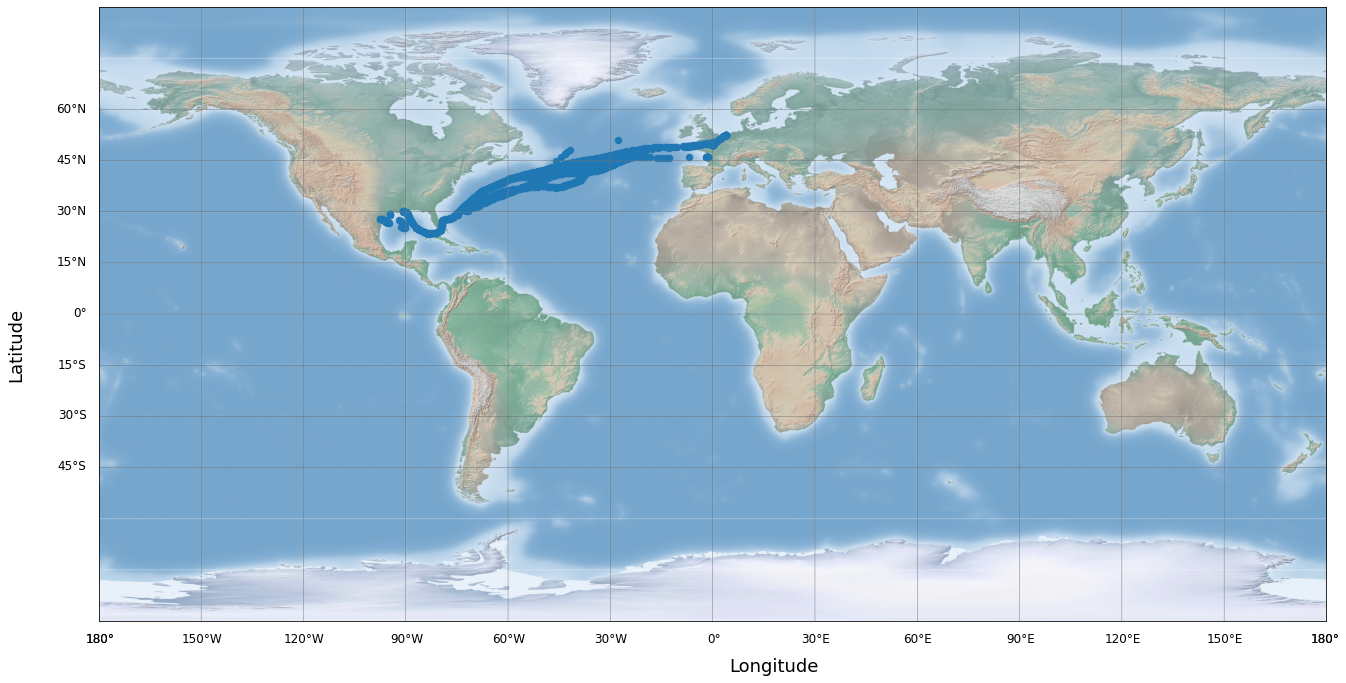

In [96]:
df_gulf2NE_asia=extractVoyages(df_aisH_1, start_region="Gulf",end_region="English channel")

plotPorts_1(df_gulf2NE_asia)

In [221]:
# There is still one thing to do, that is to fix the unknonw terminals manually. 
# there are some terminals we can not found after comparison with the ports files. We have to manuallyl check these terminals. 
df_unknowns_start=df_aisH_1[df_aisH_1.start_terminal=="unknown"]
df_unknowns_end=df_aisH_1[df_aisH_1.end_terminal=="unknown"]

print ("the number of entire dataset with unknown start terminals:\n",len(df_unknowns_start.journey_id.unique()))
print ("the number of entire dataset with unknown end terminals:\n",len(df_unknowns_end.journey_id.unique()))
print ("---------------------------------------------------------------------------------------------------------------------")
print("Therefore, we only further manually clean the unknowns datasets with distances larger than 3000nm due to work load")

the number of entire dataset with unknown start terminals:
 99
the number of entire dataset with unknown end terminals:
 102
---------------------------------------------------------------------------------------------------------------------
Therefore, we only further manually clean the unknowns datasets with distances larger than 3000nm due to work load


--------------------------------------------------------------------------------------------------------------------
Further checking the cleaned data (dist>3000nm):
---------------------------------------------------------------------------------------------------------------------
the unique number of journey: 606
the unique number of destination: 381
the unique number of destination: 162
the unique number of ships: 84
---------------------------------------------------------------------------------------------------------------------
 the length of new filted dataset is:
 185100
---------------------------------------------------------------------------------------------------------------------
only clean the dataset with journey distance larger than 3000nm
the number of dataset with unknown start terminals:
 21
the number of dataset with unknown end terminals:
 26
---------------------------------------------------------------------------------------------------------------------
w

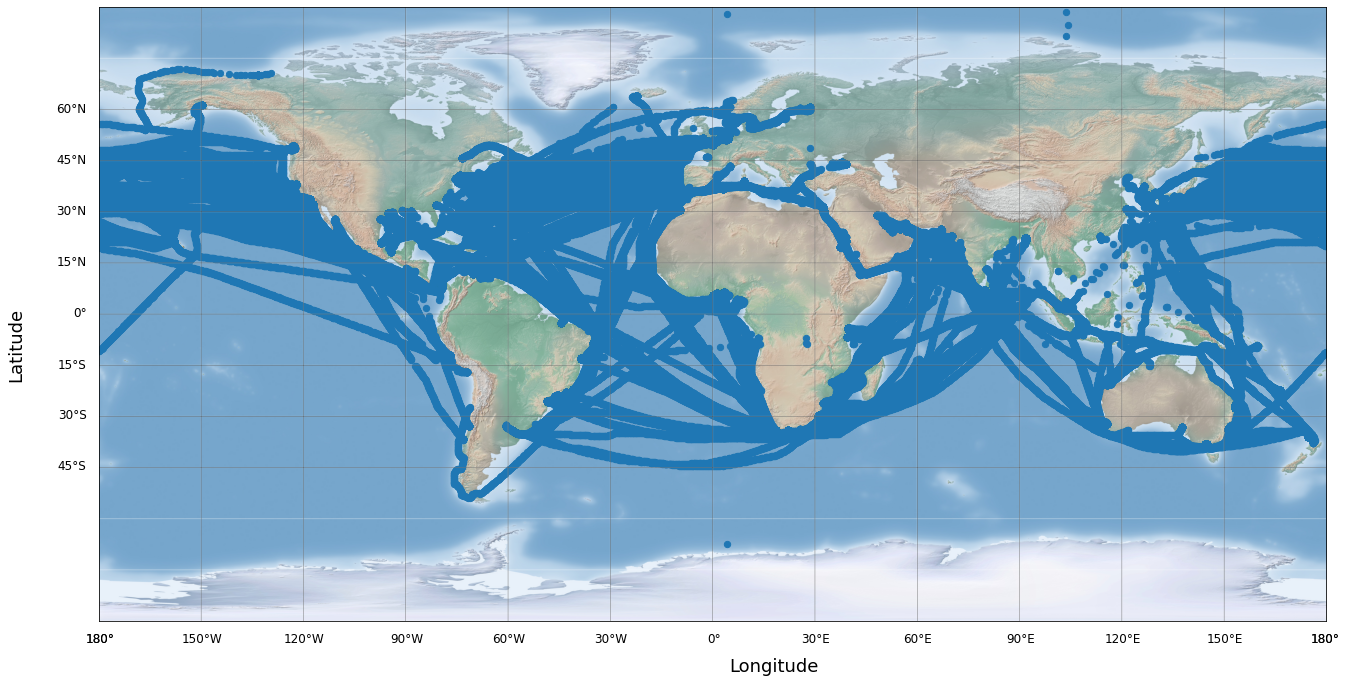

In [222]:
# filter the dataframe with distances, here we only need the data in open sea. The distance of 3000 nm is used for filterring. 
df_3000plus=set_distance_interval(df_aisH_1, "distance_nm", minDistance = 3000, maxDistance = 0 )
print ("--------------------------------------------------------------------------------------------------------------------")
print ("Further checking the cleaned data (dist>3000nm):")

df_3000plus=df_3000plus[['LR_IMO_Ship_No', 'MMSI', 'Latitude', 'Longitude', 'ais_position_timestamp',
                        'MoveStatus', 'Speed', 'Heading', 'Destination','DestinationTidied','Draught', 'Length',
                        'ShipType', 'ShipName', 'MovementID','distance_nm','journey_id',
                         "start_region","start_terminal","start_lat","start_lon","start_calls","start_group",
                        "end_region","end_terminal","end_lat","end_lon","end_calls","end_group"]]
df_3000plus=df_3000plus.sort_values(by=["distance_nm"],ascending=False)

print ("---------------------------------------------------------------------------------------------------------------------")
print ("the unique number of journey:",len(df_3000plus.distance_nm.unique()))
print ("the unique number of destination:",len(df_3000plus.Destination.unique()))
print ("the unique number of destination:",len(df_3000plus.DestinationTidied.unique()))
print ("the unique number of ships:",len(df_3000plus.LR_IMO_Ship_No.unique()))

print ("---------------------------------------------------------------------------------------------------------------------")
print (" the length of new filted dataset is:\n", len(df_3000plus))



print ("---------------------------------------------------------------------------------------------------------------------")
print ("only clean the dataset with journey distance larger than 3000nm")
df_3000plusunknowns_start=df_3000plus[df_3000plus.start_terminal=="unknown"]
df_3000plusunknowns_end=df_3000plus[df_3000plus.end_terminal=="unknown"]
print ("the number of dataset with unknown start terminals:\n",len(df_3000plusunknowns_start.journey_id.unique()))
print ("the number of dataset with unknown end terminals:\n",len(df_3000plusunknowns_end.journey_id.unique()))
print ("---------------------------------------------------------------------------------------------------------------------")
print("we have to manually add the terminal regions for these unknown regions")
print ("---------------------------------------------------------------------------------------------------------------------")

plotPorts_1(df_3000plus)

In [223]:
# manually add the start terminal, region, port in unknown data 
start_unique=df_3000plusunknowns_start.journey_id.unique()
print ("--------------------------------------------------------------------------------------------------------------------")
print ("The length of unknown start terminals:\n")
print (len(start_unique))
print ("The journey ids of the unknown start terminals: \n")
print (start_unique)

# the unknonwn end terminals
end_unique=df_3000plusunknowns_end.journey_id.unique()
print ("--------------------------------------------------------------------------------------------------------------------")
print ("The length of unknown end terminals:\n")
print (len(end_unique))
print ("The journey ids of the unknown end terminals: \n")
print (end_unique)
print ("--------------------------------------------------------------------------------------------------------------------")

#Find the coordinates of the missing start and end terminals
start_coords={}
end_coords={}
#find the start index of the journey
for start_journey in start_unique:

    dateT_min,_, dateT_min_ix, _=ix_journeyStartDepart(df_3000plusunknowns_start,journey_id=start_journey)
    lat_t=df_3000plusunknowns_start.loc[dateT_min_ix,"Latitude"]
    lon_t=df_3000plusunknowns_start.loc[dateT_min_ix,"Longitude"]
    start_coords.setdefault(start_journey,[]).append(lat_t)
    start_coords.setdefault(start_journey,[]).append(lon_t) 
print ("------------------------------------------------------------------------------------------------------------------")
print ("The cooresponding coordiates of start terminals:\n")
print (start_coords)


#find the end index of the journey
for end_journey in end_unique:
    _,dateT_max, _, dateT_max_ix=ix_journeyStartDepart(df_3000plusunknowns_end,journey_id=end_journey)
    lat_t=df_3000plusunknowns_end.loc[dateT_max_ix,"Latitude"]
    lon_t=df_3000plusunknowns_end.loc[dateT_max_ix,"Longitude"]
    end_coords.setdefault(end_journey,[]).append(lat_t)
    end_coords.setdefault(end_journey,[]).append(lon_t) 
print ("------------------------------------------------------------------------------------------------------------------")
print ("The cooresponding coordiates of end terminals:\n")
print (end_coords)

--------------------------------------------------------------------------------------------------------------------
The length of unknown start terminals:

21
The journey ids of the unknown start terminals: 

[ 61.  67.  80. 116. 202. 270. 274. 279. 325. 339. 357. 391. 511. 519.
 527. 566. 568. 569. 582. 594. 599.]
--------------------------------------------------------------------------------------------------------------------
The length of unknown end terminals:

26
The journey ids of the unknown end terminals: 

[ 63.  72.  74.  85.  97. 120. 127. 147. 207. 230. 234. 274. 299. 315.
 322. 362. 395. 408. 409. 449. 474. 481. 500. 533. 547. 556.]
--------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------
The cooresponding coordiates of start terminals:

{61.0: [-37.007011999999996, 161.559407], 67.0: [-34.64392, -

In [224]:
# for check purpors only.
print (df_ports.Region.unique())
df_ports[df_ports.Terminal=="Petropavlovsk"]

['SE Asia' 'Baltic' 'Black sea' 'NE Asia' 'Gulf' 'Mid East' 'East Asia'
 'Mediterranean' 'English channel' 'Caribbean' 'Red sea' 'NE Ame'
 'East Latin' 'South Asia' 'SE Ame' 'SW Africa' 'SW Europe' 'North sea'
 'SW Ame' 'West Latin' 'West Africa' 'East Africa' 'Oceania' 'Arctic'
 'NW Ame']


Region Country       Terminal       Lat        Lon  num of call all  \
2438  NE Asia  Russia  Petropavlovsk  52.97091  158.67684                9   

         Port Group  
2438  Petropavlovsk

In [225]:
print ("the length of start terminal of unknown journeys:\n")
print (len(unknown_journeys))
print ("----------------------------------------------------------------------------------------------------------------")
print ("Manually check if the start terminal name based on the provided closest terminals (> 500nm) \n")
print ("If they are belonged to the same region, not too far way, the cloest terminal will be still considered as the start terminal\n")
print ("----------------------------------------------------------------------------------------------------------------")
# basic added information for unknown start terminals
journeyid_start_unknown=[ 61,  67, 80, 116, 202., 
              270., 274., 279., 325., 339., 
              357., 391., 511., 519., 527., 
              566., 568., 569., 582., 594., 599.]
journeyid_end_unknown=[ 63.,  72.,  74.,  85.,  97., 
            120., 127., 147., 207., 230., 
            234., 274., 299., 315. ,322. ,
            362., 395., 408., 409., 449., 
            474., 481., 500., 533., 547., 556.]

terminals_startUnknown=['East Coast Australia',"South_Atlantic_Ocean","Port Victoria","Port Victoria","North Pacific",
                       "North Pacific","North Pacific_1","North Pacific","Unalaska","Onahama",
                       "Kitanihon Zosen","North Pacific","North Pacific","Port Victoria","Port Victoria",
                       "North Pacific","Tacloban","India_sea","Kitanihon Zosen","North Pacific","P7 Terminal"]

ports_startUnknown=["Botany Bay","South_Atlantic_Ocean","Mahe","Mahe","North Pacific",
                    "North Pacific","North Pacific_1","North Pacific","Unalaska","Sendai",
                   "Akita","North Pacific","North Pacific","Mahe","Mahe",
                   "North Pacific","Cebu","India_sea","Akita","North Pacific","Barbers Point Par Hawaii SPM"]

regions_startUnknown=["Oceania","West Africa","East Africa","East Africa","SW Ame",
                     "NW Ame","SW Ame","NW Ame","NW Ame","NE Asia",
                     "NE Asia","NW Ame","NW Ame","East Africa","East Africa",
                    "NW Ame","SE Asia","South Asia","NE Asia","SW Ame","Oceania"]
# unknown_journeys_end
# basic added inforamtion for unknown end terminals

terminals_endUnknown=["Onahama","Petropavlovsk","Kashima","North Pacific","Valero Holyrood Marine Terminal",
                     "North Pacific","North Pacific","North Pacific","North Pacific","Petropavlovsk",
                     "Kashima","Majuro","Kahului Bulk Terminal","Kashima","North Pacific",
                     "North Pacific","North Pacific","Praia da Vitoria_1","North Pacific","Esso Bermuda St. George's Oil Terminal",
                     "Chiba","North Pacific","Petropavlovsk","North Pacific","North Pacific","Petropavlovsk"]

ports_endUnknown=["Sendai","Petropavlovsk","Kawasaki","North Pacific","North Atlantic Refining",
                     "North Pacific","North Pacific","North Pacific","North Pacific","Petropavlovsk",
                 "Kawasaki","Majuro","North Pacific","Kawasaki","North Pacific",
                 "North Pacific","North Pacific","Ponta Delgada","North Pacific","Esso Bermuda St. George's Oil Terminal",
                 "Kawasaki","North Pacific","Petropavlovsk","North Pacific","North Pacific","Petropavlovsk"]

regions_endUnknown=["NE Asia","NE Asia","NE Asia","NW Ame","NE Ame",
                     "NW Ame","NW Ame","NW Ame","NW Ame","NE Asia",
                   "NE Asia","SE Asia","NW Ame","NE Asia","NW Ame",
                   "NW Ame","NW Ame","SW Europe","NW Ame","SE Ame",
                   "NE Asia","NW Ame","NE Asia","NW Ame","NW Ame","NE Asia"]


the length of start terminal of unknown journeys:

99
----------------------------------------------------------------------------------------------------------------
Manually check if the start terminal name based on the provided closest terminals (> 500nm) 

If they are belonged to the same region, not too far way, the cloest terminal will be still considered as the start terminal

----------------------------------------------------------------------------------------------------------------


In [226]:
# Based on the added terminals information, upate the dataframe. 
# turn to dicts hash table. unknonw start terminals
journeyS_terminal=[]
journeyS_port=[]
journeyS_region=[]

for elem in zip(journeyid_start_unknown,terminals_startUnknown):
    journeyS_terminal.append(elem)
for elem in zip(journeyid_start_unknown,ports_startUnknown):
    journeyS_port.append(elem)
for elem in zip(journeyid_start_unknown,regions_startUnknown):
    journeyS_region.append(elem)

tupleS_1=tuple(journeyS_terminal)
tupleS_2=tuple(journeyS_port)
tupleS_3=tuple(journeyS_region)

dicts_journeyS_terminal=dict(tupleS_1)
dicts_journeyS_port=dict(tupleS_2)
dicts_journeyS_region=dict(tupleS_3)
print ("------------------------------------------------------------------------------------------------------------------")
print ("An example to show the produced dictionray (start terminal):\n")
print (dicts_journeyS_region)
print ("------------------------------------------------------------------------------------------------------------------")


# turn to dicts hash table. unknonw end terminals
journeyE_terminal=[]
journeyE_port=[]
journeyE_region=[]

for elem in zip(journeyid_end_unknown,terminals_endUnknown):
    journeyE_terminal.append(elem)
for elem in zip(journeyid_end_unknown,ports_endUnknown):
    journeyE_port.append(elem)
for elem in zip(journeyid_end_unknown,regions_endUnknown):
    journeyE_region.append(elem)

tupleE_4=tuple(journeyE_terminal)
tupleE_5=tuple(journeyE_port)
tupleE_6=tuple(journeyE_region)

dicts_journeyE_terminal=dict(tupleE_4)
dicts_journeyE_port=dict(tupleE_5)
dicts_journeyE_region=dict(tupleE_6)
print ("------------------------------------------------------------------------------------------------------------------")
print ("An example to show the produced dictionray (end terminal):\n")
print (dicts_journeyE_region)
print ("------------------------------------------------------------------------------------------------------------------")



# # # add end_region and end_country columns into the df_3000plus dataframe. 
for ix,row in df_3000plusunknowns_start.iterrows():
        df_3000plusunknowns_start.at[ix,"start_terminal"]=dicts_journeyS_terminal[row.journey_id]
        df_3000plusunknowns_start.at[ix,"start_group"]=dicts_journeyS_port[row.journey_id]
        df_3000plusunknowns_start.at[ix,"start_region"]=dicts_journeyS_region[row.journey_id]

for ix,row in df_3000plusunknowns_end.iterrows():
        df_3000plusunknowns_end.at[ix,"end_terminal"]=dicts_journeyE_terminal[row.journey_id]
        df_3000plusunknowns_end.at[ix,"end_group"]=dicts_journeyE_port[row.journey_id]
        df_3000plusunknowns_end.at[ix,"end_region"]=dicts_journeyE_region[row.journey_id]       
        
        
print(df_3000plusunknowns_end[["journey_id","end_terminal","end_group","end_region","distance_nm"]])

------------------------------------------------------------------------------------------------------------------
An example to show the produced dictionray (start terminal):

{61: 'Oceania', 67: 'West Africa', 80: 'East Africa', 116: 'East Africa', 202.0: 'SW Ame', 270.0: 'NW Ame', 274.0: 'SW Ame', 279.0: 'NW Ame', 325.0: 'NW Ame', 339.0: 'NE Asia', 357.0: 'NE Asia', 391.0: 'NW Ame', 511.0: 'NW Ame', 519.0: 'East Africa', 527.0: 'East Africa', 566.0: 'NW Ame', 568.0: 'SE Asia', 569.0: 'South Asia', 582.0: 'NE Asia', 594.0: 'SW Ame', 599.0: 'Oceania'}
------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------
An example to show the produced dictionray (end terminal):

{63.0: 'NE Asia', 72.0: 'NE Asia', 74.0: 'NE Asia', 85.0: 'NW Ame', 97.0: 'NE Ame', 120.0: 'NW Ame', 127.0: 'NW Ame', 147.0: 'NW Ame', 207.0: 'NW Ame',

In [227]:
# update dataframe: df_3000plus by the fixed unknonwn dataframes
df_3000plus.update(df_3000plusunknowns_end)
ccc=df_3000plus[(df_3000plus.end_terminal=="unknown")]
ccc[["journey_id","end_terminal","end_group","end_region","distance_nm"]]

Empty DataFrame
Columns: [journey_id, end_terminal, end_group, end_region, distance_nm]
Index: []

In [228]:
df_3000plus.update(df_3000plusunknowns_start)
ddd=df_3000plus[(df_3000plus.start_terminal=="unknown")]
ddd[["journey_id","start_terminal","start_group","start_region","distance_nm"]]

Empty DataFrame
Columns: [journey_id, start_terminal, start_group, start_region, distance_nm]
Index: []

In [230]:
# turn to dicts hash table.
# the following scripts are originally used to deal with the end_terminal based on the exsiting "Destination" column, but it 
# turns out that it is not useful. I still keep them here for a referene. 


# # get information from df_ports, and turns them to dictionaries for further use
# termRegion=[]
# termPort=[]
# termCty=[]

# for elem in zip(df_ports.Terminal,df_ports.Region):
#     termRegion.append(elem)

# for elem in zip(df_ports.Terminal,df_ports["Port Group"]):
#     termPort.append(elem)
    
# for elem in zip(df_ports.Terminal,df_ports["Country"]):
#     termCty.append(elem)
    
# tuples=tuple(termRegion)
# tuples_1=tuple(termPort)
# tuples_2=tuple(termCty)

# dicts_termRegion=dict(tuples)
# dicts_termPort=dict(tuples_1)
# dicts_termCty=dict(tuples_2)

# #the lists_terminals is the orginal terminasl from "DestinationTidied" in the filted dataframe: df_3000plus

# lists_terminal=['Quintero LNG Terminal Dock', 'Cristobal', 'Zhoushan', 'Gibraltar', 'Corinto', 'Luanda', 'San Francisco', 
#                 'Balboa', 'Rosarito Terminal SBM', 'Santos', 'Tarragona', 'Lagos (Nigeria)', 'Dongguan', 'Singapore', 'New Orleans', 
#                 'Rotterdam', 'Vysotsk', 'Mailiao', 'Singapore Eastern Petroleum A Anchorage (AEPA)', 'Mundra East Basin', 'Incheon',
#                 'Kaohsiung', 'Amsterdam', 'Daesan', 'Buenos Aires', 'Chiba', 'Fujairah', 'Rotterdam South', 'Yosu', 'Mumbai', 'Port Elizabeth', 
#                 'Port Bonython', 'Mizushima', 'Matsuyama', 'Suez', 'Tokuyama North Section', 'Jawaharlal Nehru Port', 'Cape Town', 'Campana', 'Wakayama', 
#                 'Los Angeles', 'Lome', 'Oranjestad (Sint Eustatius)', 'Suape', 'Durban', 'Mina al Fahal Petroleum Development SBM No 1', 
#                 'Ulsan', 'Paranagua', 'Houston North Side', 'Baytown', 'Tuxpan South Bank', 'Sikka GMB Fertiliser Terminal', 
#                 'Mollendo Terminal CBM', 'Port Said West Side', 'San Vicente Terminal Internacional', 'Rio Grande (Brazil)', 
#                 'New York & New Jersey Brooklyn Terminals', 'Chittagong', 'Kwinana', 'Le Havre', 'London Gateway', 'Pascagoula', 
#                 'Galle', 'Tanjung Pelepas', 'Sultan Qaboos Port ', 'Port Sudan S Quay', 'Qingdao', 'La Pallice', 'Huelva', 
#                 'Vancouver (Canada)', 'Port Botany', 'Maputo', 'Agadir', 'Atucha', 'Jorf Lasfar', 'Hastings', 'Porvoo', 
#                 'Anyer Terminal', 'Mombasa', 'Cartagena (Spain)', 'Tuapse', 'Bantry', 'Honolulu', 'Sohar', 'Geelong', 'Tokyo', 
#                 'Montreal', 'Barcelona', 'Yanbu Commercial Port', 'Antwerp West', 'Gore Bay', 'Amuay Bay', 'Sarroch Oil Terminal', 
#                 'Caojing', 'Chita', 'Colombo', 'Port Alucroix', 'Jeddah', 'Beira', 'Barrow Island Gorgon LNG Terminal', 'Brisbane', 
#                 'Las Palmas', 'Noumea', 'Tema', 'Anchorage', 'Oita', 'Freeport (Bahamas)', 'Sakai', 'Rayong IRPC Port', 'Yabucoa', 
#                 'Kalundborg', 'Deendayal', 'Manzanillo (Mexico)', 'Sete', 'El Palito', 'Novorossiysk', 'Canakkale', 'Visakhapatnam', 
#                 'Kikuma', 'Port of Alaska', 'Conchan Cement Terminal', 'Muhammad Bin Qasim', 'Merak', 'Itaqui', 'Chennai', 'Chattogram', 
#                 'Ras Laffan', 'Onsan', 'New Mangalore', 'Vostochny', 'Pir Pau New Terminal', 'Ras Tanura North Pier', 'Quebec', 
#                 'Port Reunion', 'Jebel Ali', 'Port Rashid', 'Philadelphia', 'Dampier', 'Port Moresby', 'Johor', 'Rabigh', 
#                 'Wandoo Marine Terminal', 'Algiers', 'Sao Sebastiao', 'Iwakuni', 'Port Arthur', 'San Juan', 'Bristol Royal Portbury Dock', 
#                 'Mossel Bay', 'Jubail', 'Fawley', 'Ain Sukhna Terminal SBM No 1', 'Cherry Point', 'Suape Marine Terminal', 'Vadinar Terminal', 
#                 'Hazira', 'Djibouti', 'Dar es Salaam', 'Port Dickson', 'Karachi East', 'Helguvik']

# print (" the length of the lists_terminals:\n")
# print (len(lists_terminal))
# count=0
# for terminal in lists_terminal:
#     if terminal  in dicts_termRegion:
#         count=count+1
# print ("----------------------------------------------------------------------------------------------------------------------")
# print ("The number of terminals which also belonged to the original terminals/Regions groups:\n")
# print (count)
# print ("----------------------------------------------------------------------------------------------------------------------")

# # In contrast, we can also output the terminals not belonged to existing Regions
# term_noRegion=[]

# for terminal in lists_terminal:
#     if terminal not in dicts_termRegion:
#         term_noRegion.append(terminal)
# print ("The number of terminals which not belonged to the original terminals/Regions groups:\n")
# print (len(term_noRegion))
# print ("----------------------------------------------------------------------------------------------------------------------")
# print ("These terminals are:")
# print (term_noRegion)


In [231]:
# # Add manually the reigons and countries for the above terminals without Regions and countries.
# # the num is based on the len(term_noRegion) here. 

# num=[i for i in range(55)]
# dict_termNoRegCon=dict(tuple(zip(term_noRegion,num)))
# print ("the terminals without regions and countries:\n",dict_termNoRegCon)
# print ("---------------------------------------------------------------------------------------------------------------")
# print ("the missing regions and countries (manually added):\n")

# regions_1=["West Latin","SW Ame","West Africa","SE Asia","South Asia","English channel","NE Asia","NE Asia","South Asia","NE Asia",
#           "Caribbean","Mid East","Gulf","Gulf","Gulf","South Asia","West Latin","Mediterranean","West Latin","East Latin",
#           "NE Ame","English channel","Mid East","Red sea","NE Ame","Oceania","SE Asia","Mediterranean","North sea","NE Asia",
#           "English channel","NE Ame","Mediterranean","NE Asia","Caribbean","Oceania","Gulf","SE Asia","SW Ame","Mediterranean",
#           "NW Ame","West Latin","South Asia","South Asia","NE Asia","South Asia","Mid East","East Africa","SE Asia","Caribbean",
#           "North sea","Rode sea","SE Ame","East Latin","South Asia"]
# country_1=["Chile","Mexico","Nigeria","Singapore","India","Netherlands","South Korea","Japan","India","Japan",
#           "Netherlands","Oman","America","America","Mexico","India","Peru","Egypte","Chili","Brazil",
#           "America","UK","Oman","Sudan","Canada","Australia","Indonesia","Spain","Ireland","Japan",
#           "Belgium","Canada","Italy","Russia","America","Australia","Bahamas","Thailand","Mexico","Turkey",
#            "America","Peru","Pakistan","Bangladesh","South Korean","India","Saudi Arabia","France","Malaysia","Puerto Rico",
#           "UK","Egypte","America","Brazil","Pakistan"]

# # add regions and countries to terminals dictionary. 

# dict_termNoRegCon_1={}
# for key, value in dict_termNoRegCon.items():
#     dict_termNoRegCon[key]=regions_1[value]
#     dict_termNoRegCon_1[key]=country_1[value]

# #update the dictionraies with all unknown terminals. 
# dicts_termRegion.update(dict_termNoRegCon)
# dicts_termCty.update(dict_termNoRegCon_1)
# print ("------------------------------------------------------------------------------------------------------------------")
# print ("check if the originally unknown terminals are okay now:\n")
# print (dicts_termRegion["Quintero LNG Terminal Dock"])

# # add end_region and end_country columns into the df_3000plus dataframe. 
# for ix,row in df_3000plus.iterrows():
    
#     if row.DestinationTidied in dicts_termRegion:
#         df_3000plus.at[ix,"end_region"]=dicts_termRegion[row.DestinationTidied]
#         df_3000plus.at[ix,"end_country"]=dicts_termCty[row.DestinationTidied]
        
#     else:
#         df_3000plus.at[ix,"end_region"]="no_region"
#         df_3000plus.at[ix,"end_country"]="no_country"

#  e) Save all the datafiles

In [232]:
df_aisH_1.to_csv("C:/posDoc-SDU-Denmark/SDU_research/shippingLabwp1/savedFile/ais_hourly_withDistStartEndTerms.csv",index=False)
df_3000plus.to_csv("C:/posDoc-SDU-Denmark/SDU_research/shippingLabwp1/savedFile/ais_hourly_withDistStartEndTerms_3000plus.csv",index=False)